In [1]:
# !pip install xgboost
# !pip install lightgbm
# !pip install catboost

In [2]:
import numpy as np
import pandas as pd

from scipy.stats import shapiro
from scipy.stats import probplot
from scipy.stats import ttest_ind, mannwhitneyu
from scipy.stats import chi2_contingency
from statsmodels.stats.weightstats import zconfint
from sklearn.linear_model import LinearRegression as LR, Ridge
from sklearn.ensemble import RandomForestRegressor as RF
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_recall_fscore_support

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler, MinMaxScaler,Imputer
from sklearn.model_selection import train_test_split, ShuffleSplit, cross_val_score, learning_curve
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb, lightgbm as lgbm, catboost as catb



In [3]:
# input
DATASET_PATH = 'course_project_train.csv'
DATASET_PATH_TEST = 'course_project_test.csv'

In [4]:
df = pd.read_csv(DATASET_PATH)
df.head()

Home Ownership  Annual Income Years in current job  Tax Liens  \
0       Own Home       482087.0                  NaN        0.0   
1       Own Home      1025487.0            10+ years        0.0   
2  Home Mortgage       751412.0              8 years        0.0   
3       Own Home       805068.0              6 years        0.0   
4           Rent       776264.0              8 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                     11.0                     26.3             685960.0   
1                     15.0                     15.3            1181730.0   
2                     11.0                     35.0            1182434.0   
3                      8.0                     22.5             147400.0   
4                     13.0                     13.6             385836.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        1.0                           NaN           1.0   
1                        0.0                           NaN           0.0   
2                        0.0                           NaN           0.0   
3                        1.0                           NaN           1.0   
4                        1.0                           NaN           0.0   

              Purpose        Term  Current Loan Amount  \
0  debt consolidation  Short Term           99999999.0   
1  debt consolidation   Long Term             264968.0   
2  debt consolidation  Short Term           99999999.0   
3  debt consolidation  Short Term             121396.0   
4  debt consolidation  Short Term             125840.0   

   Current Credit Balance  Monthly Debt  Credit Score  Credit Default  
0                 47386.0        7914.0         749.0               0  
1                394972.0       18373.0         737.0               1  
2                308389.0       13651.0         742.0               0  
3                 95855.0       11338.0         694.0               0  
4                 93309.0        7180.0         719.0               0

In [5]:
df_test = pd.read_csv(DATASET_PATH_TEST)
df_test.head()

Home Ownership  Annual Income Years in current job  Tax Liens  \
0           Rent            NaN              4 years        0.0   
1           Rent       231838.0               1 year        0.0   
2  Home Mortgage      1152540.0              3 years        0.0   
3  Home Mortgage      1220313.0            10+ years        0.0   
4  Home Mortgage      2340952.0              6 years        0.0   

   Number of Open Accounts  Years of Credit History  Maximum Open Credit  \
0                      9.0                     12.5             220968.0   
1                      6.0                     32.7              55946.0   
2                     10.0                     13.7             204600.0   
3                     16.0                     17.0             456302.0   
4                     11.0                     23.6            1207272.0   

   Number of Credit Problems  Months since last delinquent  Bankruptcies  \
0                        0.0                          70.0           0.0   
1                        0.0                           8.0           0.0   
2                        0.0                           NaN           0.0   
3                        0.0                          70.0           0.0   
4                        0.0                           NaN           0.0   

                Purpose        Term  Current Loan Amount  \
0    debt consolidation  Short Term             162470.0   
1  educational expenses  Short Term              78298.0   
2    debt consolidation  Short Term             200178.0   
3    debt consolidation  Short Term             217382.0   
4    debt consolidation   Long Term             777634.0   

   Current Credit Balance  Monthly Debt  Credit Score  
0                105906.0        6813.0           NaN  
1                 46037.0        2318.0         699.0  
2                146490.0       18729.0        7260.0  
3                213199.0       27559.0         739.0  
4                425391.0       42605.0         706.0

In [6]:
df.shape

(7500, 17)

In [7]:
df_test.shape

(2500, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
Home Ownership                  7500 non-null object
Annual Income                   5943 non-null float64
Years in current job            7129 non-null object
Tax Liens                       7500 non-null float64
Number of Open Accounts         7500 non-null float64
Years of Credit History         7500 non-null float64
Maximum Open Credit             7500 non-null float64
Number of Credit Problems       7500 non-null float64
Months since last delinquent    3419 non-null float64
Bankruptcies                    7486 non-null float64
Purpose                         7500 non-null object
Term                            7500 non-null object
Current Loan Amount             7500 non-null float64
Current Credit Balance          7500 non-null float64
Monthly Debt                    7500 non-null float64
Credit Score                    5943 non-null float64
Credit Default                  7

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
Home Ownership                  2500 non-null object
Annual Income                   1987 non-null float64
Years in current job            2414 non-null object
Tax Liens                       2500 non-null float64
Number of Open Accounts         2500 non-null float64
Years of Credit History         2500 non-null float64
Maximum Open Credit             2500 non-null float64
Number of Credit Problems       2500 non-null float64
Months since last delinquent    1142 non-null float64
Bankruptcies                    2497 non-null float64
Purpose                         2500 non-null object
Term                            2500 non-null object
Current Loan Amount             2500 non-null float64
Current Credit Balance          2500 non-null float64
Monthly Debt                    2500 non-null float64
Credit Score                    1987 non-null float64
dtypes: float64(12), object(4)
me

In [10]:
df.describe()

Annual Income    Tax Liens  Number of Open Accounts  \
count   5.943000e+03  7500.000000              7500.000000   
mean    1.366392e+06     0.030133                11.130933   
std     8.453392e+05     0.271604                 4.908924   
min     1.645970e+05     0.000000                 2.000000   
25%     8.443410e+05     0.000000                 8.000000   
50%     1.168386e+06     0.000000                10.000000   
75%     1.640137e+06     0.000000                14.000000   
max     1.014934e+07     7.000000                43.000000   

       Years of Credit History  Maximum Open Credit  \
count              7500.000000         7.500000e+03   
mean                 18.317467         9.451537e+05   
std                   7.041946         1.602622e+07   
min                   4.000000         0.000000e+00   
25%                  13.500000         2.792295e+05   
50%                  17.000000         4.781590e+05   
75%                  21.800000         7.935015e+05   
max                  57.700000         1.304726e+09   

       Number of Credit Problems  Months since last delinquent  Bankruptcies  \
count                7500.000000                   3419.000000   7486.000000   
mean                    0.170000                     34.692600      0.117152   
std                     0.498598                     21.688806      0.347192   
min                     0.000000                      0.000000      0.000000   
25%                     0.000000                     16.000000      0.000000   
50%                     0.000000                     32.000000      0.000000   
75%                     0.000000                     50.000000      0.000000   
max                     7.000000                    118.000000      4.000000   

       Current Loan Amount  Current Credit Balance   Monthly Debt  \
count         7.500000e+03            7.500000e+03    7500.000000   
mean          1.187318e+07            2.898332e+05   18314.454133   
std           3.192612e+07            3.178714e+05   11926.764673   
min           1.124200e+04            0.000000e+00       0.000000   
25%           1.801690e+05            1.142565e+05   10067.500000   
50%           3.095730e+05            2.093230e+05   16076.500000   
75%           5.198820e+05            3.604062e+05   23818.000000   
max           1.000000e+08            6.506797e+06  136679.000000   

       Credit Score  Credit Default  
count   5943.000000     7500.000000  
mean    1151.087498        0.281733  
std     1604.451418        0.449874  
min      585.000000        0.000000  
25%      711.000000        0.000000  
50%      731.000000        0.000000  
75%      743.000000        1.000000  
max     7510.000000        1.000000

In [11]:
df_test.describe()

Annual Income    Tax Liens  Number of Open Accounts  \
count   1.987000e+03  2500.000000              2500.000000   
mean    1.366922e+06     0.035200                11.184400   
std     9.171252e+05     0.386291                 4.852774   
min     1.065330e+05     0.000000                 1.000000   
25%     8.523115e+05     0.000000                 8.000000   
50%     1.178475e+06     0.000000                10.000000   
75%     1.629734e+06     0.000000                14.000000   
max     1.497561e+07    15.000000                48.000000   

       Years of Credit History  Maximum Open Credit  \
count              2500.000000         2.500000e+03   
mean                 18.325920         7.105704e+05   
std                   7.254659         1.511983e+06   
min                   3.900000         0.000000e+00   
25%                  13.400000         2.785860e+05   
50%                  17.000000         4.786760e+05   
75%                  22.100000         8.025985e+05   
max                  53.400000         5.448439e+07   

       Number of Credit Problems  Months since last delinquent  Bankruptcies  \
count                2500.000000                   1142.000000   2497.000000   
mean                    0.162000                     34.181261      0.106928   
std                     0.559894                     22.024277      0.357189   
min                     0.000000                      0.000000      0.000000   
25%                     0.000000                     16.000000      0.000000   
50%                     0.000000                     30.000000      0.000000   
75%                     0.000000                     50.000000      0.000000   
max                    15.000000                     82.000000      5.000000   

       Current Loan Amount  Current Credit Balance  Monthly Debt  Credit Score  
count         2.500000e+03            2.500000e+03   2500.000000   1987.000000  
mean          1.215572e+07            2.963966e+05  18271.340000   1234.516860  
std           3.226097e+07            3.783020e+05  11543.881469   1740.219442  
min           1.542200e+04            0.000000e+00     93.000000    585.000000  
25%           1.871265e+05            1.101145e+05  10024.750000    710.000000  
50%           3.223660e+05            2.073850e+05  16642.500000    731.000000  
75%           5.225825e+05            3.663485e+05  24146.000000    743.000000  
max           1.000000e+08            6.030087e+06  93555.000000   7480.000000

In [12]:
df['ID'] = df.index.tolist()
df_test['ID'] = df_test.index.tolist()

## Обработка пропусков

In [13]:
len(df) - df.count() 

Home Ownership                     0
Annual Income                   1557
Years in current job             371
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    4081
Bankruptcies                      14
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                    1557
Credit Default                     0
ID                                 0
dtype: int64

In [14]:
len(df_test) - df_test.count() 

Home Ownership                     0
Annual Income                    513
Years in current job              86
Tax Liens                          0
Number of Open Accounts            0
Years of Credit History            0
Maximum Open Credit                0
Number of Credit Problems          0
Months since last delinquent    1358
Bankruptcies                       3
Purpose                            0
Term                               0
Current Loan Amount                0
Current Credit Balance             0
Monthly Debt                       0
Credit Score                     513
ID                                 0
dtype: int64

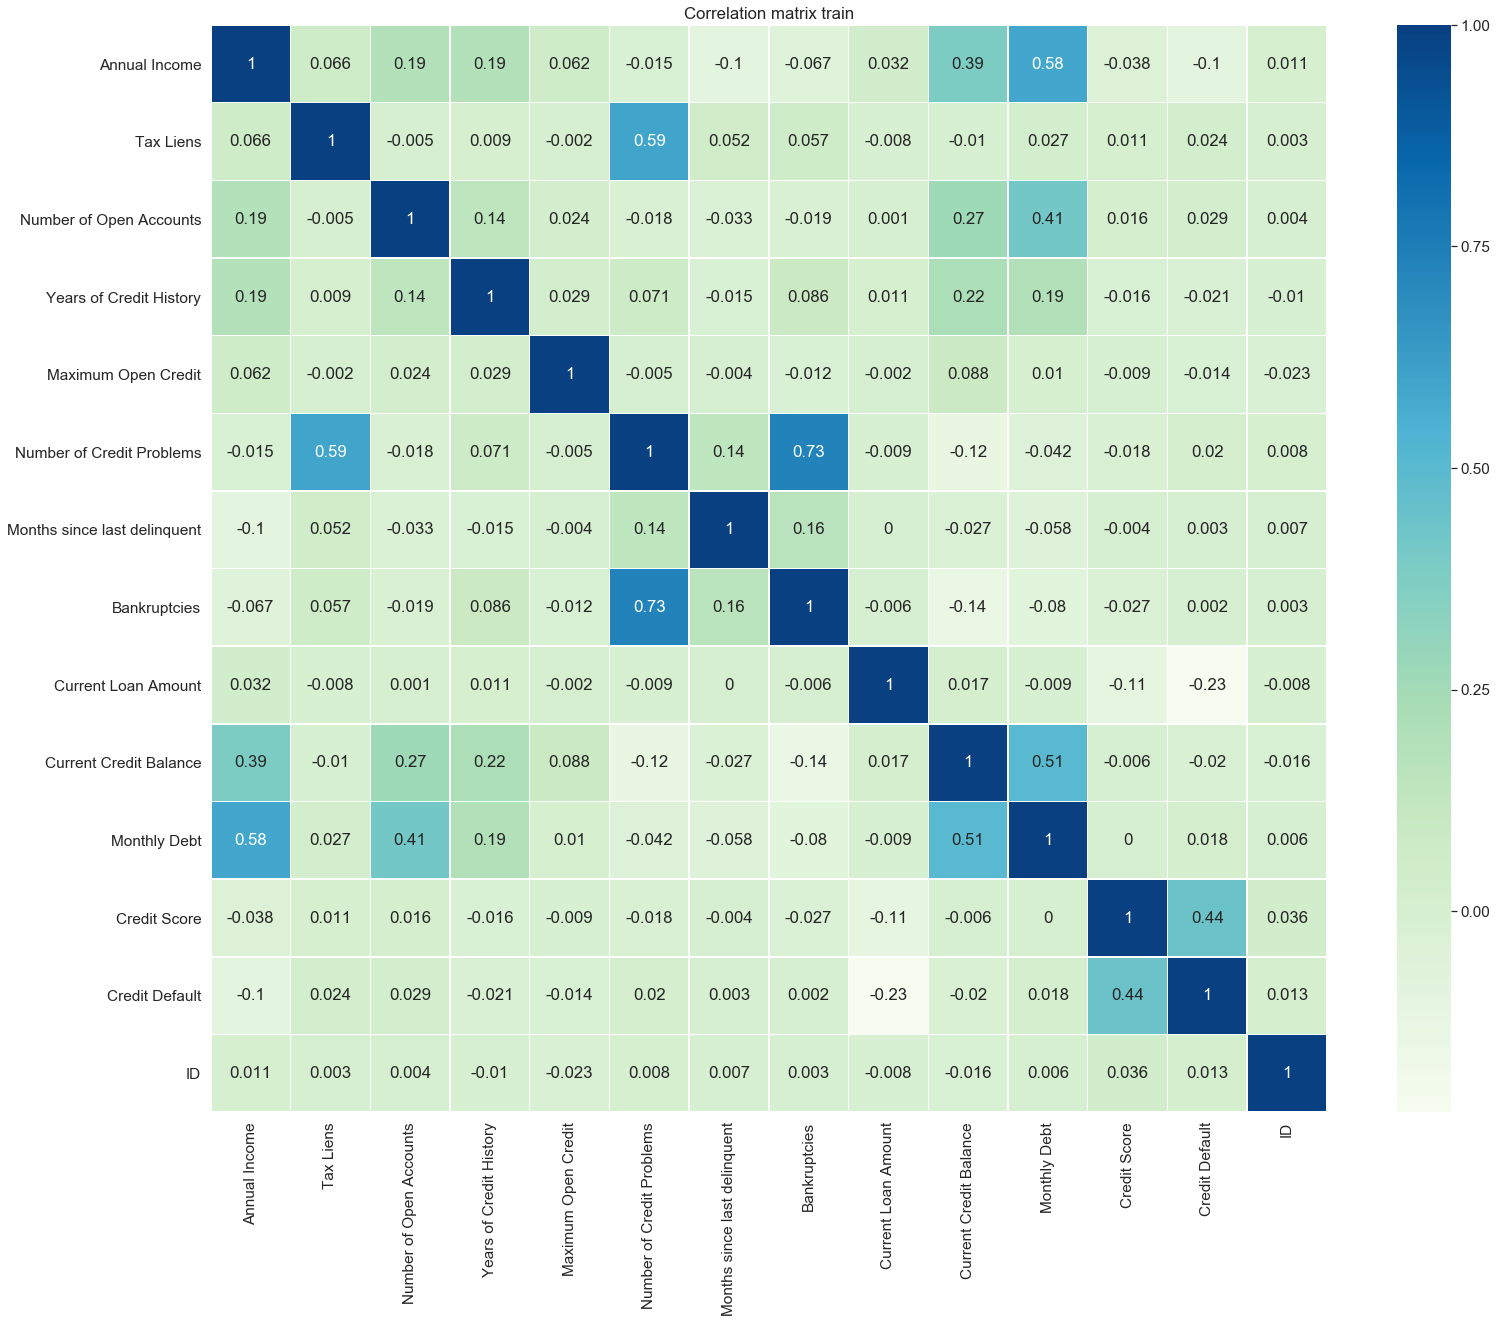

In [15]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df.corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix train')
plt.show()

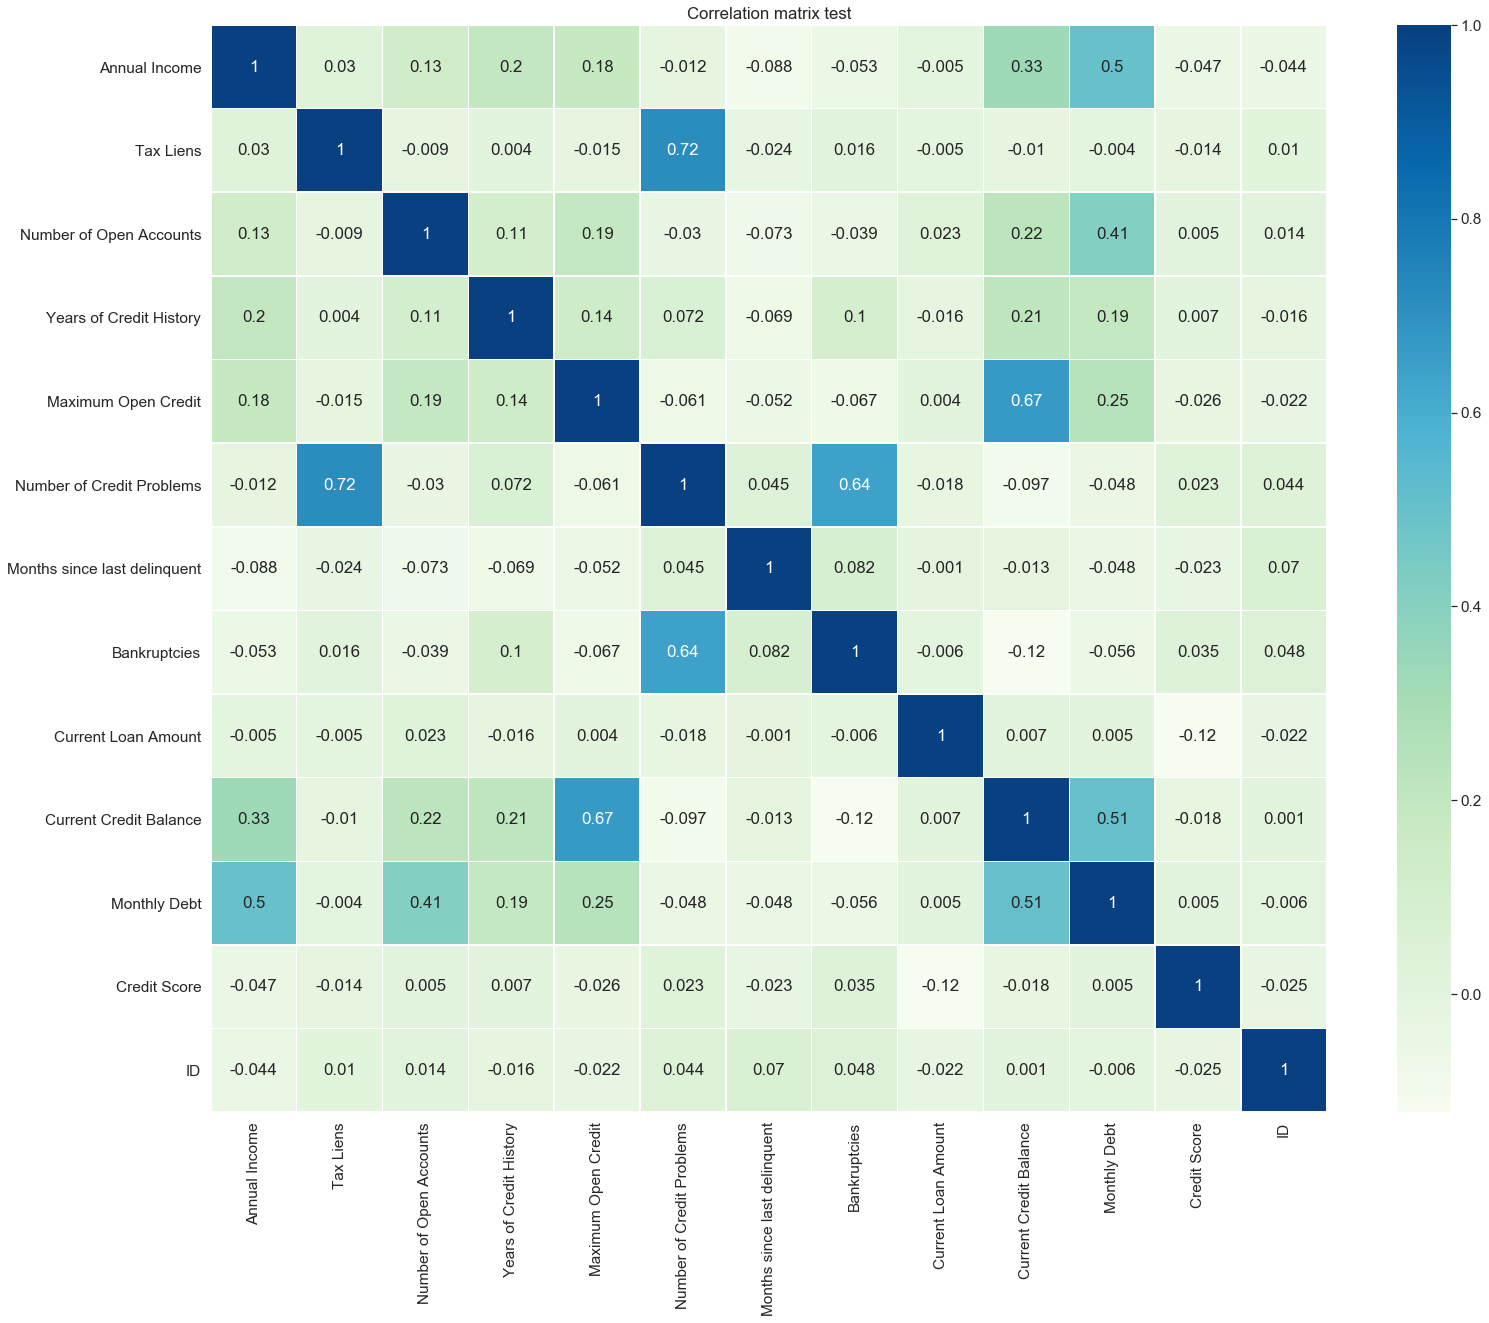

In [16]:
plt.figure(figsize = (25,20))

sns.set(font_scale=1.4)
sns.heatmap(df_test.corr().round(3), annot=True, linewidths=.5, cmap='GnBu')

plt.title('Correlation matrix test')
plt.show()

#### Bankruptcies - уберем пробелы

In [17]:
# TARGET_NAME = 'Bankruptcies'
# COLUMNS = ['Number of Credit Problems']

# sample = df_test.loc[df_test['Bankruptcies'].notnull()]
# features=sample[COLUMNS]
# target=sample['Bankruptcies']
# model3=RF(n_estimators=150,max_depth=100,min_samples_leaf=5)
# X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=5)
# model3.fit(X_train,y_train)
# y_pred_3=model3.predict(X_test)
# print(mse(y_test,y_pred_3),r2(y_test,y_pred_3))

# # df.loc[df['Bankruptcies'].isnull(),'Bankruptcies'] = 
# print(model3.predict(df_test.loc[df_test['Bankruptcies'].isnull(),COLUMNS]))

In [18]:
df.loc[df['Bankruptcies'].isnull(),'Bankruptcies'] = 0
df_test.loc[df_test['Bankruptcies'].isnull(),'Bankruptcies'] = 0

#### Years in current job уберем проблемы

In [19]:
# поставим некое отдельное значение < 0.5
df.loc[df['Years in current job'].isnull(),'Years in current job'] = '< 0.5 years'
df_test.loc[df_test['Years in current job'].isnull(),'Years in current job'] = '< 0.5 years'

#### Months since last delinquent - уберем пробелы

In [20]:
df['Months since last delinquent'].max(), df_test['Months since last delinquent'].max()

(118.0, 82.0)

In [21]:
df['Months since last delinquent out 1'] = df['Months since last delinquent']
df.loc[df['Months since last delinquent'].isnull(),'Months since last delinquent out 1'] = 200

df['Months since last delinquent out 2'] = df['Months since last delinquent']
df.loc[df['Months since last delinquent'].isnull(),'Months since last delinquent out 2'] = -1

In [22]:
df_test['Months since last delinquent out 1'] = df_test['Months since last delinquent']
df_test.loc[df_test['Months since last delinquent'].isnull(),'Months since last delinquent out 1'] = 200

df_test['Months since last delinquent out 2'] = df_test['Months since last delinquent']
df_test.loc[df_test['Months since last delinquent'].isnull(),'Months since last delinquent out 2'] = -1

#### Credit Score - уберем пробелы предварительно

In [23]:
df.loc[df['Credit Score'].isnull(),'Credit Score nan 1'] = 0
df_test.loc[df_test['Credit Score'].isnull(),'Credit Score nan 1'] = 0

In [24]:
df.loc[df['Credit Score'].isnull(),'Credit Score nan 2'] = 1000
df_test.loc[df_test['Credit Score'].isnull(),'Credit Score nan 2'] = 1000

### Annual Income

In [25]:
def input_val(data, col, pref):
    data[col + pref + '1'] = data[col]
    data[col + pref + '2'] = data[col]
    data[col + pref + '3'] = data[col]

    imputer = Imputer(strategy = 'median')
    imputer1 = Imputer(strategy = 'mean')
    imputer2 = Imputer(strategy = 'most_frequent')

    samp = data.loc[:,['ID',col]]

    imputer.fit(samp)
    imputer1.fit(samp)
    imputer2.fit(samp)

    data.loc[:,[col + pref + '1']] = imputer.transform(samp)[:,1]
    data.loc[:,[col + pref + '2']] = np.fix(imputer1.transform(samp))[:,1]
    data.loc[:,[col + pref + '3']] = imputer2.transform(samp)[:,1]

In [26]:
input_val(df, 'Annual Income', ' nan ')
input_val(df_test, 'Annual Income', ' nan ')

## Изучение данных, выбросов

In [27]:
def func_1(data_, col):   
    print(data_[col].value_counts(), '\n') 
    group_data = data_.groupby([col,'Credit Default'])
    print(group_data['ID'].count(), '\n')
    
    plt.figure(figsize=(10, 5))
    
    plt.xticks(rotation=315) 
    sns.countplot(x=col, hue='Credit Default', data=data_)
    plt.title(col+' grouped')
    plt.legend(title='Target', loc='upper right')

    plt.show()

In [28]:
def func_2(data_, col):
    s1 = data_[col]
    print(shapiro(s1))
    print(shapiro(np.log(s1)))
    
    plt.figure(figsize=(20, 16))
    ax1 = plt.subplot(2,2,1)
    ax1.set_xlabel(col)
    ax1.set_ylabel('Count')
    ax1.set_title(col + ' distribution')
    plt.hist(s1, bins = 25)
    
    print(data_[col].min())
    if data_[col].min() > 0:
        ax2 = plt.subplot(2,2,2)
        ax2.set_xlabel(col)
        ax2.set_ylabel('Count')
        ax2.set_title(col + ' distribution')
        plt.hist(np.log(s1), bins = 25)
      
    ax3 = plt.subplot(2,2,3)
    probplot(s1, dist='norm', plot=plt)
    
    ax4 = plt.subplot(2,2,4)
    plt.boxplot(s1)
    
    plt.show()

In [29]:
def func_3(data_,col):
    sample = data_.loc[data_[col].notnull()]
    s1 = sample[col]
    st_0 = s1[sample['Credit Default'] == 0]
    st_1 = s1[sample['Credit Default'] == 1]

    print(mannwhitneyu(st_0, st_1))
    
    plt.figure(figsize=(20, 8))
    ax1 = plt.subplot(1,2,1)
    sns.kdeplot(st_0, shade=True, label='No default', color='g')
    sns.kdeplot(st_1, shade=True, label='Default', color='r')

    plt.xlabel(col)
    plt.title(col + ' grouped by target variable')
    
    ax1 = plt.subplot(1,2,2)
    sns.pointplot(x='Credit Default', y=col, data=sample, capsize=.1)

    plt.title('Confidence intervals (95 %) for ' + col)
    plt.show()

In [30]:
def stat_ind(data_,a):
    print("мат ожидание: ", data_[a].mean()) # мат ожидание/среднее арифметическое
    print("среднее квадратичное отклонение: ", data_[a].std(ddof=0)) # среднее квадратичное отклонение
    print("смещенная оценка дисперсии: ", data_[a].var(ddof=0)) # смещенная оценка дисперсии
    print("несмещенная оценка дисперсии: ", data_[a].var(ddof=1)) #несмещенная оценка дисперсии
    print("медиана: ", data_[a].median()) #медиана
    print("мода: \n", data_[a].mode()) #мода

### Months since last delinquent

(nan, 1.0)
(nan, 1.0)
0.0


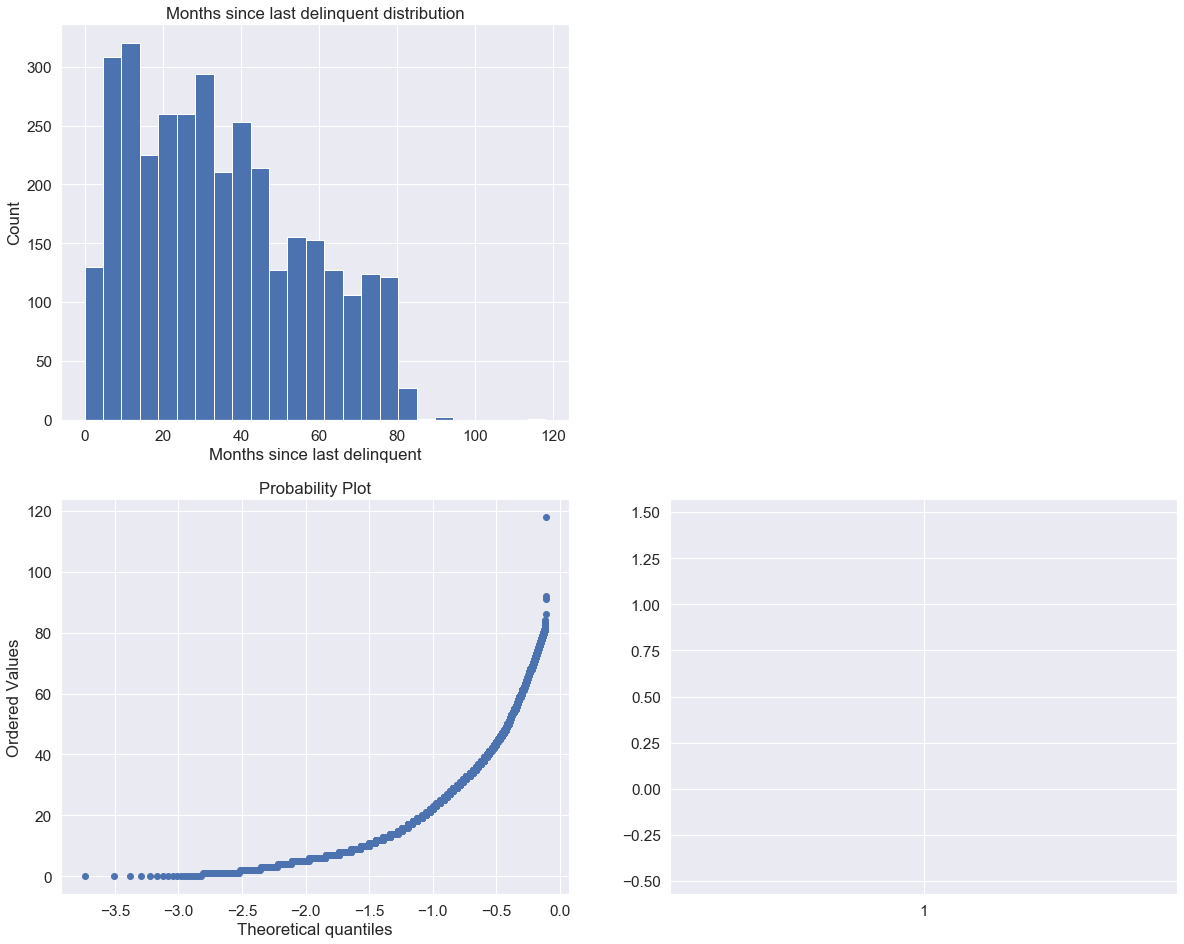

In [31]:
func_2(df, 'Months since last delinquent')

0    6883
1     617
Name: Months since last delinquent gr 1, dtype: int64 

Months since last delinquent gr 1  Credit Default
0                                  0                 4966
                                   1                 1917
1                                  0                  421
                                   1                  196
Name: ID, dtype: int64 



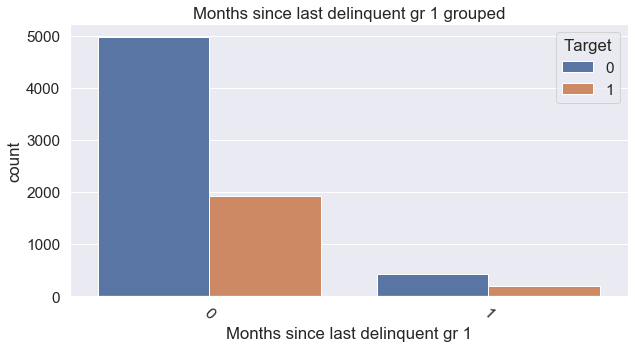

In [32]:
# 0-12, >12
#хорошо, давно
df['Months since last delinquent gr 1'] = 0 

#в этом году
df.loc[df['Months since last delinquent out 1'] <= 12,'Months since last delinquent gr 1'] = 1 

func_1(df,'Months since last delinquent gr 1')

In [33]:
# 0-12, >12
#хорошо, давно
df_test['Months since last delinquent gr 1'] = 0 

#в этом году
df_test.loc[df_test['Months since last delinquent out 1'] <= 12,'Months since last delinquent gr 1'] = 1 

0    6198
1    1302
Name: Months since last delinquent gr 2, dtype: int64 

Months since last delinquent gr 2  Credit Default
0                                  0                 4458
                                   1                 1740
1                                  0                  929
                                   1                  373
Name: ID, dtype: int64 



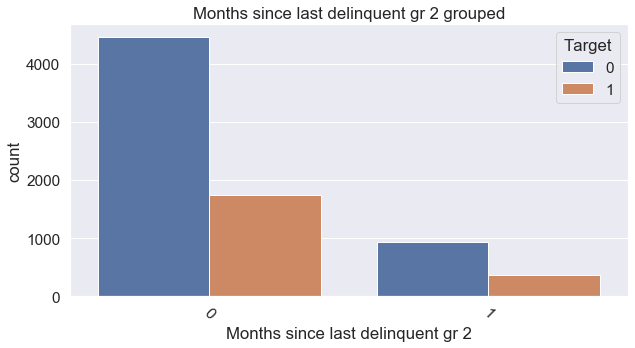

In [34]:
# 0-24, >24
#хорошо, давно
df['Months since last delinquent gr 2'] = 0 

#в этом году
df.loc[df['Months since last delinquent out 1'] <= 24,'Months since last delinquent gr 2'] = 1 

func_1(df,'Months since last delinquent gr 2')

In [35]:
# 0-24, >24
#хорошо, давно
df_test['Months since last delinquent gr 2'] = 0 

#в этом году
df_test.loc[df_test['Months since last delinquent out 1'] <= 24,'Months since last delinquent gr 2'] = 1 

0    5543
1    1957
Name: Months since last delinquent gr 3, dtype: int64 

Months since last delinquent gr 3  Credit Default
0                                  0                 3974
                                   1                 1569
1                                  0                 1413
                                   1                  544
Name: ID, dtype: int64 



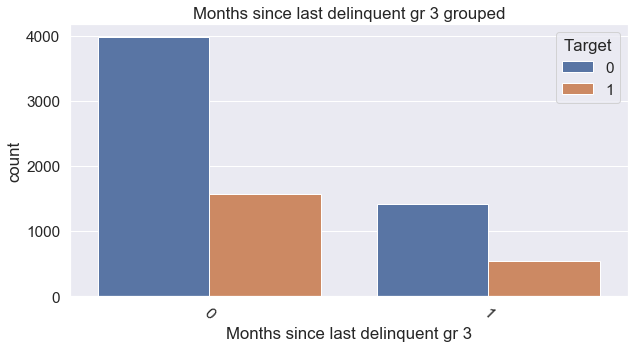

In [36]:
# 0-36, >36
#хорошо, давно
df['Months since last delinquent gr 3'] = 0 

#в этом году
df.loc[df['Months since last delinquent out 1'] <= 36,'Months since last delinquent gr 3'] = 1 

func_1(df, 'Months since last delinquent gr 3')

In [37]:
# 0-36, >36
#хорошо, давно
df_test['Months since last delinquent gr 3'] = 0 

#в этом году
df_test.loc[df_test['Months since last delinquent out 1'] <= 36,'Months since last delinquent gr 3'] = 1 

### Home Ownership

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64 

Home Ownership  Credit Default
Have Mortgage   0                   10
                1                    2
Home Mortgage   0                 2721
                1                  916
Own Home        0                  455
                1                  192
Rent            0                 2201
                1                 1003
Name: ID, dtype: int64 



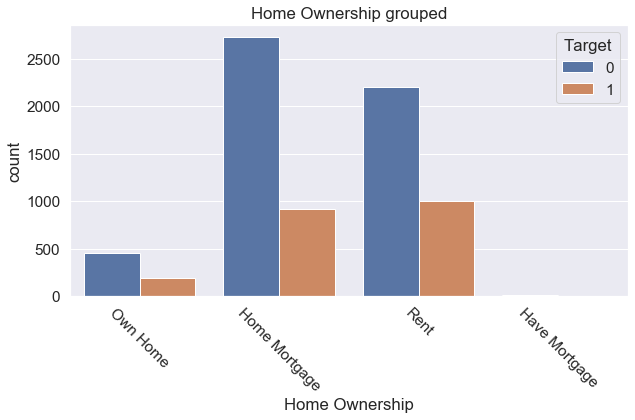

In [38]:
func_1(df, 'Home Ownership')

In [39]:
df['Home Ownership int'] = df['Home Ownership'].map({'Own Home':'0', 'Home Mortgage':'1', 'Rent':'2', 'Have Mortgage':'3'}).astype(int)
df_test['Home Ownership int'] = df_test['Home Ownership'].map({'Own Home':'0', 'Home Mortgage':'1', 'Rent':'2', 'Have Mortgage':'3'}).astype(int) 

In [40]:
df['Home Ownership gr 1'] = df['Home Ownership'].map({'Own Home':'0', 'Home Mortgage':'1', 'Rent':'1', 'Have Mortgage':'2'}).astype(int) 
df['Home Ownership gr 2'] = df['Home Ownership'].map({'Own Home':'0', 'Home Mortgage':'1', 'Rent':'2', 'Have Mortgage':'0'}).astype(int) 
df['Home Ownership gr 3'] = df['Home Ownership'].map({'Own Home':'0', 'Home Mortgage':'1', 'Rent':'1', 'Have Mortgage':'0'}).astype(int) 
df['Home Ownership gr 4'] = df['Home Ownership'].map({'Own Home':'0', 'Home Mortgage':'1', 'Rent':'1', 'Have Mortgage':'1'}).astype(int) 

In [41]:
df_test['Home Ownership gr 1'] = df_test['Home Ownership'].map({'Own Home':'0', 'Home Mortgage':'1', 'Rent':'1', 'Have Mortgage':'2'}).astype(int) 
df_test['Home Ownership gr 2'] = df_test['Home Ownership'].map({'Own Home':'0', 'Home Mortgage':'1', 'Rent':'2', 'Have Mortgage':'0'}).astype(int) 
df_test['Home Ownership gr 3'] = df_test['Home Ownership'].map({'Own Home':'0', 'Home Mortgage':'1', 'Rent':'1', 'Have Mortgage':'0'}).astype(int) 
df_test['Home Ownership gr 4'] = df_test['Home Ownership'].map({'Own Home':'0', 'Home Mortgage':'1', 'Rent':'1', 'Have Mortgage':'1'}).astype(int) 

### Years in current job

10+ years      2332
2 years         705
3 years         620
< 1 year        563
5 years         516
1 year          504
4 years         469
6 years         426
7 years         396
< 0.5 years     371
8 years         339
9 years         259
Name: Years in current job, dtype: int64 

Years in current job  Credit Default
1 year                0                  362
                      1                  142
10+ years             0                 1688
                      1                  644
2 years               0                  512
                      1                  193
3 years               0                  450
                      1                  170
4 years               0                  338
                      1                  131
5 years               0                  371
                      1                  145
6 years               0                  302
                      1                  124
7 years               0                  285
     

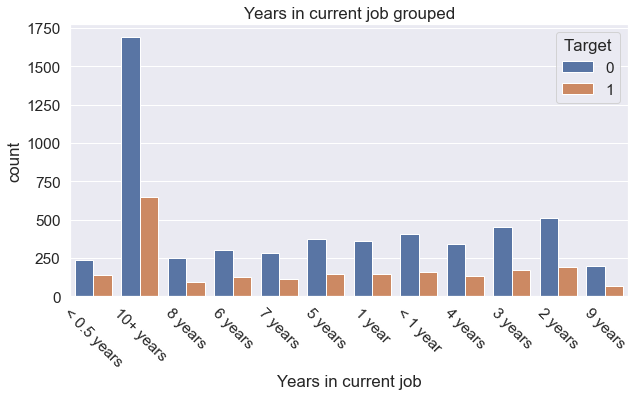

In [42]:
func_1(df, 'Years in current job')

In [43]:
df['Years in current job int'] = 11 #  пока принимаем nan за 0, чтобы посмотреть корреляцию.
df.loc[df['Years in current job'] == '10+ years', 'Years in current job int'] = 10
df.loc[df['Years in current job'] == '9 years', 'Years in current job int'] = 9
df.loc[df['Years in current job'] == '8 years', 'Years in current job int'] = 8
df.loc[df['Years in current job'] == '7 years', 'Years in current job int'] = 7
df.loc[df['Years in current job'] == '6 years', 'Years in current job int'] = 6
df.loc[df['Years in current job'] == '5', 'Years in current job int'] = 5
df.loc[df['Years in current job'] == '4 years', 'Years in current job int'] = 4
df.loc[df['Years in current job'] == '3 years', 'Years in current job int'] = 3
df.loc[df['Years in current job'] == '2 years', 'Years in current job int'] = 2
df.loc[df['Years in current job'] == '1 year', 'Years in current job int'] = 1
df.loc[df['Years in current job'] == '< 1 year', 'Years in current job int'] = 0.5

In [44]:
df_test['Years in current job int'] = 11 #  пока принимаем nan за 0, чтобы посмотреть корреляцию.
df_test.loc[df_test['Years in current job'] == '10+ years', 'Years in current job int'] = 10
df_test.loc[df_test['Years in current job'] == '9 years', 'Years in current job int'] = 9
df_test.loc[df_test['Years in current job'] == '8 years', 'Years in current job int'] = 8
df_test.loc[df_test['Years in current job'] == '7 years', 'Years in current job int'] = 7
df_test.loc[df_test['Years in current job'] == '6 years', 'Years in current job int'] = 6
df_test.loc[df_test['Years in current job'] == '5', 'Years in current job int'] = 5
df_test.loc[df_test['Years in current job'] == '4 years', 'Years in current job int'] = 4
df_test.loc[df_test['Years in current job'] == '3 years', 'Years in current job int'] = 3
df_test.loc[df_test['Years in current job'] == '2 years', 'Years in current job int'] = 2
df_test.loc[df_test['Years in current job'] == '1 year', 'Years in current job int'] = 1
df_test.loc[df_test['Years in current job'] == '< 1 year', 'Years in current job int'] = 0.5

In [45]:
df['Years in current job int gr 1'] = 0
df.loc[df['Years in current job'] != '10+ years', 'Years in current job int gr 1'] = 1
df.loc[df['Years in current job int'] == 11, 'Years in current job int gr 1'] = 1
df['Years in current job int gr 1'].value_counts()

1    5168
0    2332
Name: Years in current job int gr 1, dtype: int64

In [46]:
df_test['Years in current job int gr 1'] = 0
df_test.loc[df_test['Years in current job'] != '10+ years', 'Years in current job int gr 1'] = 1
df_test.loc[df_test['Years in current job int'] == 11, 'Years in current job int gr 1'] = 1
df_test['Years in current job int gr 1'].value_counts()

1    1690
0     810
Name: Years in current job int gr 1, dtype: int64

In [47]:
df.loc[df['Years in current job int'] >= 4, 'Years in current job int gr 2'] = 1
df.loc[df['Years in current job int'] < 4, 'Years in current job int gr 2'] = 0
df.loc[df['Years in current job int'] == 10, 'Years in current job int gr 2'] = 2
df.loc[df['Years in current job int'] == 11, 'Years in current job int gr 2'] = 2
df['Years in current job int gr 2'].value_counts()

2.0    3219
0.0    2392
1.0    1889
Name: Years in current job int gr 2, dtype: int64

In [48]:
df_test.loc[df_test['Years in current job int'] >= 4, 'Years in current job int gr 2'] = 1
df_test.loc[df_test['Years in current job int'] < 4, 'Years in current job int gr 2'] = 0
df_test.loc[df_test['Years in current job int'] == 10, 'Years in current job int gr 2'] = 2
df_test.loc[df_test['Years in current job int'] == 11, 'Years in current job int gr 2'] = 2
df_test['Years in current job int gr 2'].value_counts()

2.0    1065
0.0     800
1.0     635
Name: Years in current job int gr 2, dtype: int64

### Tax Liens

0.0    7366
1.0      83
2.0      30
3.0      10
4.0       6
5.0       2
6.0       2
7.0       1
Name: Tax Liens, dtype: int64 

Tax Liens  Credit Default
0.0        0                 5301
           1                 2065
1.0        0                   59
           1                   24
2.0        0                   15
           1                   15
3.0        0                    5
           1                    5
4.0        0                    3
           1                    3
5.0        0                    1
           1                    1
6.0        0                    2
7.0        0                    1
Name: ID, dtype: int64 



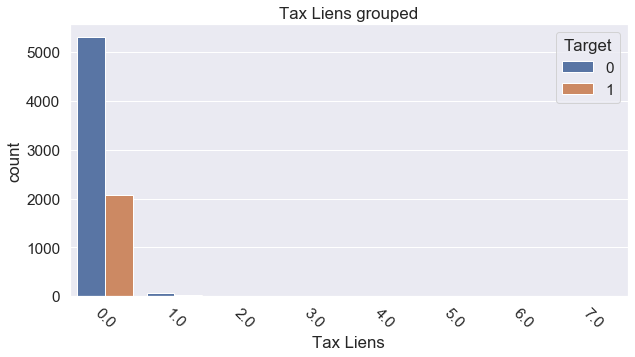

In [49]:
func_1(df,'Tax Liens')

In [50]:
df['Tax Liens gr'] = 0
df.loc[df['Tax Liens'] != 0, 'Tax Liens gr'] = 1
df['Tax Liens gr'].value_counts()

0    7366
1     134
Name: Tax Liens gr, dtype: int64

In [51]:
df_test['Tax Liens gr'] = 0
df_test.loc[df_test['Tax Liens'] != 0, 'Tax Liens gr'] = 1
df_test['Tax Liens gr'].value_counts()

0    2445
1      55
Name: Tax Liens gr, dtype: int64

### Number of Open Accounts

(0.9372566342353821, 0.0)
(0.9871779680252075, 1.627211369109613e-25)
2.0


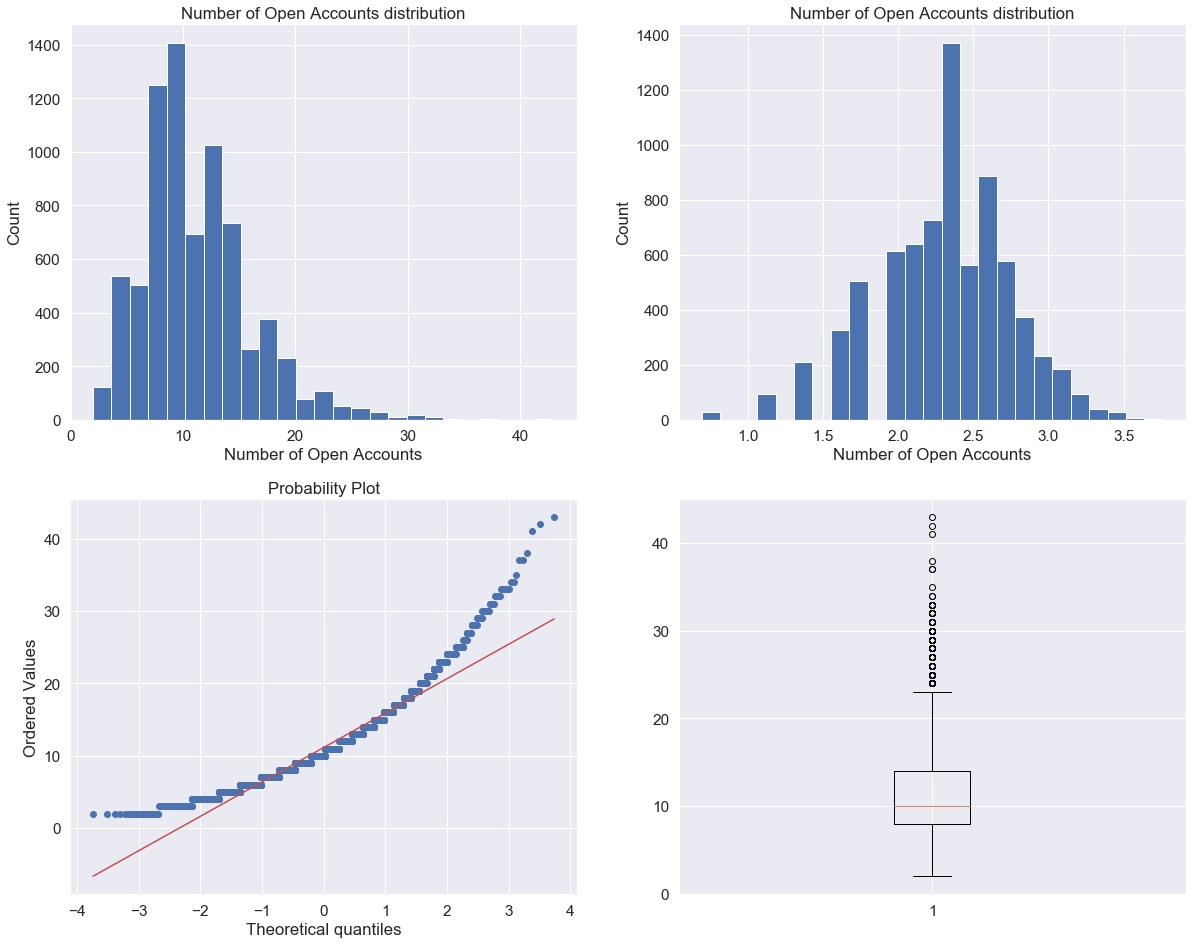

In [52]:
func_2(df,'Number of Open Accounts')

MannwhitneyuResult(statistic=5466480.0, pvalue=0.003761646078803518)


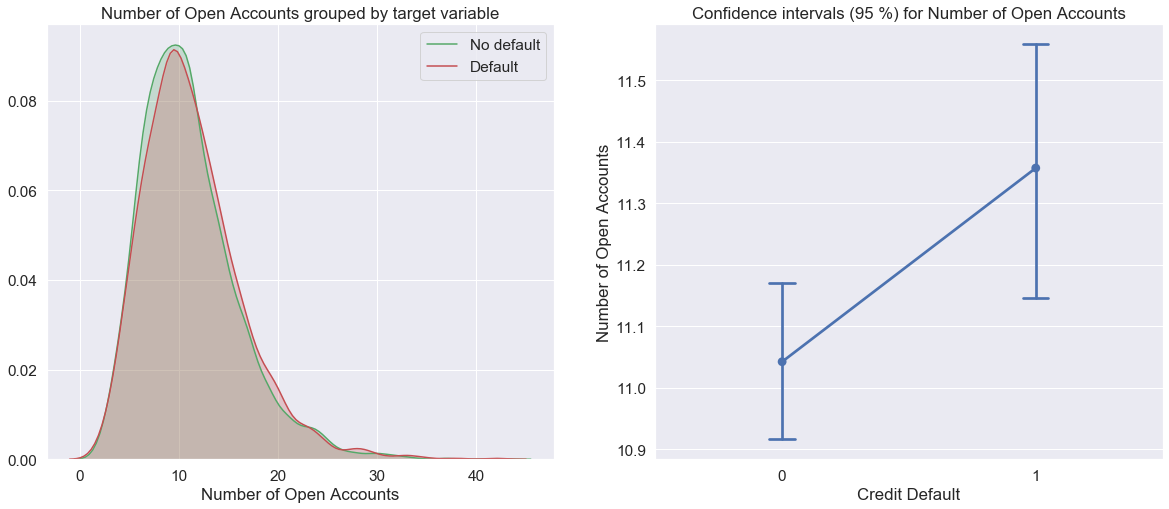

In [53]:
func_3(df,'Number of Open Accounts')

In [54]:
stat_ind(df, 'Number of Open Accounts')

мат ожидание:  11.130933333333333
среднее квадратичное отклонение:  4.908596859479331
смещенная оценка дисперсии:  24.094323128890352
несмещенная оценка дисперсии:  24.09753613370818
медиана:  10.0
мода: 
 0    9.0
dtype: float64


(0.9389863014221191, 6.676347118885071e-31)
(0.9859830141067505, 5.488870059963853e-15)
1.0


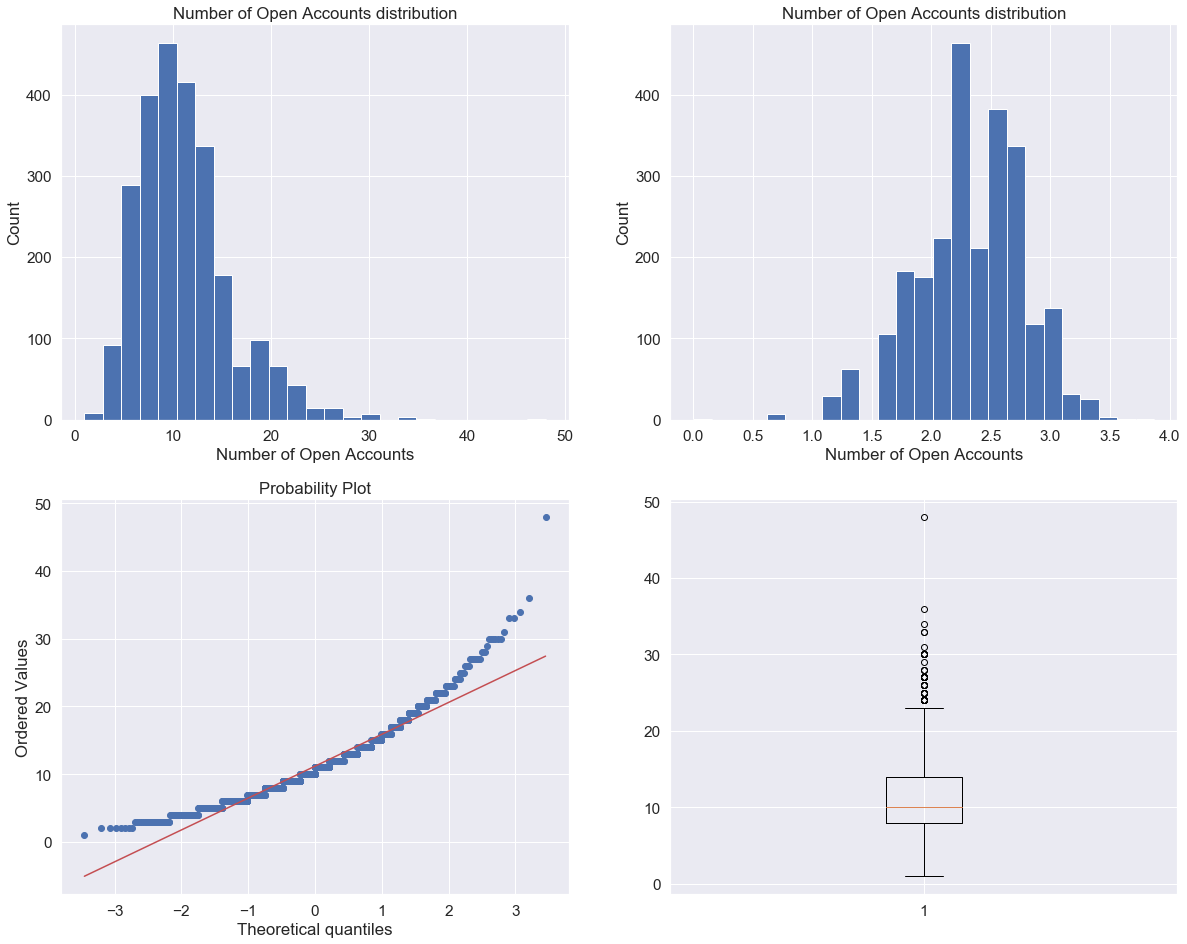

In [55]:
func_2(df_test,'Number of Open Accounts')

In [56]:
stat_ind(df_test, 'Number of Open Accounts')

мат ожидание:  11.1844
среднее квадратичное отклонение:  4.851803442020298
смещенная оценка дисперсии:  23.53999664000001
несмещенная оценка дисперсии:  23.549416406562635
медиана:  10.0
мода: 
 0    9.0
dtype: float64


In [57]:
df['Number of Open Accounts log'] = np.log(df['Number of Open Accounts'])
df_test['Number of Open Accounts log'] = np.log(df_test['Number of Open Accounts'])

In [58]:
df.loc[df['Number of Open Accounts']<6, 'Number of Open Accounts gr'] = 0
df.loc[(df['Number of Open Accounts']>=6)&(df['Number of Open Accounts']<11), 'Number of Open Accounts gr'] = 1
df.loc[(df['Number of Open Accounts']>=11)&(df['Number of Open Accounts']<16), 'Number of Open Accounts gr'] = 2
df.loc[(df['Number of Open Accounts']>=16)&(df['Number of Open Accounts']<20), 'Number of Open Accounts gr'] = 3
df.loc[(df['Number of Open Accounts']>=20), 'Number of Open Accounts gr'] = 4

In [59]:
df_test.loc[df_test['Number of Open Accounts']<6, 'Number of Open Accounts gr'] = 0
df_test.loc[(df_test['Number of Open Accounts']>=6)&(df_test['Number of Open Accounts']<11), 'Number of Open Accounts gr'] = 1
df_test.loc[(df_test['Number of Open Accounts']>=11)&(df_test['Number of Open Accounts']<16), 'Number of Open Accounts gr'] = 2
df_test.loc[(df_test['Number of Open Accounts']>=16)&(df_test['Number of Open Accounts']<20), 'Number of Open Accounts gr'] = 3
df_test.loc[(df_test['Number of Open Accounts']>=20), 'Number of Open Accounts gr'] = 4

In [60]:
df['Number of Open Accounts gr'].value_counts()

1.0    3160
2.0    2452
3.0     779
0.0     660
4.0     449
Name: Number of Open Accounts gr, dtype: int64

In [61]:
df_test['Number of Open Accounts gr'].value_counts()

1.0    1045
2.0     849
3.0     245
0.0     206
4.0     155
Name: Number of Open Accounts gr, dtype: int64

In [62]:
def three_sigma(data,col):
    data_mean, data_std = np.mean(data[col]),np.std(data[col])
    cut_off = data_std * 3
    lower,upper = data_mean - cut_off, data_mean + cut_off
    print(lower,upper)

In [63]:
three_sigma(df,'Number of Open Accounts')

-3.594857245104661 25.856723911771326


In [64]:
three_sigma(df_test,'Number of Open Accounts')

-3.371010326060894 25.739810326060894


In [65]:
df['Number of Open Accounts out'] = df['Number of Open Accounts']
df.loc[df['Number of Open Accounts out']>25, 'Number of Open Accounts out'] = np.nan

In [66]:
df_test['Number of Open Accounts out'] = df_test['Number of Open Accounts']
df_test.loc[df_test['Number of Open Accounts out']>25, 'Number of Open Accounts out'] = np.nan

In [67]:
input_val(df, 'Number of Open Accounts', ' out ')
input_val(df_test, 'Number of Open Accounts', ' out ')

In [68]:
df.loc[df['Number of Open Accounts out'].isnull()].shape,df_test.loc[df_test['Number of Open Accounts out'].isnull()].shape

((88, 43), (31, 42))

In [69]:
def get_corr(data,col):
    print(np.abs(data.corr()[col]).sort_values())

In [70]:
get_corr(df,'Number of Open Accounts out')

Current Loan Amount                   0.002114
Tax Liens gr                          0.002268
ID                                    0.002873
Tax Liens                             0.003277
Home Ownership gr 3                   0.009636
Number of Credit Problems             0.009775
Home Ownership gr 4                   0.010587
Bankruptcies                          0.010661
Home Ownership gr 1                   0.011320
Credit Score                          0.017990
Maximum Open Credit                   0.024893
Credit Default                        0.027213
Months since last delinquent          0.028170
Years in current job int gr 2         0.032712
Years in current job int              0.033556
Months since last delinquent out 2    0.042425
Years in current job int gr 1         0.049851
Months since last delinquent gr 1     0.054795
Months since last delinquent gr 3     0.058836
Months since last delinquent gr 2     0.064662
Months since last delinquent out 1    0.072391
Home Ownershi

In [71]:
def rec(data,col,pref, D):
    sample = data.loc[data[col + pref].notnull()]
    features=sample[columns]
    target=sample[col + pref]

    model3=RF(n_estimators=150,max_depth=100,min_samples_leaf=5)
    X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=5)

    model3.fit(X_train,y_train)
    y_pred_3=model3.predict(X_test)
    print(mse(y_test,y_pred_3),r2(y_test,y_pred_3))

    data.loc[data[col + pref].isnull(),col + pref] = np.around(model3.predict(data.loc[data[col + pref].isnull(),columns]))


In [72]:
columns = [
            'Monthly Debt',
            'Current Credit Balance',
            'Years of Credit History']
rec(df, 'Number of Open Accounts', ' out', columns)

15.939029166305481 0.17197942230038443


In [73]:
rec(df_test, 'Number of Open Accounts', ' out', columns)

15.905825498158583 0.15763937172446985


### Years of Credit History

In [74]:
stat_ind(df,'Years of Credit History')

мат ожидание:  18.317466666666647
среднее квадратичное отклонение:  7.041476283343465
смещенная оценка дисперсии:  49.5823882488885
несмещенная оценка дисперсии:  49.58900011557057
медиана:  17.0
мода: 
 0    15.0
dtype: float64


In [75]:
stat_ind(df_test,'Years of Credit History')

мат ожидание:  18.32592000000004
среднее квадратичное отклонение:  7.2532078526400605
смещенная оценка дисперсии:  52.609024153599435
несмещенная оценка дисперсии:  52.63007618407306
медиана:  17.0
мода: 
 0    16.5
dtype: float64


(0.9434478282928467, 0.0)
(0.9974687099456787, 6.589366274845077e-10)
4.0


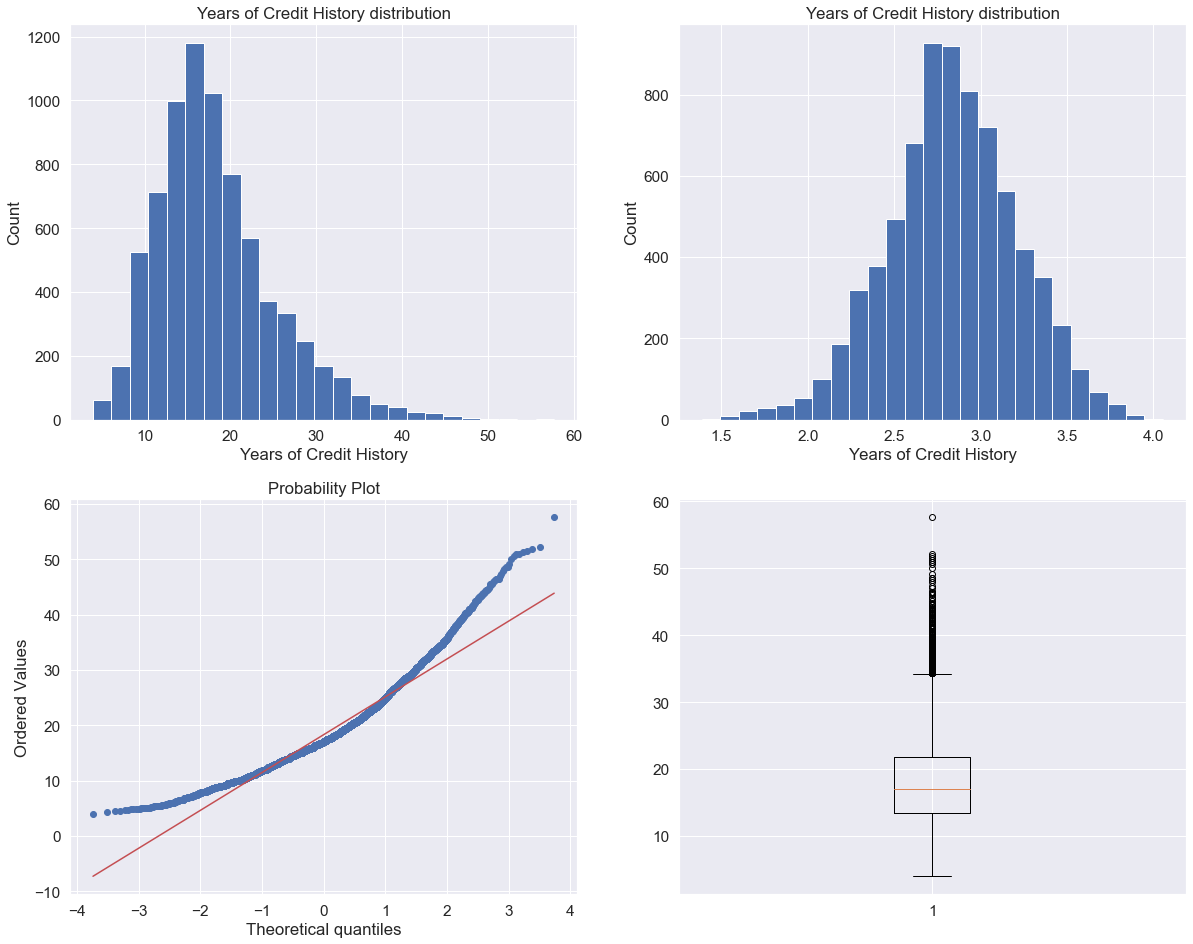

In [76]:
func_2(df, 'Years of Credit History')

MannwhitneyuResult(statistic=5461129.5, pvalue=0.003171215731103466)


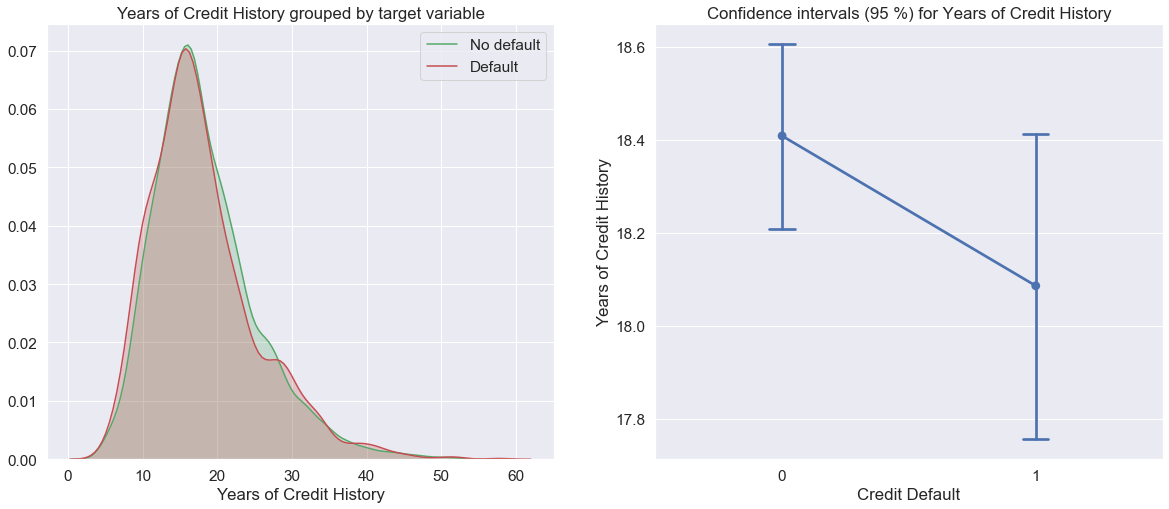

In [77]:
func_3(df,'Years of Credit History')

(0.9445943832397461, 1.1356769529282966e-29)
(0.9967125058174133, 3.050571831408888e-05)
3.9


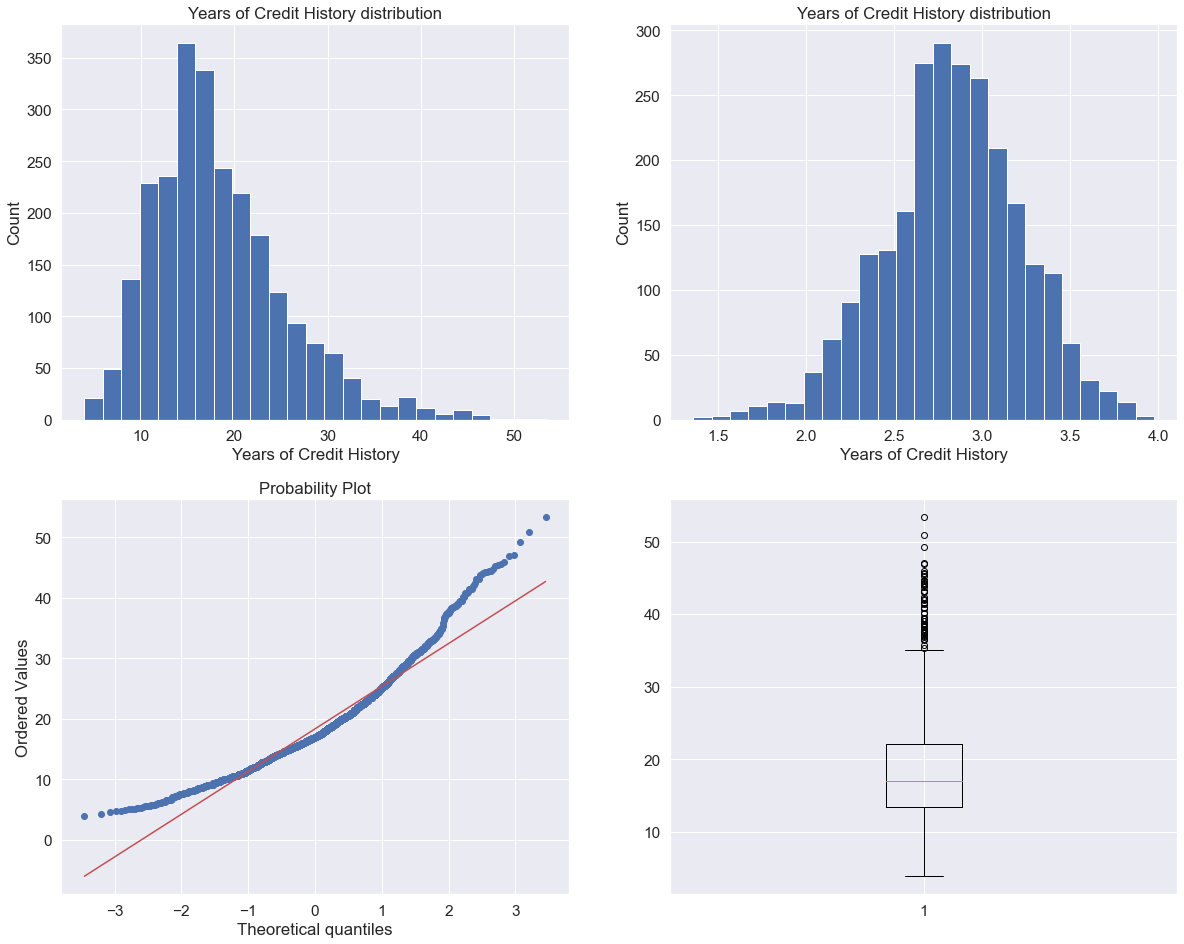

In [78]:
func_2(df_test, 'Years of Credit History')

In [79]:
df['Years of Credit History log'] = np.log(df['Years of Credit History'])
df_test['Years of Credit History log'] = np.log(df_test['Years of Credit History'])

In [80]:
three_sigma(df,'Years of Credit History')

-2.8069621833637513 39.441895516697045


In [81]:
three_sigma(df_test,'Years of Credit History')

-3.4337035579201434 40.08554355792022


In [82]:
get_corr(df,'Years of Credit History')

Tax Liens                             0.009109
ID                                    0.009556
Current Loan Amount                   0.010623
Tax Liens gr                          0.014703
Months since last delinquent          0.015375
Home Ownership gr 1                   0.015592
Credit Score                          0.015683
Home Ownership gr 4                   0.017448
Home Ownership gr 3                   0.018961
Credit Default                        0.020567
Maximum Open Credit                   0.029247
Months since last delinquent gr 1     0.067847
Number of Credit Problems             0.071259
Months since last delinquent gr 2     0.083695
Bankruptcies                          0.085592
Months since last delinquent gr 3     0.097687
Months since last delinquent out 2    0.098644
Months since last delinquent out 1    0.135982
Number of Open Accounts gr            0.143586
Number of Open Accounts out 3         0.144819
Number of Open Accounts out 1         0.144819
Number of Ope

In [83]:
df['Years of Credit History out'] = df['Years of Credit History']
df.loc[df['Years of Credit History out']>40, 'Years of Credit History out'] = np.nan

df_test['Years of Credit History out'] = df_test['Years of Credit History']
df_test.loc[df_test['Years of Credit History out']>40, 'Years of Credit History out'] = np.nan

In [84]:
columns = [
    'Annual Income nan 2',                         
    'Monthly Debt',                 
    'Years in current job int gr 1',
    'Current Credit Balance',       
    'Years in current job int',     
    'Years in current job int gr 2'
]

rec(df, 'Years of Credit History', ' out', columns)

40.640111768742265 0.06168499087046997


In [85]:
rec(df_test, 'Years of Credit History', ' out', columns)

41.91696648939187 0.09712399386105441


### Maximum Open Credit

In [86]:
stat_ind(df,'Maximum Open Credit')

мат ожидание:  945153.7274666667
среднее квадратичное отклонение:  16025148.220791155
смещенная оценка дисперсии:  256805375498325.9
несмещенная оценка дисперсии:  256839620781096.72
медиана:  478159.0
мода: 
 0    0.0
dtype: float64


In [87]:
stat_ind(df_test,'Maximum Open Credit')

мат ожидание:  710570.4056
среднее квадратичное отклонение:  1511681.0569306982
смещенная оценка дисперсии:  2285179617883.113
несмещенная оценка дисперсии:  2286094055505.315
медиана:  478676.0
мода: 
 0    0.0
dtype: float64


(0.010420262813568115, 0.0)
(nan, 1.0)
0.0


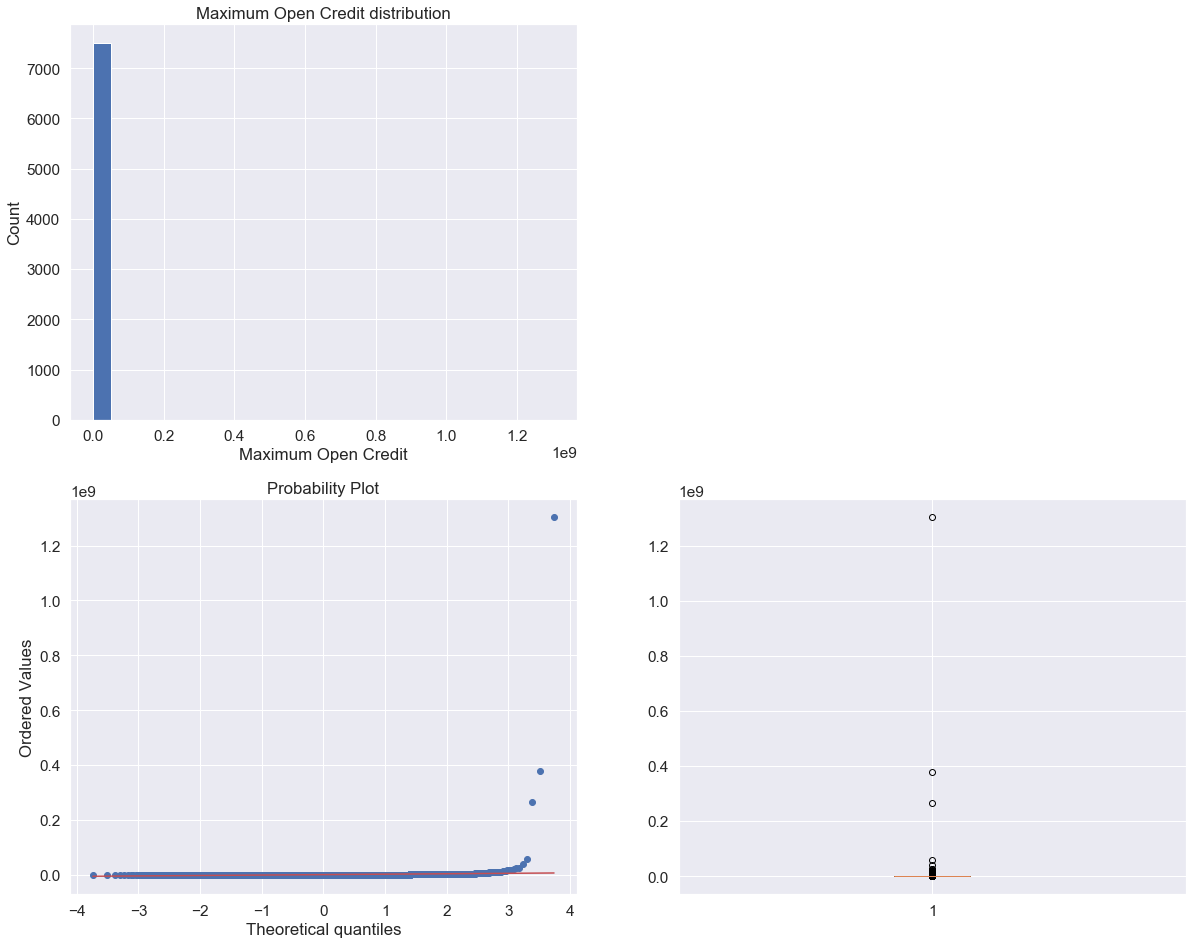

In [88]:
func_2(df,'Maximum Open Credit')

MannwhitneyuResult(statistic=5230602.0, pvalue=2.3483604148529427e-08)


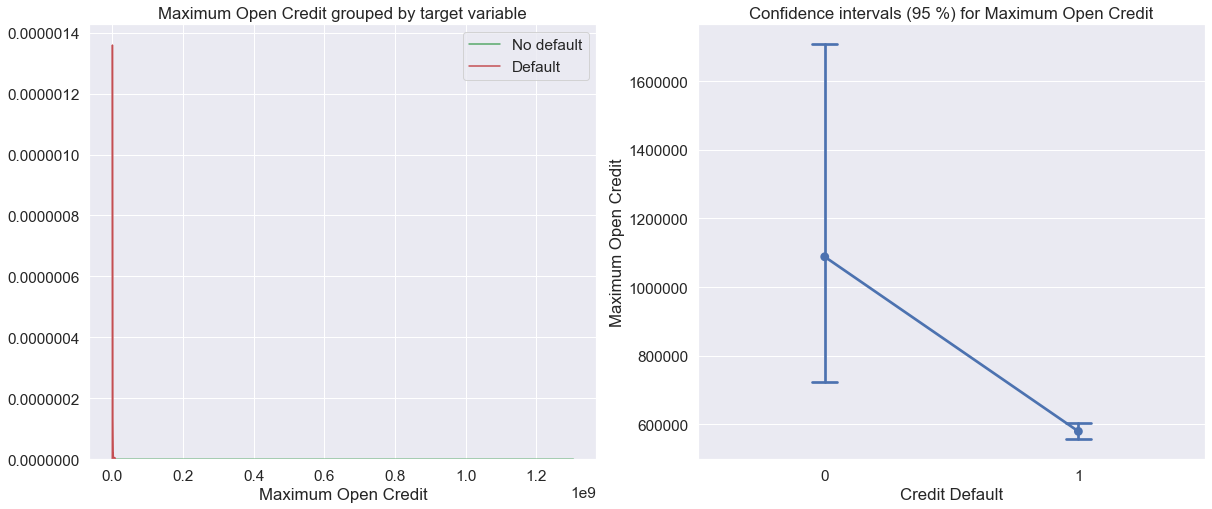

In [89]:
func_3(df, 'Maximum Open Credit')

(0.22355031967163086, 0.0)
(nan, 1.0)
0.0


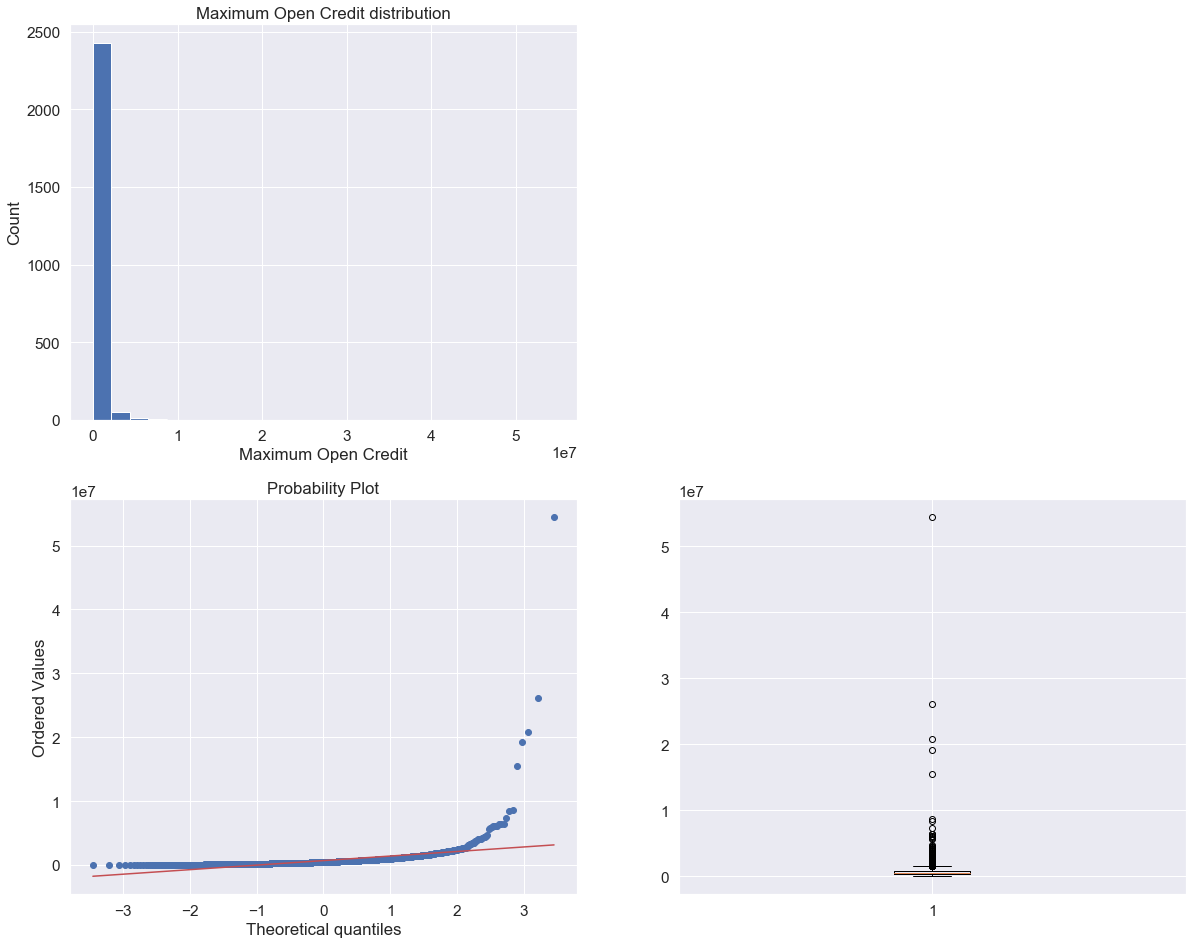

In [90]:
func_2(df_test,'Maximum Open Credit')

In [91]:
df.loc[df['Maximum Open Credit']!=0,'Maximum Open Credit'].max(),df_test.loc[df_test['Maximum Open Credit']!=0,'Maximum Open Credit'].max()

(1304726170.0, 54484386.0)

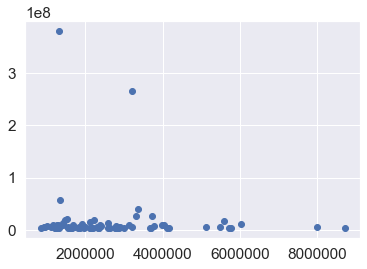

In [92]:
x = df.loc[(df['Maximum Open Credit']!=0)&(df['Maximum Open Credit']>3000000),'Annual Income']
y = df.loc[(df['Maximum Open Credit']!=0)&(df['Maximum Open Credit']>3000000),'Maximum Open Credit']
plt.scatter(x,y)
plt.show()

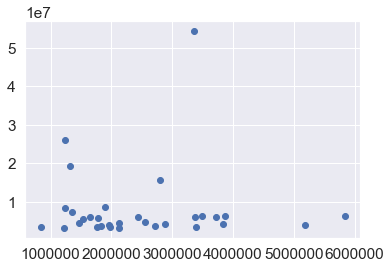

In [93]:
x = df_test.loc[(df_test['Maximum Open Credit']!=0)&(df_test['Maximum Open Credit']>3000000),'Annual Income']
y = df_test.loc[(df_test['Maximum Open Credit']!=0)&(df_test['Maximum Open Credit']>3000000),'Maximum Open Credit']
plt.scatter(x,y)
plt.show()

In [94]:
three_sigma(df,'Maximum Open Credit'), three_sigma(df_test,'Maximum Open Credit')

-47130290.9349068 49020598.38984013
-3824472.7651920943 5245613.576392095


(None, None)

In [95]:
df_test.loc[(df_test['Maximum Open Credit']!=0)&(df_test['Maximum Open Credit']>10000000),'Maximum Open Credit']

222     15568542.0
228     54484386.0
584     19185386.0
1568    26069956.0
2152    20842404.0
Name: Maximum Open Credit, dtype: float64

In [96]:
df.loc[(df['Maximum Open Credit']!=0)&(df_test['Maximum Open Credit']>10000000),'Maximum Open Credit']

222      141570.0
228      495924.0
584      323356.0
1568     975084.0
2152    1262888.0
Name: Maximum Open Credit, dtype: float64

In [97]:
border = 10000000
df['Maximum Open Credit out'] = df['Maximum Open Credit']
df.loc[df['Maximum Open Credit out']>border, 'Maximum Open Credit out'] = np.nan
df.loc[df['Maximum Open Credit out']==0, 'Maximum Open Credit out'] = np.nan

In [98]:
border = 10000000
df_test['Maximum Open Credit out'] = df_test['Maximum Open Credit']
df_test.loc[df_test['Maximum Open Credit out']>border, 'Maximum Open Credit out'] = np.nan
df_test.loc[df_test['Maximum Open Credit out']==0, 'Maximum Open Credit out'] = np.nan

In [99]:
input_val(df, 'Maximum Open Credit', ' out ')
input_val(df_test, 'Maximum Open Credit', ' out ')

In [100]:
columns = [
            'Number of Open Accounts',
            'Years of Credit History',
            'Current Credit Balance',
            'Monthly Debt',
]
rec(df, 'Maximum Open Credit', ' out', columns)

153073509326.36758 0.6174327848897494


In [101]:
rec(df_test, 'Maximum Open Credit', ' out', columns)

151555218999.1232 0.733025969223446


In [102]:
df['Maximum Open Credit out log'] = np.log(df['Maximum Open Credit out'])
df['Maximum Open Credit out 1 log'] = np.log(df['Maximum Open Credit out'])
df['Maximum Open Credit out 2 log'] = np.log(df['Maximum Open Credit out'])
df['Maximum Open Credit out 3 log'] = np.log(df['Maximum Open Credit out'])

In [103]:
df_test['Maximum Open Credit out log'] = np.log(df_test['Maximum Open Credit out'])
df_test['Maximum Open Credit out 1 log'] = np.log(df_test['Maximum Open Credit out'])
df_test['Maximum Open Credit out 2 log'] = np.log(df_test['Maximum Open Credit out'])
df_test['Maximum Open Credit out 3 log'] = np.log(df_test['Maximum Open Credit out'])

(0.6006079316139221, 0.0)
(0.990371823310852, 3.5147633261072315e-22)
4334.0


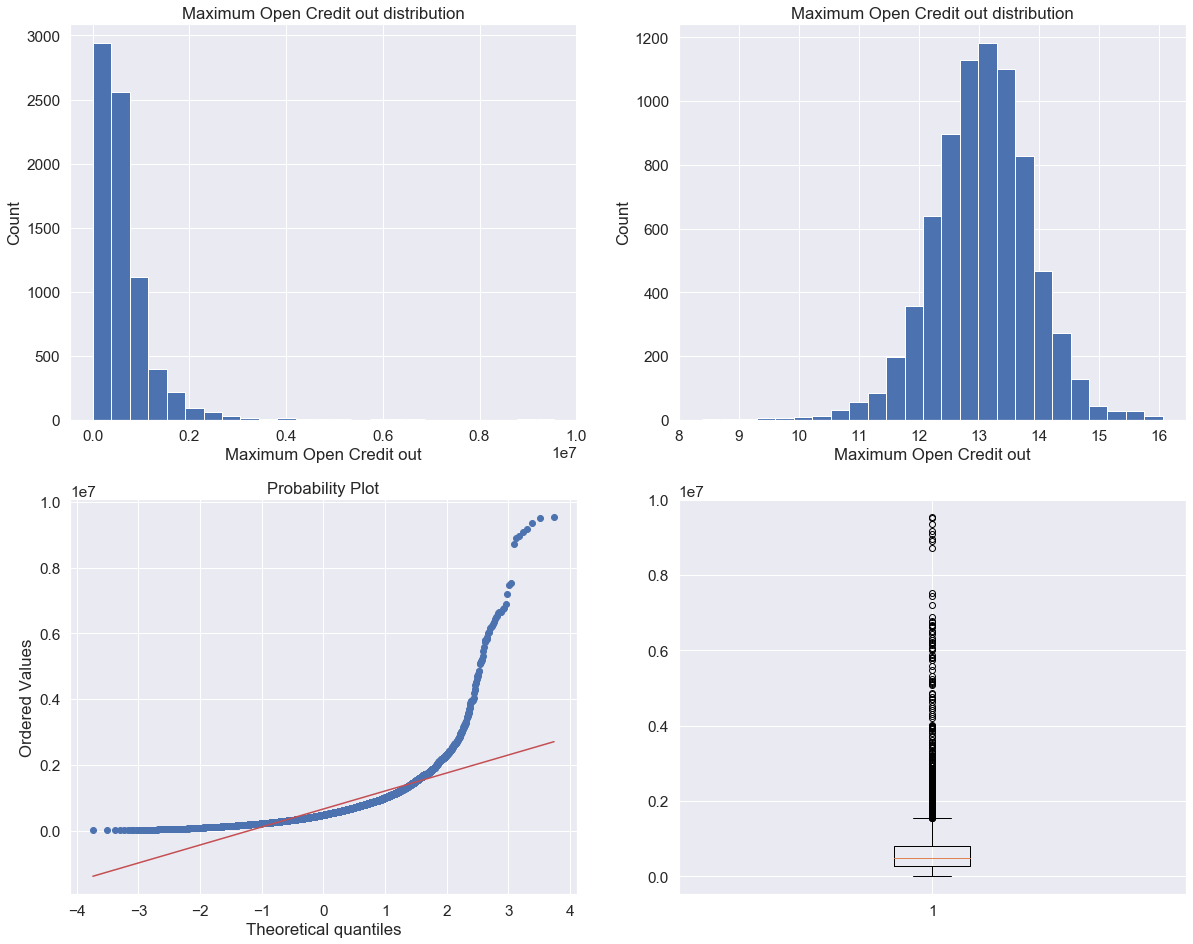

In [104]:
func_2(df,'Maximum Open Credit out')

MannwhitneyuResult(statistic=5205340.0, pvalue=4.158385538287798e-09)


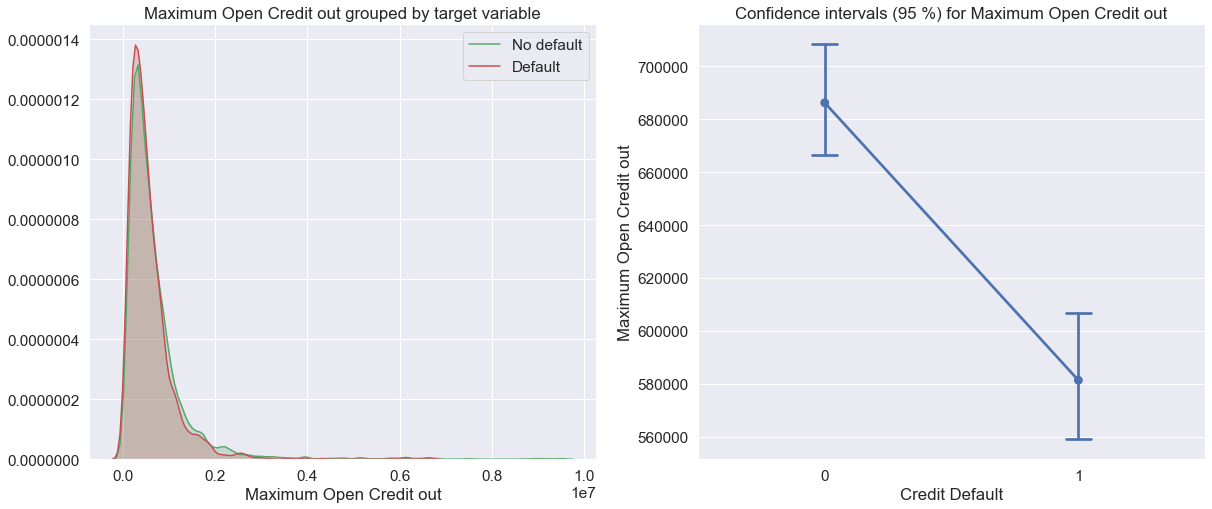

In [105]:
func_3(df,'Maximum Open Credit out')

(0.6187407970428467, 0.0)
(0.9878614544868469, 9.304694872664526e-14)
4444.0


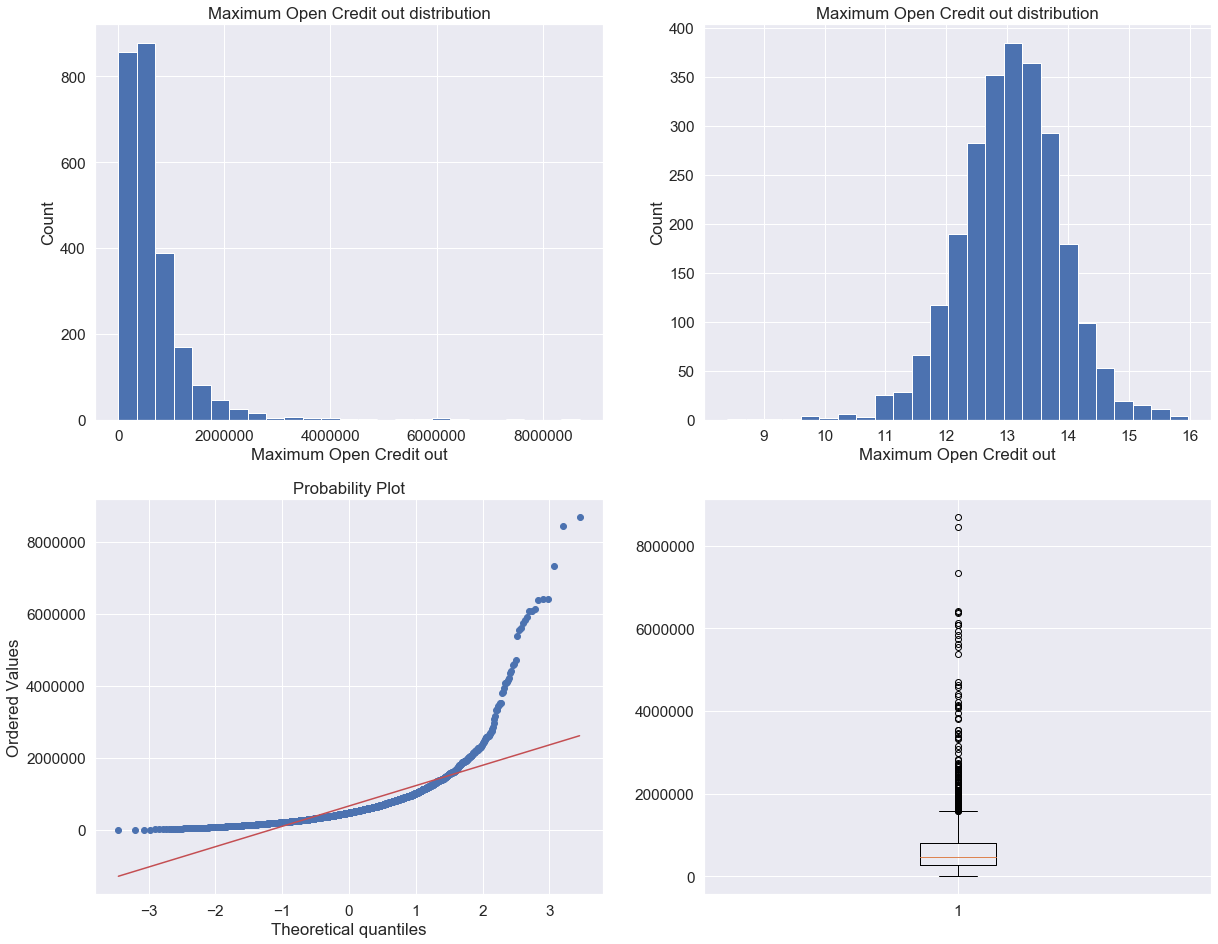

In [106]:
func_2(df_test,'Maximum Open Credit out')

### Number of Credit Problems

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64 

Number of Credit Problems  Credit Default
0.0                        0                 4654
                           1                 1815
1.0                        0                  641
                           1                  241
2.0                        0                   60
                           1                   33
3.0                        0                   21
                           1                   14
4.0                        0                    3
                           1                    6
5.0                        0                    3
                           1                    4
6.0                        0                    4
7.0                        0                    1
Name: ID, dtype: int64 



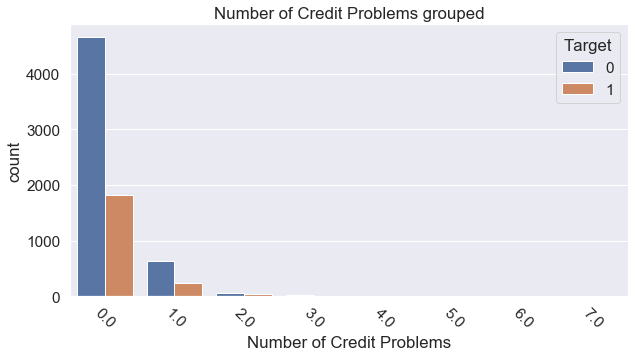

In [107]:
func_1(df,'Number of Credit Problems')

In [108]:
df['Number of Credit Problems gr'] = 0
df.loc[df['Number of Credit Problems'] != 0,'Number of Credit Problems gr'] = 1

df_test['Number of Credit Problems gr'] = 0
df_test.loc[df_test['Number of Credit Problems'] != 0,'Number of Credit Problems gr'] = 1

0    6469
1    1031
Name: Number of Credit Problems gr, dtype: int64 

Number of Credit Problems gr  Credit Default
0                             0                 4654
                              1                 1815
1                             0                  733
                              1                  298
Name: ID, dtype: int64 



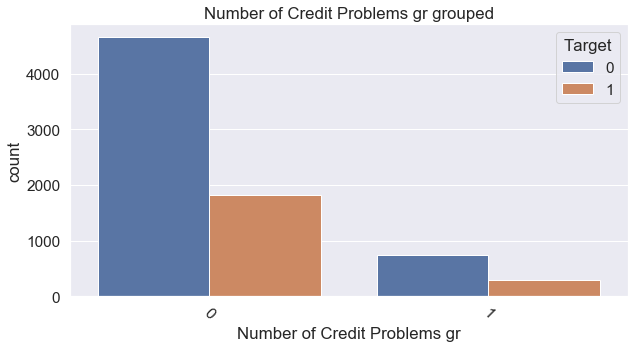

In [109]:
func_1(df,'Number of Credit Problems gr')

### Bankruptcies

0.0    6674
1.0     786
2.0      31
3.0       7
4.0       2
Name: Bankruptcies, dtype: int64 

Bankruptcies  Credit Default
0.0           0                 4792
              1                 1882
1.0           0                  569
              1                  217
2.0           0                   20
              1                   11
3.0           0                    5
              1                    2
4.0           0                    1
              1                    1
Name: ID, dtype: int64 



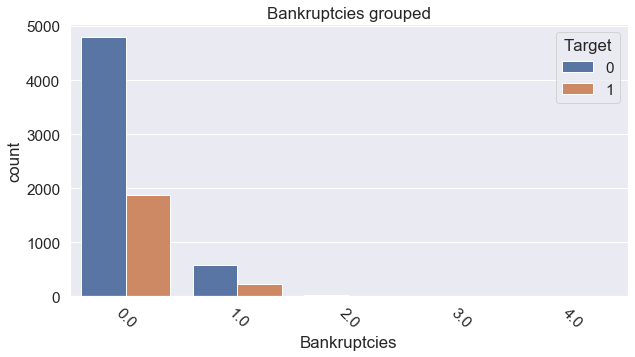

In [110]:
func_1(df,'Bankruptcies')

In [111]:
df['Bankruptcies gr'] = 0
df.loc[df['Bankruptcies'] != 0,'Bankruptcies gr'] = 1

df_test['Bankruptcies gr'] = 0
df_test.loc[df_test['Bankruptcies'] != 0,'Bankruptcies gr'] = 1

0    6674
1     826
Name: Bankruptcies gr, dtype: int64 

Bankruptcies gr  Credit Default
0                0                 4792
                 1                 1882
1                0                  595
                 1                  231
Name: ID, dtype: int64 



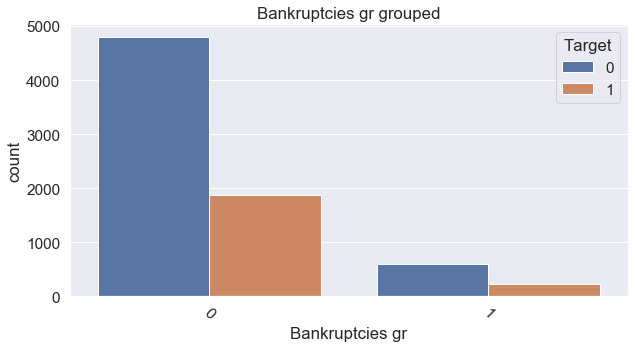

In [112]:
func_1(df,'Bankruptcies gr')

### Purpose

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64 

Purpose               Credit Default
business loan         0                   74
                      1                   55
buy a car             0                   72
                      1                   24
buy house             0                   25
                      1                    9
debt consolidation    0                 4290
                      1                 1654
educational expenses  0                    9
                      1                    1
home improvements     0                  304
   

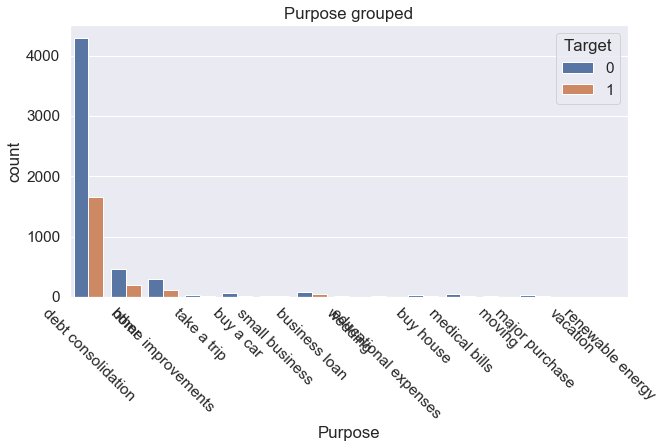

In [113]:
func_1(df,'Purpose')

In [114]:
df.loc[df['Purpose'] == 'debt consolidation', 'Purpose int'] = 1
df.loc[df['Purpose'] == 'other', 'Purpose int'] = 2
df.loc[df['Purpose'] == 'home improvements', 'Purpose int'] = 3
df.loc[df['Purpose'] == 'take a trip', 'Purpose int'] = 4
df.loc[df['Purpose'] == 'buy a car', 'Purpose int'] = 5
df.loc[df['Purpose'] == 'small business', 'Purpose int'] = 6
df.loc[df['Purpose'] == 'business loan', 'Purpose int'] = 7
df.loc[df['Purpose'] == 'wedding', 'Purpose int'] = 8
df.loc[df['Purpose'] == 'educational expenses', 'Purpose int'] = 9
df.loc[df['Purpose'] == 'buy house', 'Purpose int'] = 10
df.loc[df['Purpose'] == 'medical bills', 'Purpose int'] = 11
df.loc[df['Purpose'] == 'moving', 'Purpose int'] = 12
df.loc[df['Purpose'] == 'major purchase', 'Purpose int'] = 13
df.loc[df['Purpose'] == 'vacation', 'Purpose int'] = 14
df.loc[df['Purpose'] == 'renewable energy', 'Purpose int'] = 15

In [115]:
df_test.loc[df_test['Purpose'] == 'debt consolidation', 'Purpose int'] = 1
df_test.loc[df_test['Purpose'] == 'other', 'Purpose int'] = 2
df_test.loc[df_test['Purpose'] == 'home improvements', 'Purpose int'] = 3
df_test.loc[df_test['Purpose'] == 'take a trip', 'Purpose int'] = 4
df_test.loc[df_test['Purpose'] == 'buy a car', 'Purpose int'] = 5
df_test.loc[df_test['Purpose'] == 'small business', 'Purpose int'] = 6
df_test.loc[df_test['Purpose'] == 'business loan', 'Purpose int'] = 7
df_test.loc[df_test['Purpose'] == 'wedding', 'Purpose int'] = 8
df_test.loc[df_test['Purpose'] == 'educational expenses', 'Purpose int'] = 9
df_test.loc[df_test['Purpose'] == 'buy house', 'Purpose int'] = 10
df_test.loc[df_test['Purpose'] == 'medical bills', 'Purpose int'] = 11
df_test.loc[df_test['Purpose'] == 'moving', 'Purpose int'] = 12
df_test.loc[df_test['Purpose'] == 'major purchase', 'Purpose int'] = 13
df_test.loc[df_test['Purpose'] == 'vacation', 'Purpose int'] = 14
df_test.loc[df_test['Purpose'] == 'renewable energy', 'Purpose int'] = 15

In [116]:
df['Purpose gr'] = 0
df.loc[df['Purpose'] != 'debt consolidation','Purpose gr'] = 1

df_test['Purpose gr'] = 0
df_test.loc[df_test['Purpose'] != 'debt consolidation','Purpose gr'] = 1

0    5944
1    1556
Name: Purpose gr, dtype: int64 

Purpose gr  Credit Default
0           0                 4290
            1                 1654
1           0                 1097
            1                  459
Name: ID, dtype: int64 



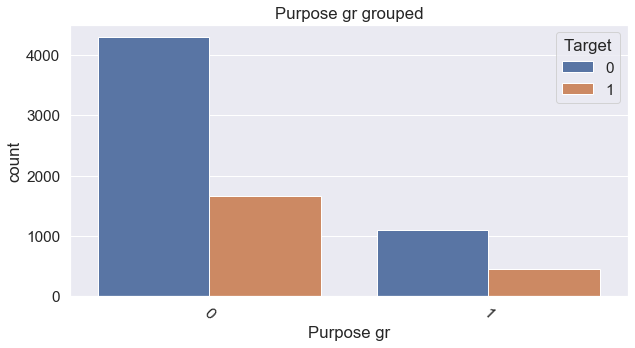

In [117]:
func_1(df,'Purpose gr')

### Term

Short Term    5556
Long Term     1944
Name: Term, dtype: int64 

Term        Credit Default
Long Term   0                 1128
            1                  816
Short Term  0                 4259
            1                 1297
Name: ID, dtype: int64 



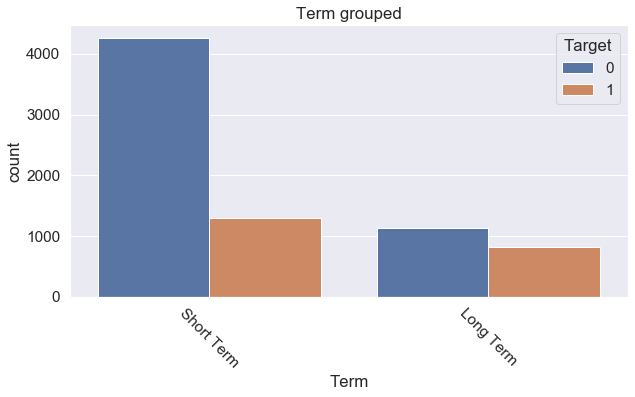

In [118]:
func_1(df,'Term')

In [119]:
# 'Short Term', 'Long Term'
df['Term int'] = df['Term'].map({'Short Term':'0', 'Long Term':'1'}).astype(int)
df_test['Term int'] = df_test['Term'].map({'Short Term':'0', 'Long Term':'1'}).astype(int)

### Current Loan Amount

In [120]:
stat_ind(df,'Current Loan Amount')

мат ожидание:  11873177.445066666
среднее квадратичное отклонение:  31923994.495578643
смещенная оценка дисперсии:  1019141424553735.4
несмещенная оценка дисперсии:  1019277328197495.0
медиана:  309573.0
мода: 
 0    99999999.0
dtype: float64


(0.37670987844467163, 0.0)
(0.6787155270576477, 0.0)
11242.0


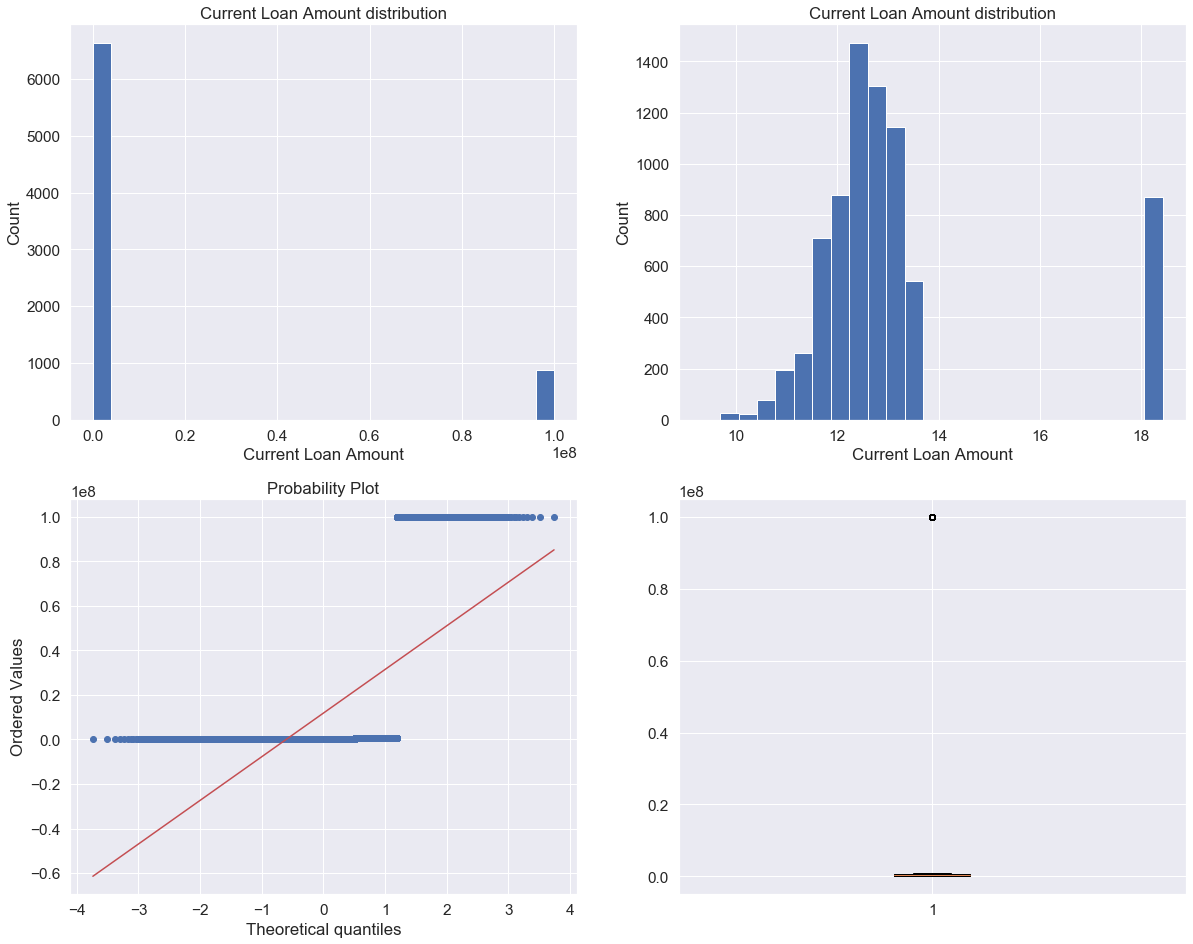

In [121]:
func_2(df,'Current Loan Amount')

MannwhitneyuResult(statistic=5169258.0, pvalue=2.923443678733522e-10)


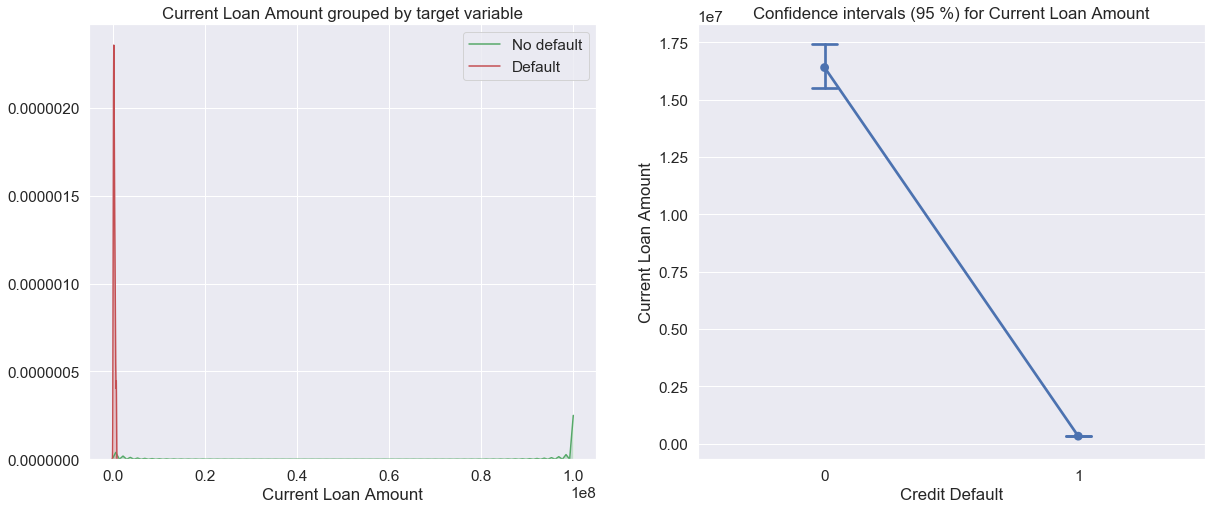

In [122]:
func_3(df,'Current Loan Amount')

(0.3815702795982361, 0.0)
(0.6864283084869385, 0.0)
15422.0


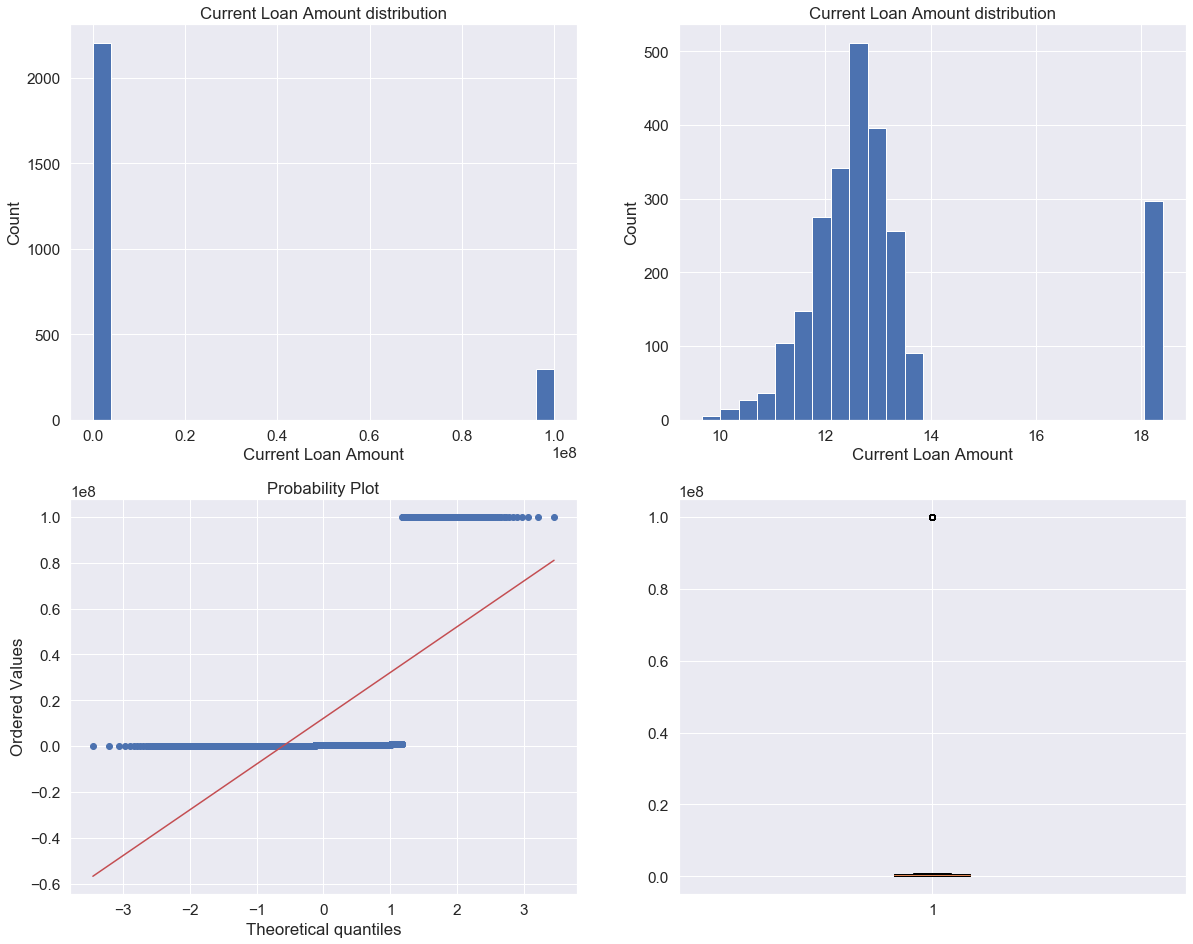

In [123]:
func_2(df_test,'Current Loan Amount')

In [124]:
df.loc[(df['Current Loan Amount']!=0)&(df['Current Loan Amount']>1000000),'Current Loan Amount'].shape

(870,)

In [125]:
df_test.loc[(df_test['Current Loan Amount']!=0)&(df_test['Current Loan Amount']>1000000),'Current Loan Amount'].shape

(297,)

In [126]:
border = 1000000
df['Current Loan Amount out'] = df['Current Loan Amount']
df.loc[df['Current Loan Amount out']>border, 'Current Loan Amount out'] = np.nan

df_test['Current Loan Amount out'] = df_test['Current Loan Amount']
df_test.loc[df_test['Current Loan Amount out']>border, 'Current Loan Amount out'] = np.nan

In [127]:
input_val(df, 'Current Loan Amount', ' out ')
input_val(df_test, 'Current Loan Amount', ' out ')

In [128]:
get_corr(df,'Current Loan Amount out')

ID                                    0.002152
Months since last delinquent out 1    0.003564
Months since last delinquent gr 3     0.006526
Months since last delinquent gr 2     0.010845
Months since last delinquent gr 1     0.017282
Credit Score                          0.017601
Months since last delinquent out 2    0.017767
Maximum Open Credit out 2             0.019015
Maximum Open Credit out 1             0.019015
Maximum Open Credit out 3             0.019015
Maximum Open Credit                   0.019015
Home Ownership gr 1                   0.027894
Months since last delinquent          0.029173
Tax Liens gr                          0.030078
Tax Liens                             0.031811
Home Ownership gr 4                   0.034922
Home Ownership gr 3                   0.041184
Number of Credit Problems             0.064557
Credit Default                        0.066139
Number of Credit Problems gr          0.091235
Years in current job int              0.091485
Years in curr

In [129]:
columns = [
            'Current Credit Balance',
            'Monthly Debt',
            'Term int',
            'Maximum Open Credit out log',
            'Annual Income nan 2'
]

rec(df, 'Current Loan Amount', ' out', columns)

18882811211.316162 0.41384607822410535


In [130]:
rec(df_test, 'Current Loan Amount', ' out', columns)

19463339471.496742 0.36501667207866206


(0.9436964392662048, 0.0)
(0.9697447419166565, 5.311694248127855e-37)
11242.0


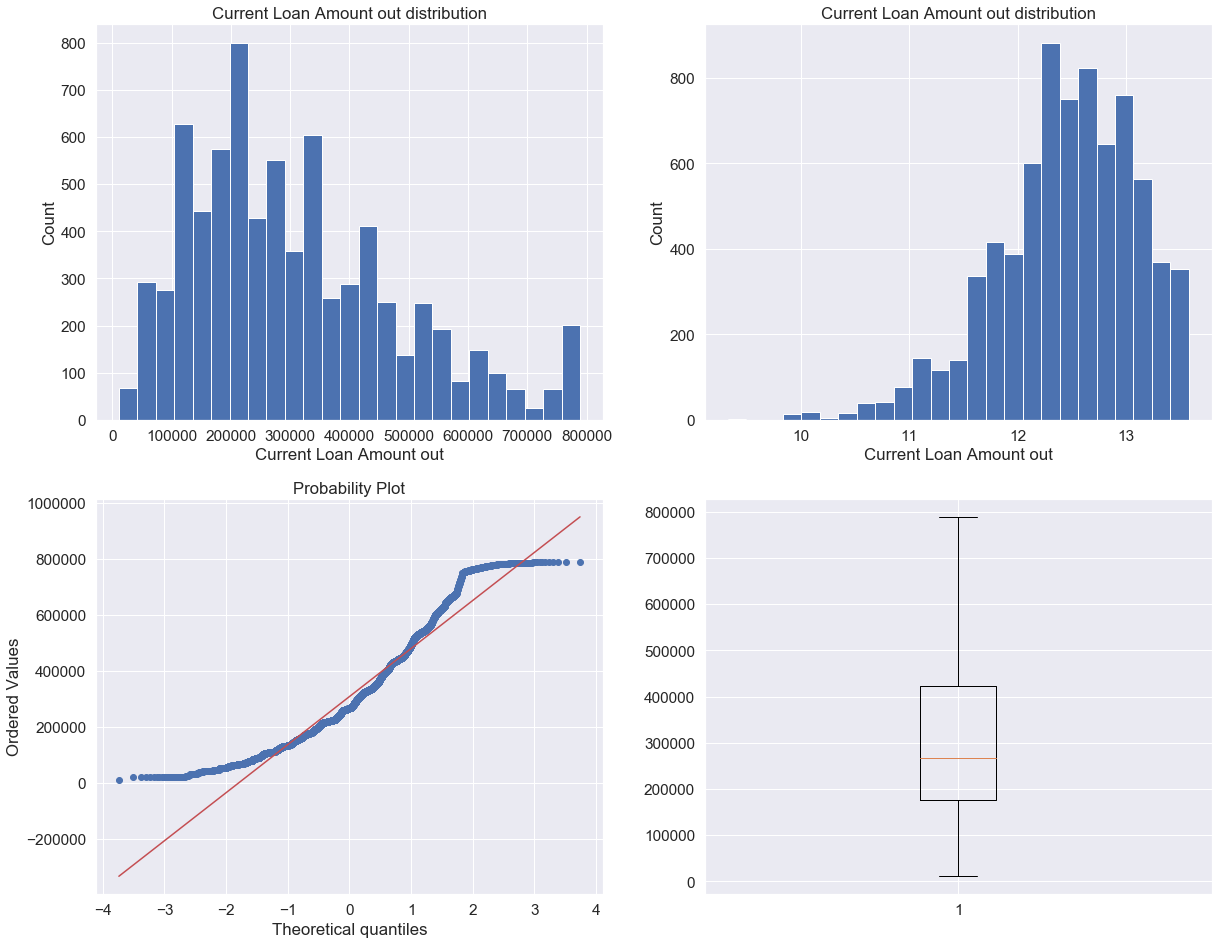

In [131]:
func_2(df,'Current Loan Amount out')

MannwhitneyuResult(statistic=5277831.5, pvalue=4.7309847115329193e-07)


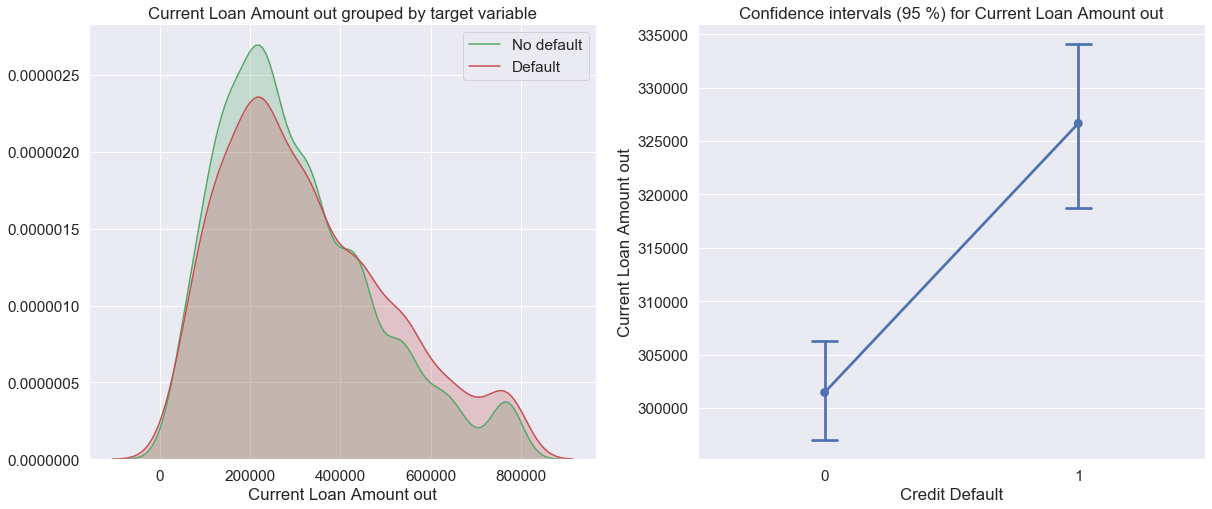

In [132]:
func_3(df,'Current Loan Amount out')

(0.9518064260482788, 6.1476463826468045e-28)
(0.9591214656829834, 5.808756937774708e-26)
15422.0


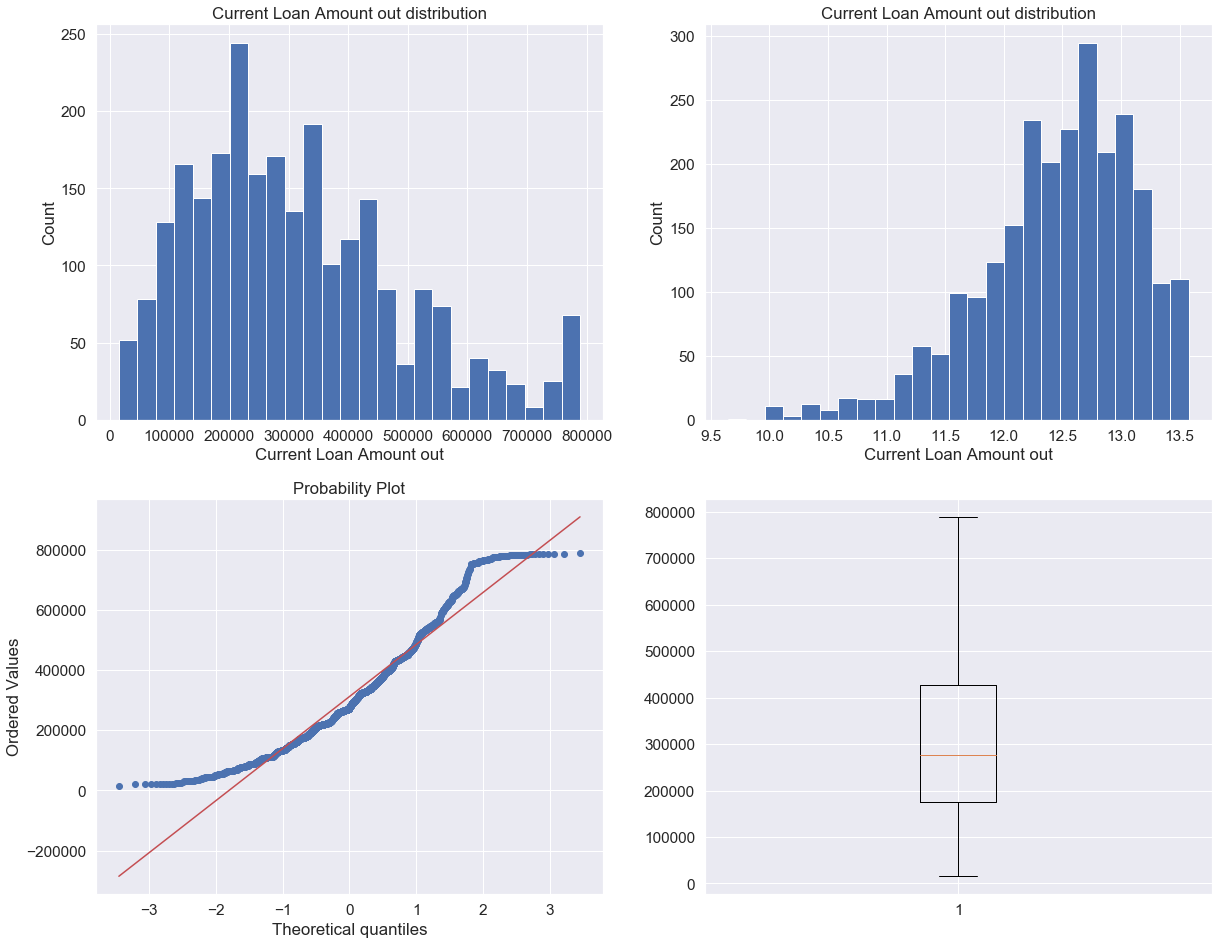

In [133]:
func_2(df_test,'Current Loan Amount out')

In [134]:
df['Current Loan Amount out log'] = np.log(df['Current Loan Amount out'])
df['Current Loan Amount out 1 log'] = np.log(df['Current Loan Amount out 1'])
df['Current Loan Amount out 2 log'] = np.log(df['Current Loan Amount out 2'])
df['Current Loan Amount out 3 log'] = np.log(df['Current Loan Amount out 3'])

In [135]:
df_test['Current Loan Amount out log'] = np.log(df_test['Current Loan Amount out'])
df_test['Current Loan Amount out 1 log'] = np.log(df_test['Current Loan Amount out 1'])
df_test['Current Loan Amount out 2 log'] = np.log(df_test['Current Loan Amount out 2'])
df_test['Current Loan Amount out 3 log'] = np.log(df_test['Current Loan Amount out 3'])

### Current Credit Balance 

In [136]:
stat_ind(df,'Current Credit Balance')

мат ожидание:  289833.2352
среднее квадратичное отклонение:  317850.19024835667
смещенная оценка дисперсии:  101028743440.91652
несмещенная оценка дисперсии:  101042215736.34802
медиана:  209323.0
мода: 
 0    0.0
dtype: float64


In [137]:
stat_ind(df_test,'Current Credit Balance')

мат ожидание:  296396.6484
среднее квадратичное отклонение:  378226.2982813217
смещенная оценка дисперсии:  143055132711.59134
несмещенная оценка дисперсии:  143112377662.6564
медиана:  207385.0
мода: 
 0    0.0
dtype: float64


(0.6394237279891968, 0.0)
(nan, 1.0)
0.0


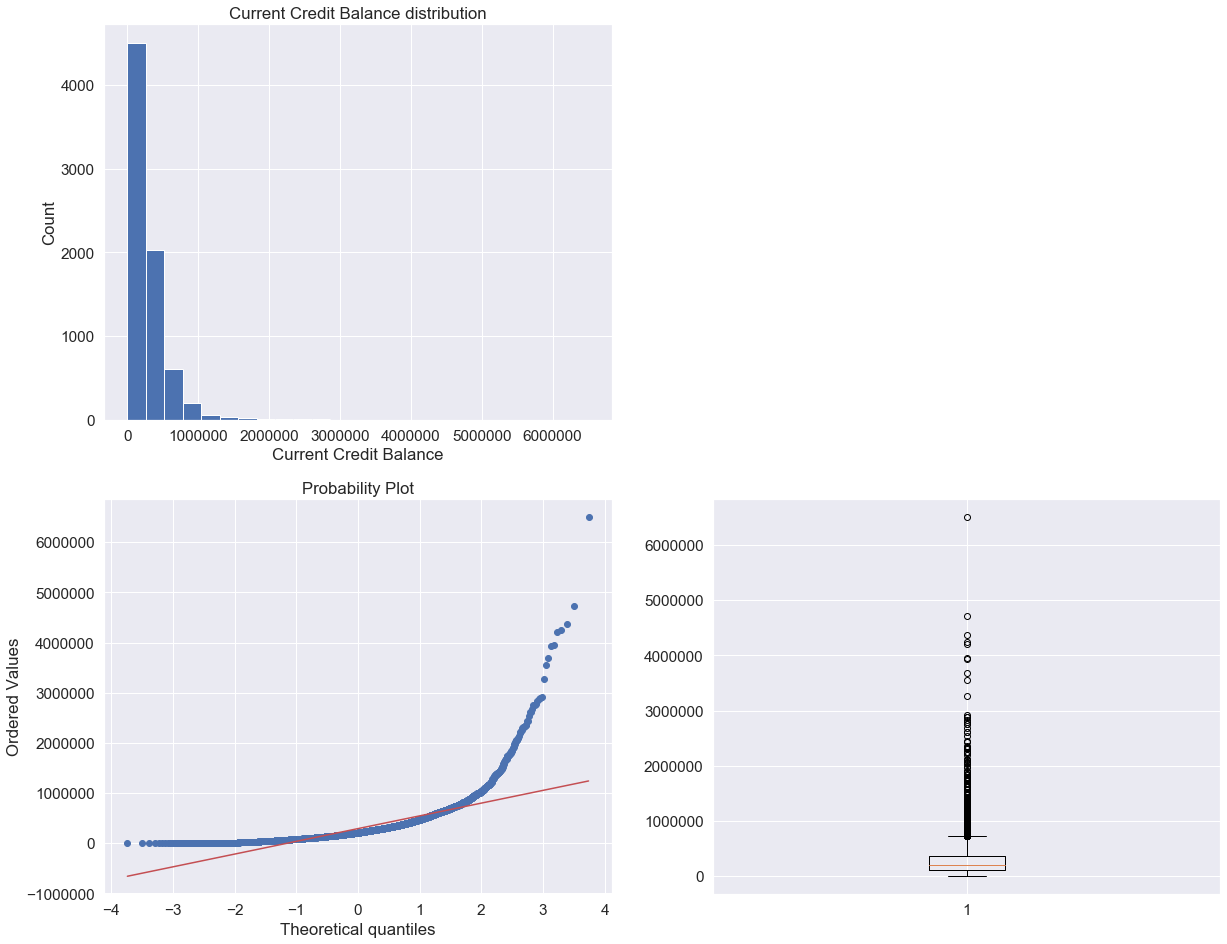

In [138]:
func_2(df,'Current Credit Balance')

MannwhitneyuResult(statistic=5687957.0, pvalue=0.48388614709675304)


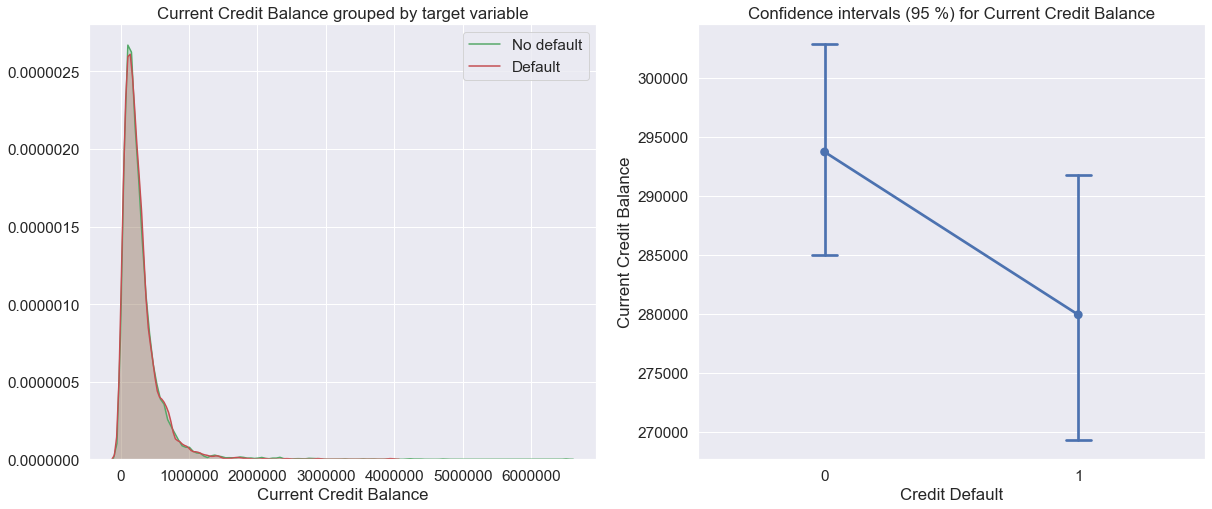

In [139]:
func_3(df,'Current Credit Balance')

(0.53226637840271, 0.0)
(nan, 1.0)
0.0


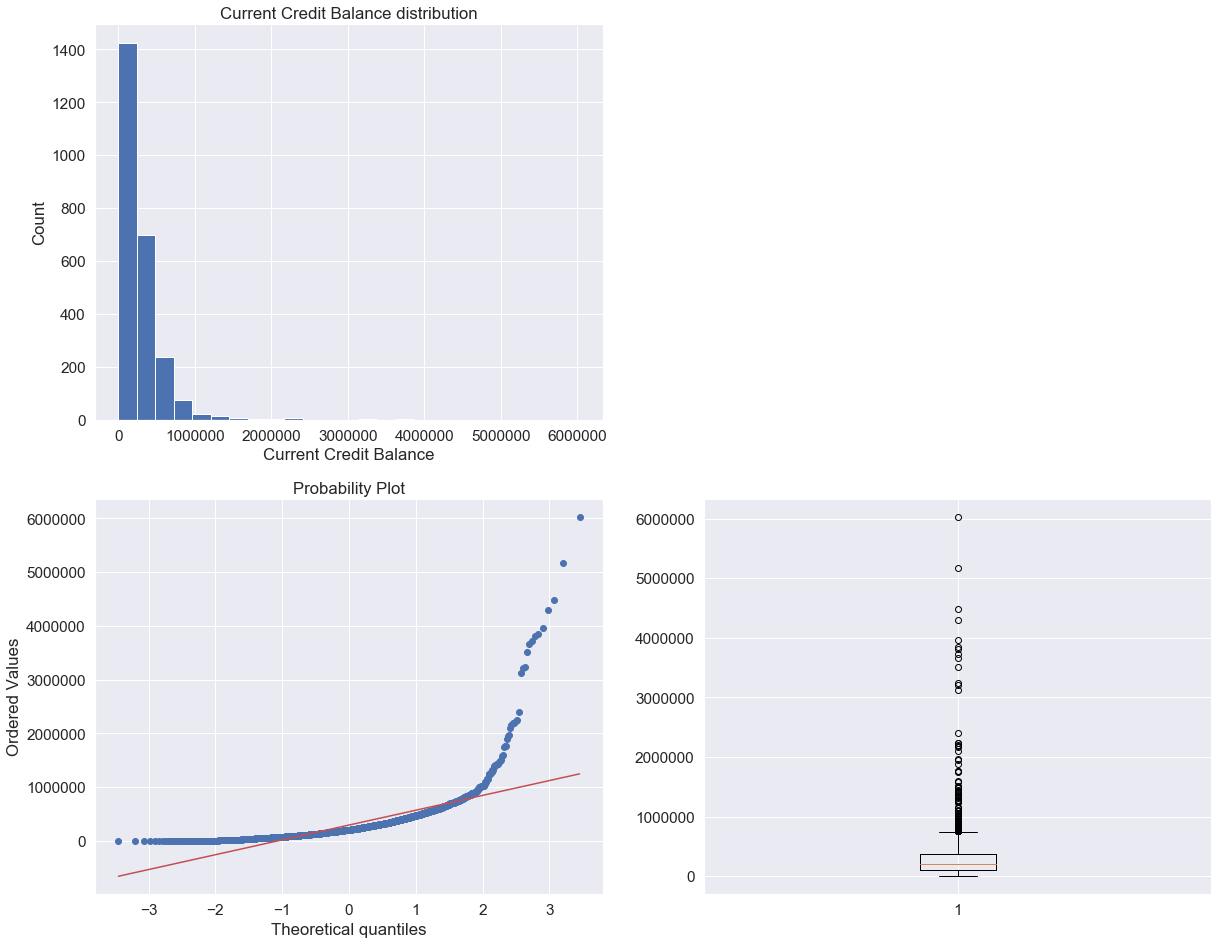

In [140]:
func_2(df_test,'Current Credit Balance')

In [141]:
three_sigma(df, 'Current Credit Balance'),three_sigma(df_test, 'Current Credit Balance')

-663717.33554507 1243383.80594507
-838282.246443965 1431075.5432439651


(None, None)

In [142]:
border = 1243383
df.loc[df['Current Credit Balance']>border,['Annual Income','Maximum Open Credit', 'Current Credit Balance']].sort_values(by='Current Credit Balance').tail(10)

Annual Income  Maximum Open Credit  Current Credit Balance
1931      2773468.0            3979206.0               3271629.0
162       2131591.0            4191176.0               3547262.0
3198            NaN            5150860.0               3683340.0
2618      3199448.0            5109676.0               3927471.0
3316            NaN            6619316.0               3944514.0
7278      2418415.0            7453138.0               4209659.0
1580      3783660.0            7204516.0               4249673.0
4602      3990038.0            9541136.0               4367245.0
4745      6029954.0           11603856.0               4720132.0
4769      3739960.0           26343328.0               6506797.0

In [143]:
df_test.loc[df_test['Current Credit Balance']>border,['Annual Income','Maximum Open Credit', 'Current Credit Balance']].sort_values(by='Current Credit Balance').tail(10)

Annual Income  Maximum Open Credit  Current Credit Balance
1872      1237109.0            8440410.0               3513518.0
435       2431772.0            6087290.0               3659001.0
2247      1784499.0            5826348.0               3723563.0
1683      3485645.0            6404046.0               3816207.0
1426      3381506.0            6080470.0               3854473.0
2058      1649086.0            6133600.0               3962298.0
253       3863840.0            6381078.0               4304051.0
285       5840220.0            6425034.0               4489054.0
228       3356255.0           54484386.0               5176018.0
2152            NaN           20842404.0               6030087.0

In [144]:
df['Current Credit Balance out'] = df['Current Credit Balance']
df.loc[df['Current Credit Balance out']==0, 'Current Credit Balance out'] = np.nan

df_test['Current Credit Balance out'] = df_test['Current Credit Balance']
df_test.loc[df_test['Current Credit Balance out']==0, 'Current Credit Balance out'] = np.nan

In [145]:
input_val(df, 'Current Credit Balance', ' out ')
input_val(df_test, 'Current Credit Balance', ' out ')

In [146]:
columns = [
            'Annual Income nan 2',
            'Current Loan Amount out',
            'Years of Credit History',
            'Monthly Debt',
            'Maximum Open Credit out'
]
rec(df, 'Current Credit Balance', ' out', columns)

28247910957.54238 0.7526929536130001


In [147]:
rec(df_test, 'Current Credit Balance', ' out', columns)

24461173131.142883 0.8460144974752215


(0.6366262435913086, 0.0)
(0.9213006496429443, 0.0)
19.0


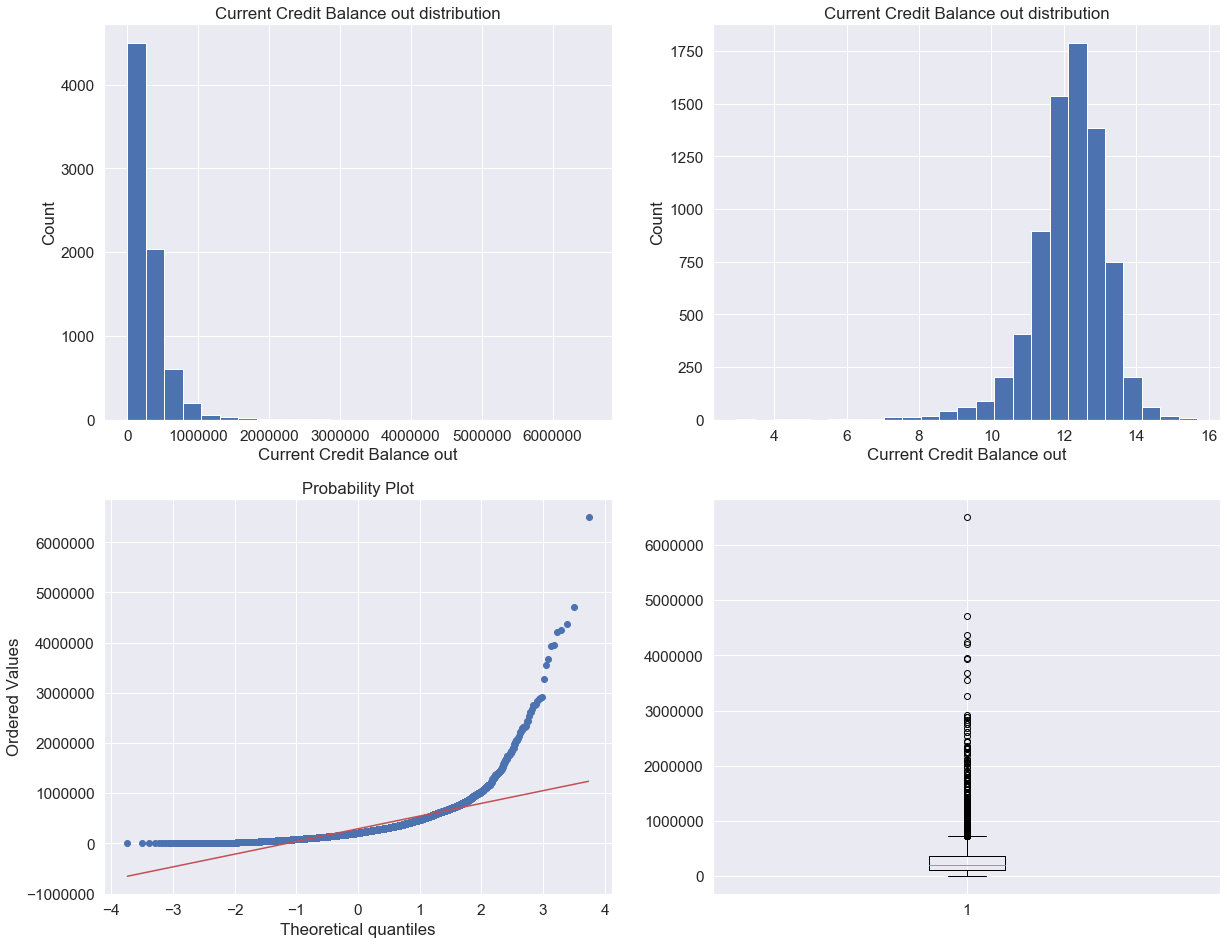

In [148]:
func_2(df,'Current Credit Balance out')

MannwhitneyuResult(statistic=5677860.5, pvalue=0.43640187878955033)


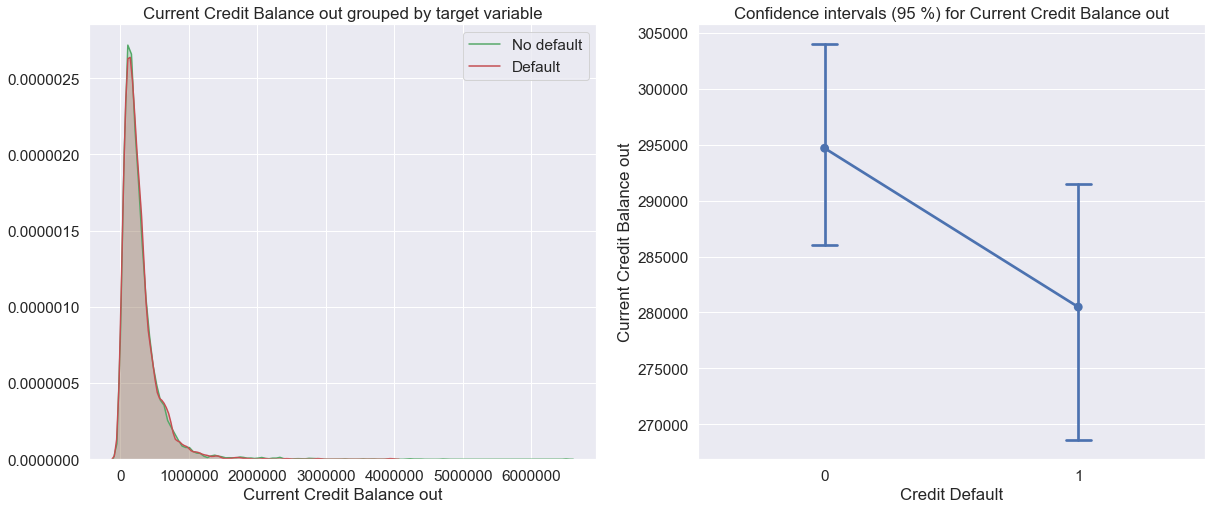

In [149]:
func_3(df,'Current Credit Balance out')

(0.5309573411941528, 0.0)
(0.9174540042877197, 6.245097854809641e-35)
57.0


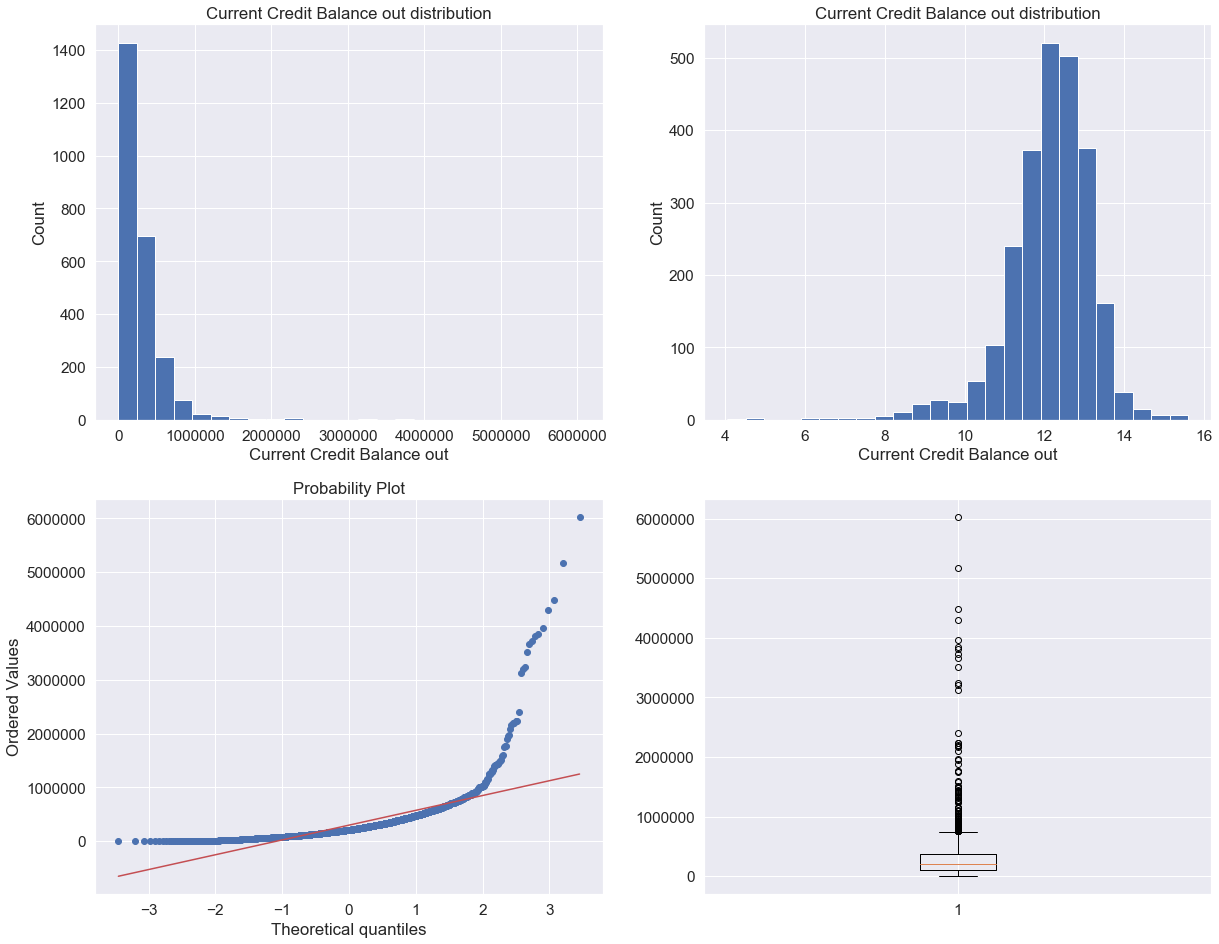

In [150]:
func_2(df_test,'Current Credit Balance out')

In [151]:
df['Current Credit Balance out log'] = np.log(df['Current Credit Balance out'])
df['Current Credit Balance out 1 log'] = np.log(df['Current Credit Balance out 1'])
df['Current Credit Balance out 2 log'] = np.log(df['Current Credit Balance out 2'])
df['Current Credit Balance out 3 log'] = np.log(df['Current Credit Balance out 3'])

In [152]:
df_test['Current Credit Balance out log'] = np.log(df_test['Current Credit Balance out'])
df_test['Current Credit Balance out 1 log'] = np.log(df_test['Current Credit Balance out 1'])
df_test['Current Credit Balance out 2 log'] = np.log(df_test['Current Credit Balance out 2'])
df_test['Current Credit Balance out 3 log'] = np.log(df_test['Current Credit Balance out 3'])

<font color='red'>
не знаю, стоит ли убирать выбросы, мне кажется нет

### Monthly Debt

In [153]:
stat_ind(df,'Monthly Debt')

мат ожидание:  18314.454133333333
среднее квадратичное отклонение:  11925.969528381991
смещенная оценка дисперсии:  142228749.19189578
несмещенная оценка дисперсии:  142247715.55396965
медиана:  16076.5
мода: 
 0    0.0
dtype: float64


(0.8937593698501587, 0.0)
(nan, 1.0)
0.0


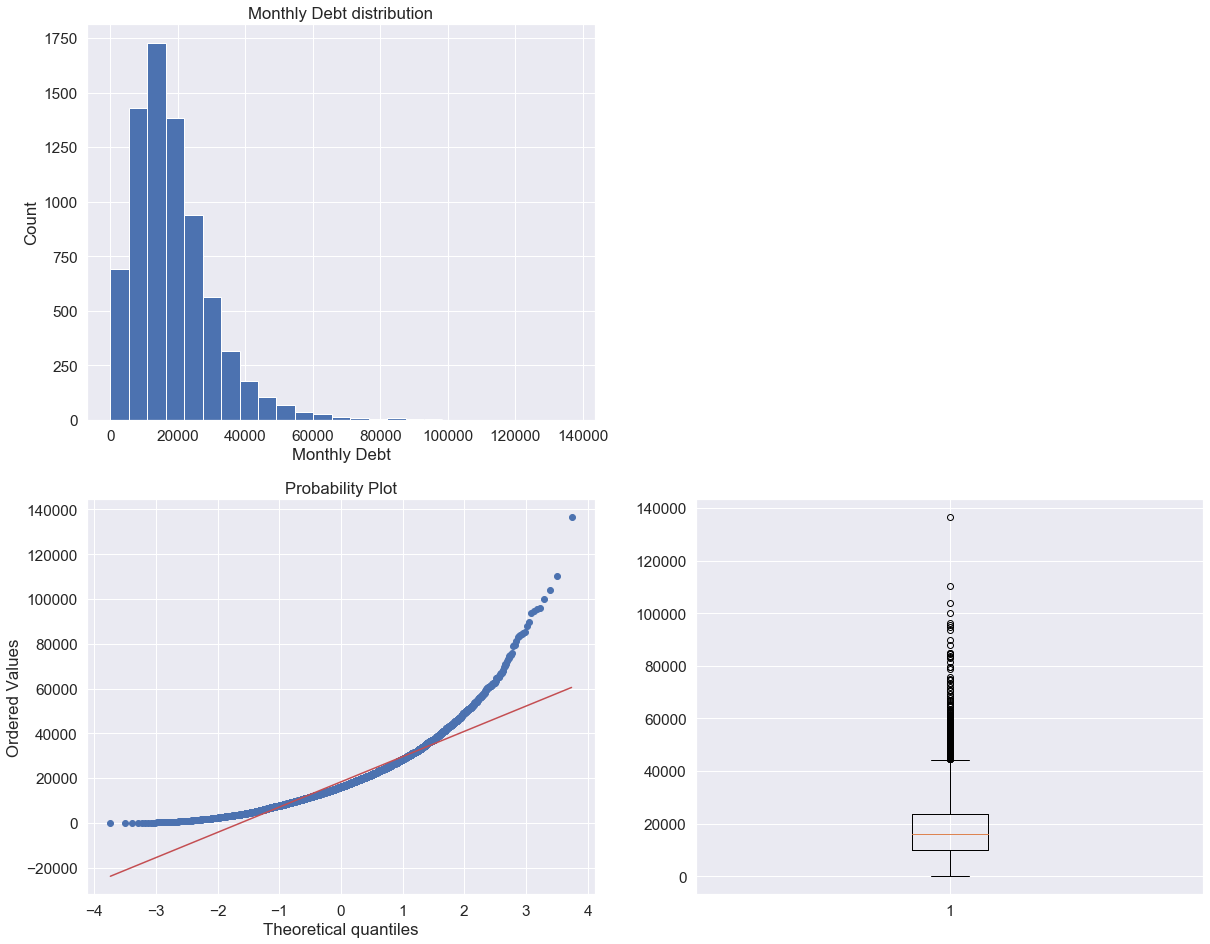

In [154]:
func_2(df,'Monthly Debt')

MannwhitneyuResult(statistic=5534935.5, pvalue=0.03183394406726229)


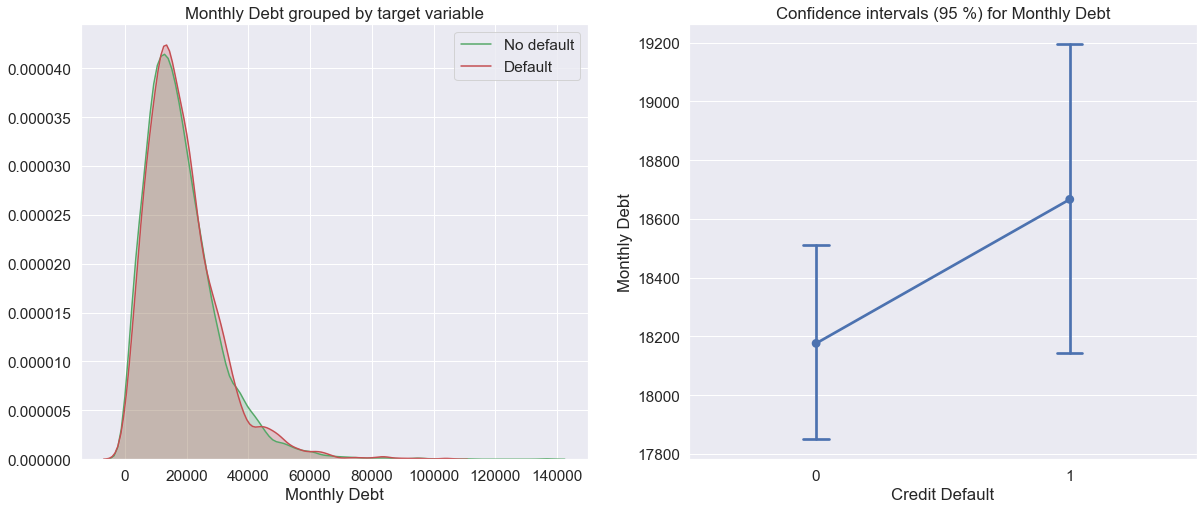

In [155]:
func_3(df,'Monthly Debt')

(0.9200009107589722, 1.6801083616913713e-34)
(0.9119077324867249, 7.849616075230259e-36)
93.0


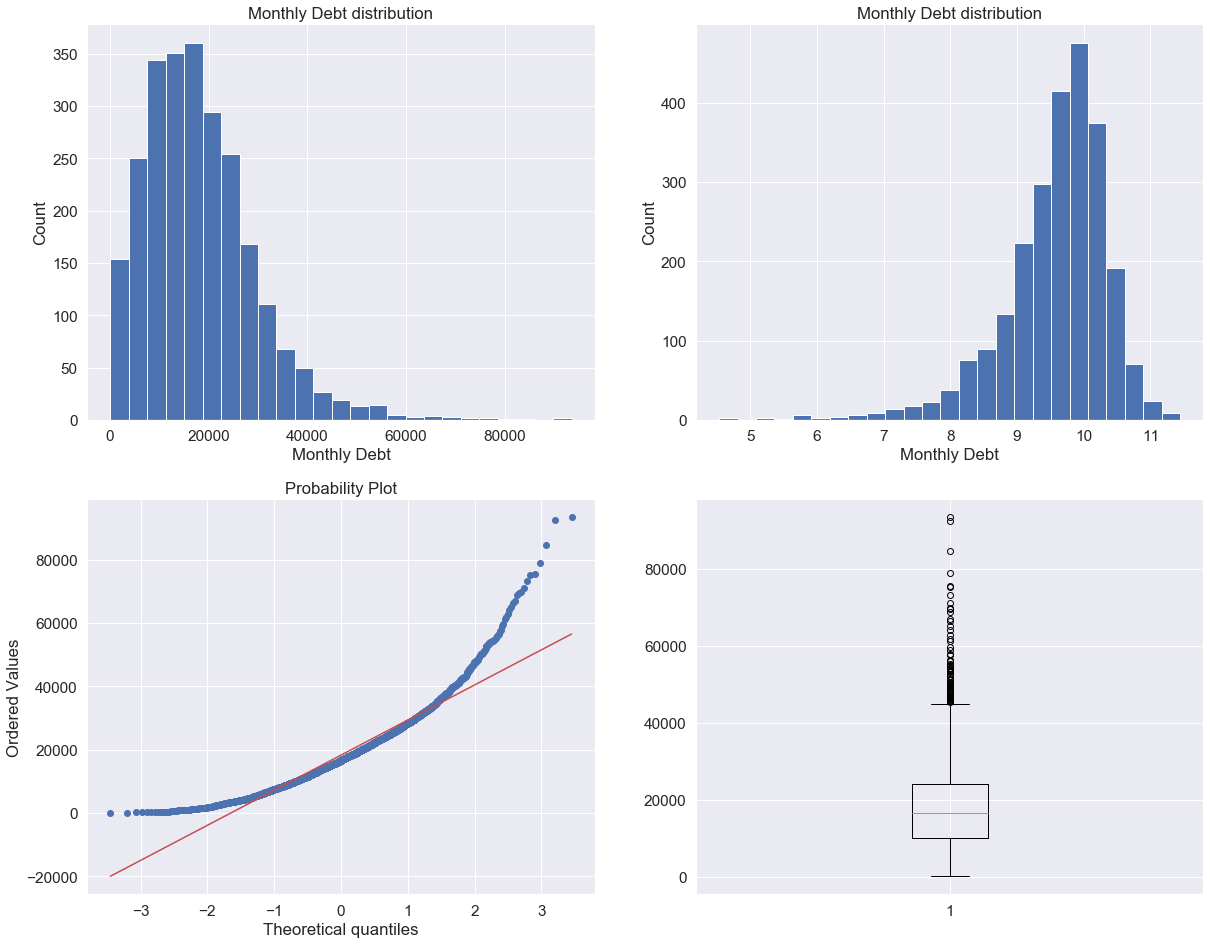

In [156]:
func_2(df_test,'Monthly Debt')

In [157]:
df['Monthly Debt gr']=0
df.loc[df['Monthly Debt']<12500, 'Monthly Debt gr'] = 0
df.loc[(df['Monthly Debt']>=12500)&(df['Monthly Debt']<25000), 'Monthly Debt gr'] = 1
df.loc[(df['Monthly Debt']>=25000), 'Monthly Debt gr'] = 2

df['Monthly Debt log'] = np.log(df['Monthly Debt'])

In [158]:
df_test['Monthly Debt gr']=0
df_test.loc[df_test['Monthly Debt']<12500, 'Monthly Debt gr'] = 0
df_test.loc[(df_test['Monthly Debt']>=12500)&(df_test['Monthly Debt']<25000), 'Monthly Debt gr'] = 1
df_test.loc[(df_test['Monthly Debt']>=25000), 'Monthly Debt gr'] = 2

df_test['Monthly Debt log'] = np.log(df_test['Monthly Debt'])

In [159]:
df.loc[df['Monthly Debt']==0,'Monthly Debt'].shape, df_test.loc[df_test['Monthly Debt']==0,'Monthly Debt'].shape

((6,), (0,))

In [160]:
df['Monthly Debt out'] = df['Monthly Debt']
df.loc[df['Monthly Debt out']==0, 'Monthly Debt out'] = np.nan

In [161]:
input_val(df, 'Monthly Debt', ' out ')

In [162]:
columns = [
            'Annual Income nan 2',
            'Number of Open Accounts',
            'Current Credit Balance out',
            'Maximum Open Credit out log',
            'Current Loan Amount out'
]
rec(df, 'Monthly Debt', ' out', columns)

72399761.29791582 0.5045253213431149


In [163]:
df_test['Monthly Debt out'] = df_test['Monthly Debt'] 

df_test['Monthly Debt out 1'] = df_test['Monthly Debt'] 
df_test['Monthly Debt out 2'] = df_test['Monthly Debt'] 
df_test['Monthly Debt out 3'] = df_test['Monthly Debt'] 

(0.8932191133499146, 0.0)
(0.9390383958816528, 0.0)
17.0


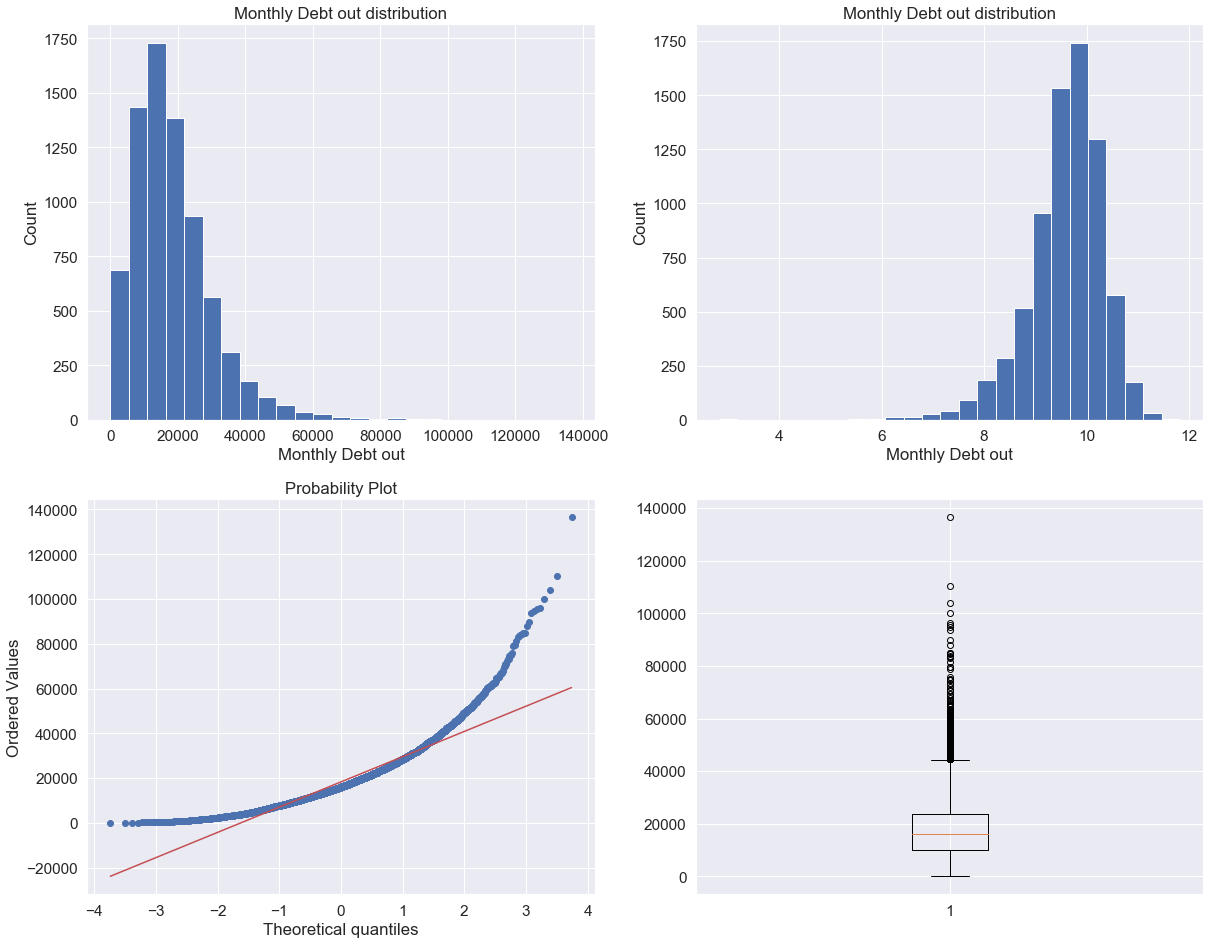

In [164]:
func_2(df,'Monthly Debt out')

MannwhitneyuResult(statistic=5535214.0, pvalue=0.032070627331959825)


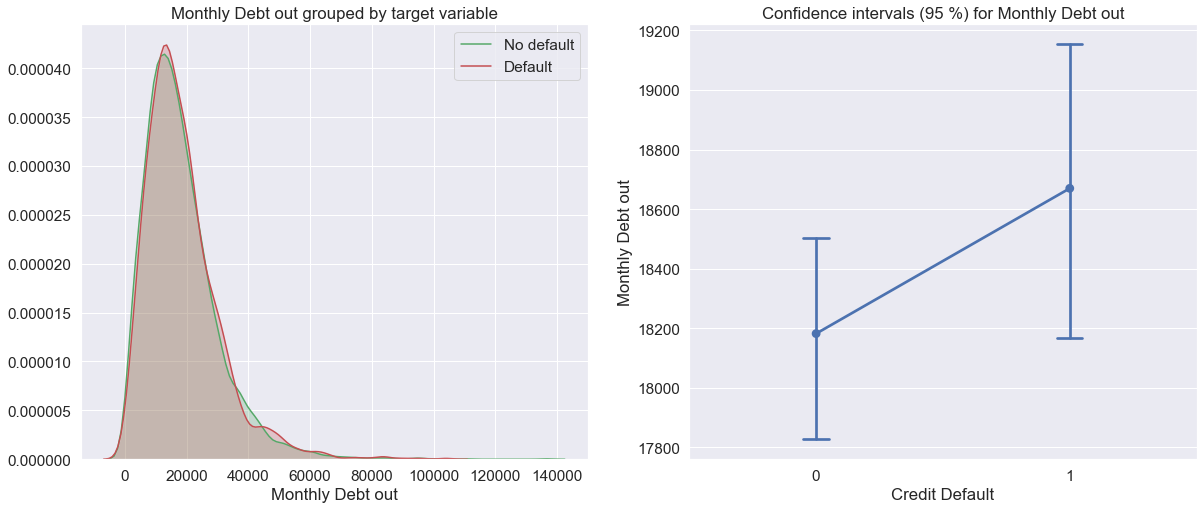

In [165]:
func_3(df,'Monthly Debt out')

In [166]:
df['Monthly Debt out log'] = np.log(df['Monthly Debt out'])

df['Monthly Debt out 1 log'] = np.log(df['Monthly Debt out 1'])
df['Monthly Debt out 2 log'] = np.log(df['Monthly Debt out 2'])
df['Monthly Debt out 3 log'] = np.log(df['Monthly Debt out 3'])

In [167]:
df_test['Monthly Debt out log'] = np.log(df['Monthly Debt out'])

df_test['Monthly Debt out 1 log'] = np.log(df_test['Monthly Debt out 1'])
df_test['Monthly Debt out 2 log'] = np.log(df_test['Monthly Debt out 2'])
df_test['Monthly Debt out 3 log'] = np.log(df_test['Monthly Debt out 3'])

### Annual Income - попробуем еще раз убрать признаки

In [168]:
np.abs(df.corr()['Annual Income']).sort_values().tail(60)

Home Ownership gr 1                   0.068538
Months since last delinquent gr 1     0.070070
Bankruptcies gr                       0.070425
Home Ownership gr 4                   0.070768
Home Ownership gr 3                   0.071812
Months since last delinquent out 1    0.080571
Term int                              0.096060
Months since last delinquent gr 3     0.096064
Months since last delinquent gr 2     0.097234
Credit Default                        0.101375
Months since last delinquent          0.101787
Home Ownership gr 2                   0.112855
Home Ownership int                    0.114734
Years in current job int gr 1         0.115103
Current Loan Amount out 1 log         0.132397
Current Loan Amount out 2 log         0.132397
Current Loan Amount out 3 log         0.132397
Number of Open Accounts out           0.185685
Number of Open Accounts gr            0.185814
Years of Credit History               0.186531
Number of Open Accounts out 1         0.188524
Number of Ope

In [169]:
columns = [
            'Monthly Debt out',
            'Current Loan Amount out',
            'Monthly Debt gr',
            'Current Credit Balance out',
            'Maximum Open Credit out',
            'Years of Credit History',
            'Home Ownership int',
            'Years in current job int gr 1'
]

rec(df, 'Annual Income', '', columns)

488145778974.1733 0.4246808635196545


In [170]:
rec(df_test, 'Annual Income', '', columns)

378196774037.53235 0.4154976560632573


### Annual Income

(0.7837823033332825, 0.0)
(0.9940935969352722, 4.569735140375315e-17)
164597.0


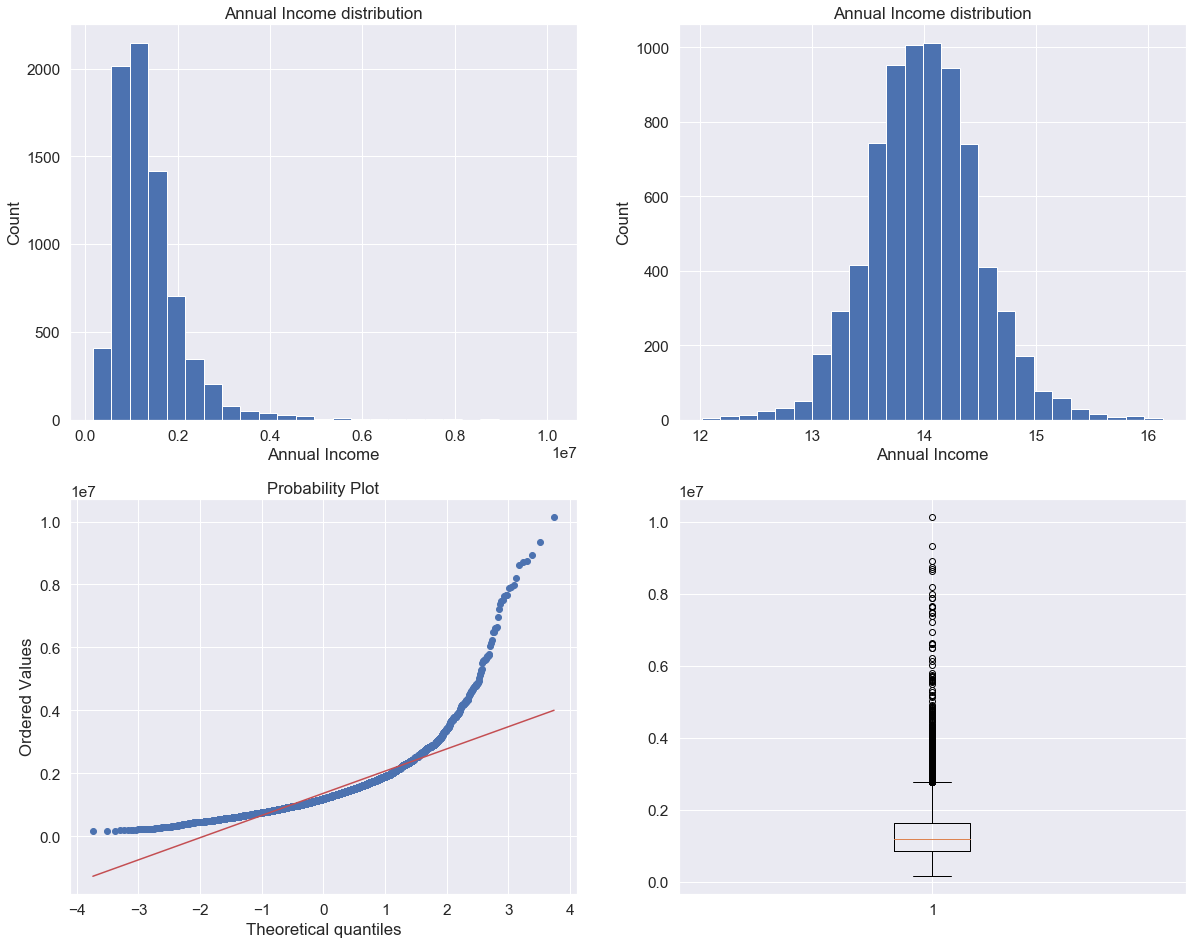

In [171]:
func_2(df,'Annual Income')

MannwhitneyuResult(statistic=5137106.0, pvalue=2.5016945353115004e-11)


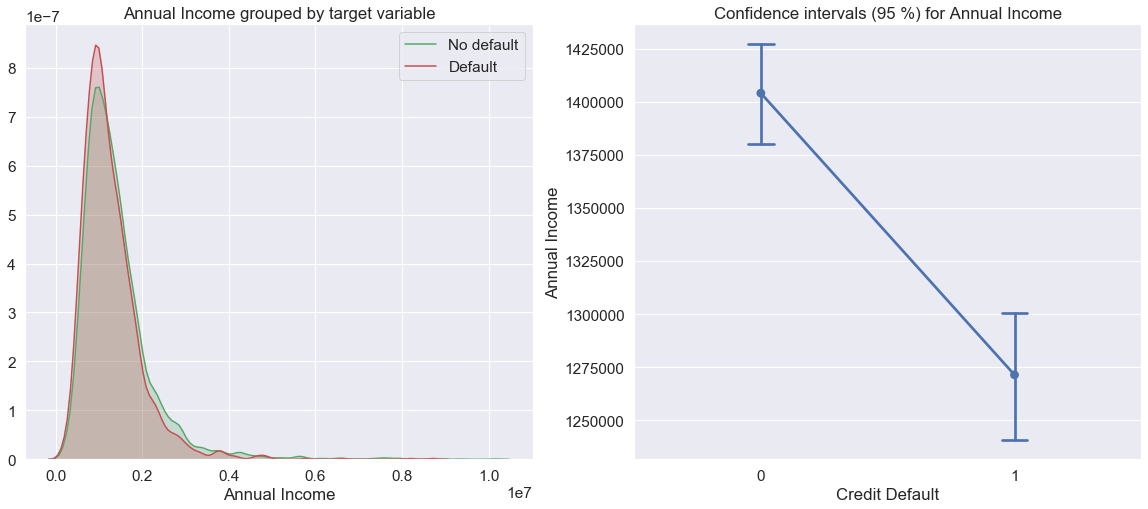

In [172]:
func_3(df,'Annual Income')

In [173]:
stat_ind(df,'Annual Income')

мат ожидание:  1366704.1568
среднее квадратичное отклонение:  796447.432828717
смещенная оценка дисперсии:  634328513259.4537
несмещенная оценка дисперсии:  634413101673.0101
медиана:  1194926.5
мода: 
 0     969475.0
1    1043651.0
2    1058376.0
3    1161660.0
4    1338113.0
dtype: float64


In [174]:
stat_ind(df_test,'Annual Income')

мат ожидание:  1365847.6584
среднее квадратичное отклонение:  852628.9099699948
смещенная оценка дисперсии:  726976058116.6215
несмещенная оценка дисперсии:  727266964902.5825
медиана:  1204625.5
мода: 
 0    1025145.0
1    1214993.0
2    1237109.0
3    1328803.0
dtype: float64


(0.694306492805481, 0.0)
(0.9889214634895325, 5.237632701680928e-13)
106533.0


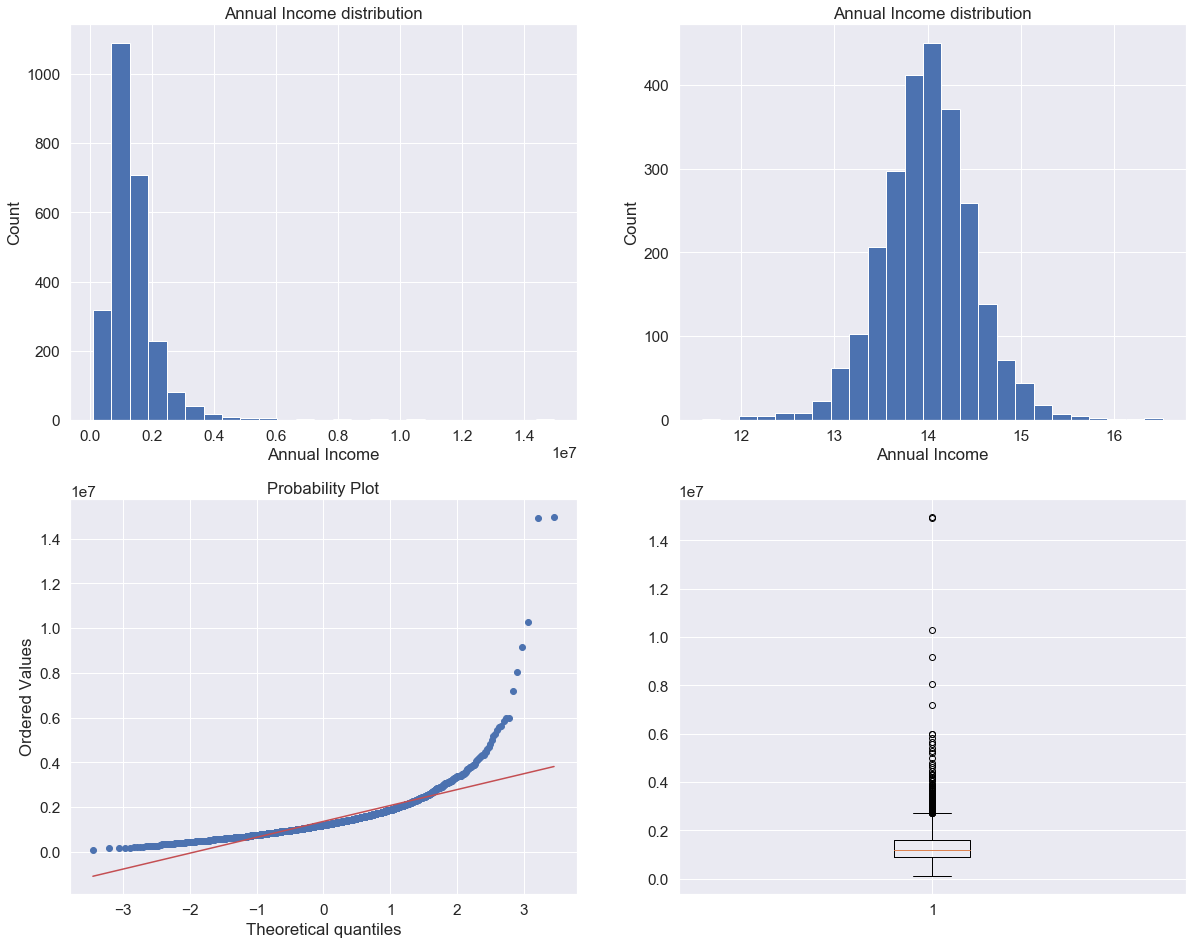

In [175]:
func_2(df_test,'Annual Income')

In [176]:
df['Annual Income gr']=0
df.loc[df['Annual Income']<100000, 'Annual Income gr'] = 0
df.loc[(df['Annual Income']>=100000)&(df['Annual Income']<200000), 'Annual Income gr'] = 1
df.loc[(df['Annual Income']>=200000), 'Annual Income gr'] = 2

df['Annual Income log'] = np.log(df['Annual Income'])

In [177]:
df_test['Annual Income gr']=0
df_test.loc[df_test['Annual Income']<100000, 'Annual Income gr'] = 0
df_test.loc[(df_test['Annual Income']>=100000)&(df_test['Annual Income']<200000), 'Annual Income gr'] = 1
df_test.loc[(df_test['Annual Income']>=200000), 'Annual Income gr'] = 2

df_test['Annual Income log'] = np.log(df_test['Annual Income'])

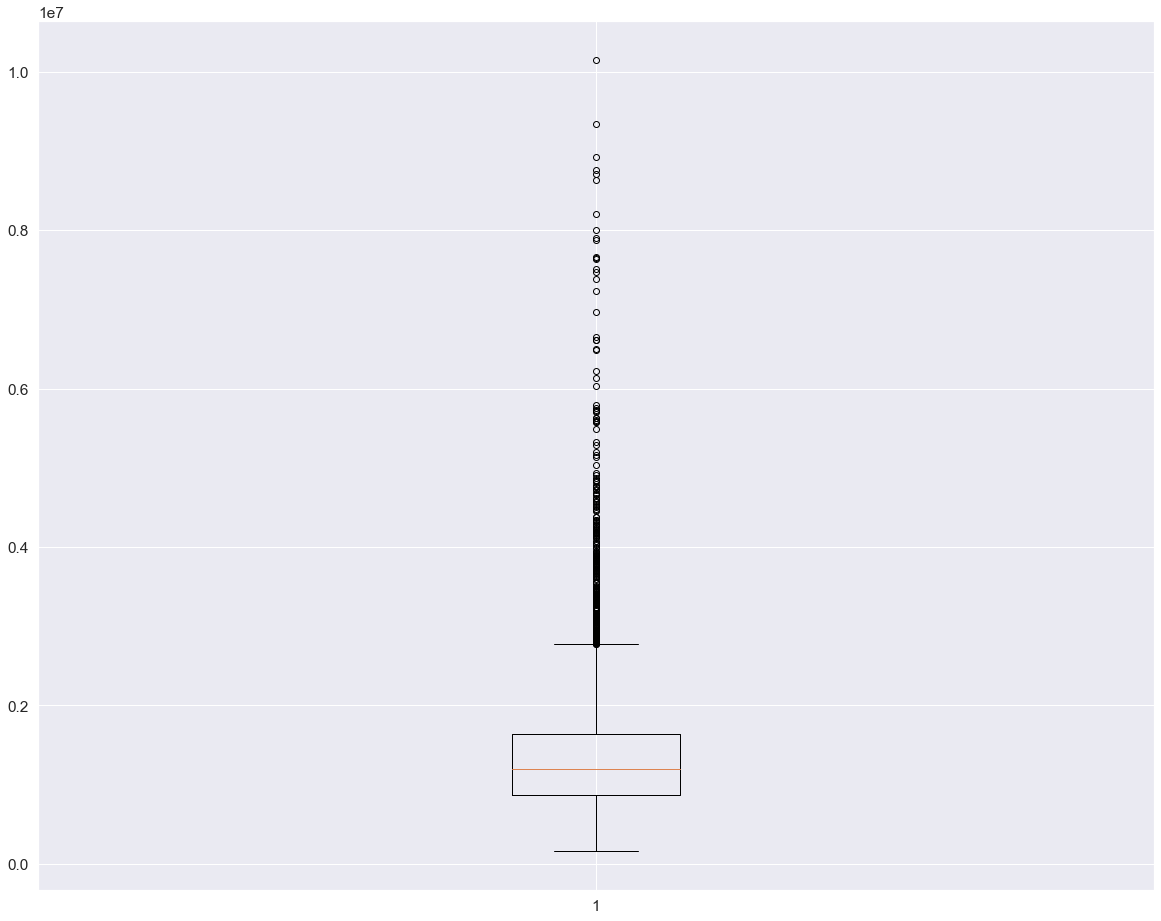

In [178]:
# посмотрим на выбросы
plt.figure(figsize=(20, 16))
plt.boxplot(df['Annual Income'])
plt.show()

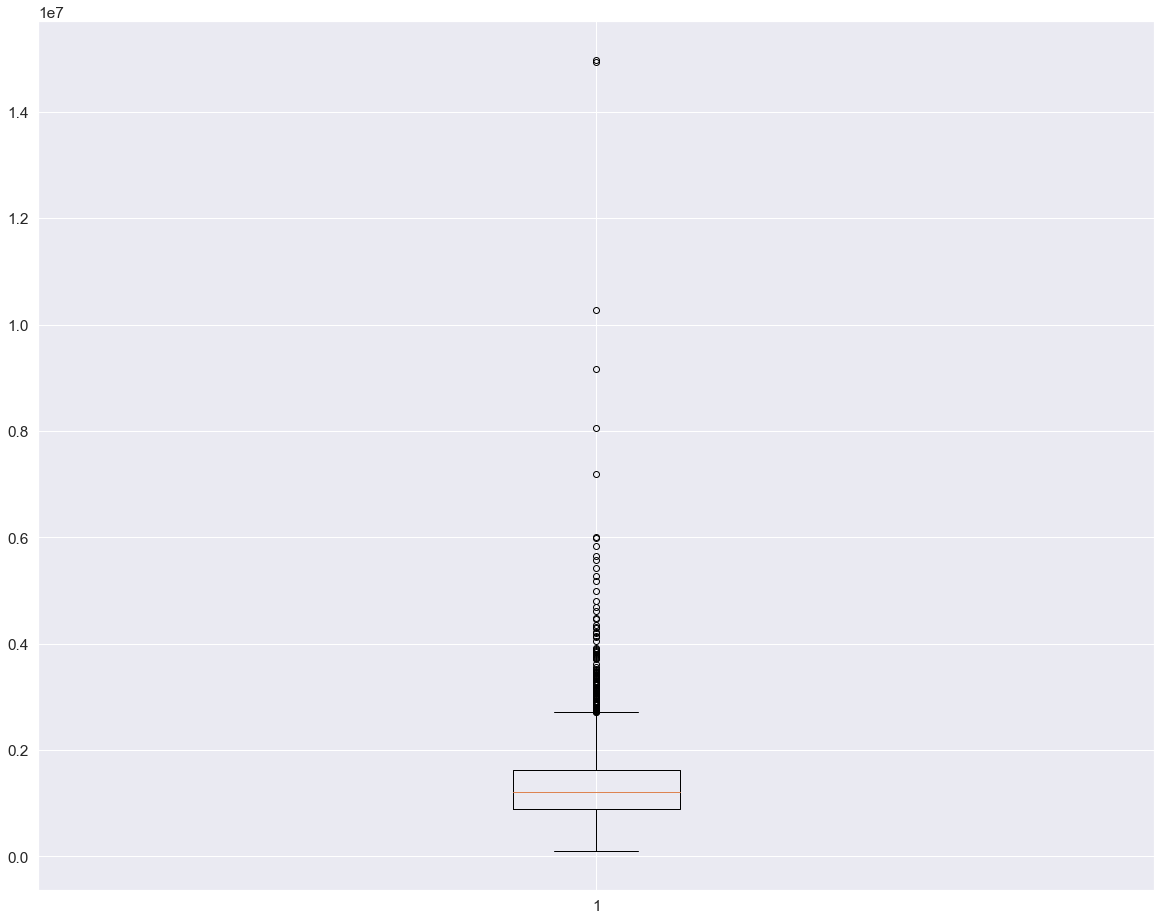

In [179]:
# посмотрим на выбросы
plt.figure(figsize=(20, 16))
plt.boxplot(df_test['Annual Income'])
plt.show()

In [180]:
three_sigma(df, 'Annual Income'),three_sigma(df_test, 'Annual Income')

-1022638.1416861513 3756046.4552861513
-1192039.0715099843 3923734.3883099845


(None, None)

In [181]:
df['Annual Income out'] = df['Annual Income']
df.loc[df['Annual Income out']>3756885, 'Annual Income out'] = np.nan

df_test['Annual Income out'] = df_test['Annual Income']
df_test.loc[df_test['Annual Income out']>3756885, 'Annual Income out'] = np.nan

In [182]:
input_val(df, 'Annual Income', ' out ')
input_val(df_test, 'Annual Income', ' out ')

In [183]:
df.loc[df['Annual Income out'].isnull()].shape

(129, 90)

In [184]:
COLUMNS = [
            'Monthly Debt out',
            'Current Loan Amount out',
            'Monthly Debt gr',
            'Current Credit Balance out',
            'Maximum Open Credit out',
            'Years of Credit History',
            'Home Ownership int',
            'Years in current job int gr 1'
]


rec(df, 'Annual Income', ' out', columns)

185333656128.6871 0.5060708538401508


In [185]:
rec(df_test, 'Annual Income', ' out', columns)

174782543975.13345 0.508629160367987


In [186]:
df['Annual Income out log'] = np.log(df['Annual Income out'])
df['Annual Income out 1 log'] = np.log(df['Annual Income out 1'])
df['Annual Income out 2 log'] = np.log(df['Annual Income out 2'])
df['Annual Income out 3 log'] = np.log(df['Annual Income out 3'])

In [187]:
df_test['Annual Income out log'] = np.log(df_test['Annual Income out'])
df_test['Annual Income out 1 log'] = np.log(df_test['Annual Income out 1'])
df_test['Annual Income out 2 log'] = np.log(df_test['Annual Income out 2'])
df_test['Annual Income out 3 log'] = np.log(df_test['Annual Income out 3'])

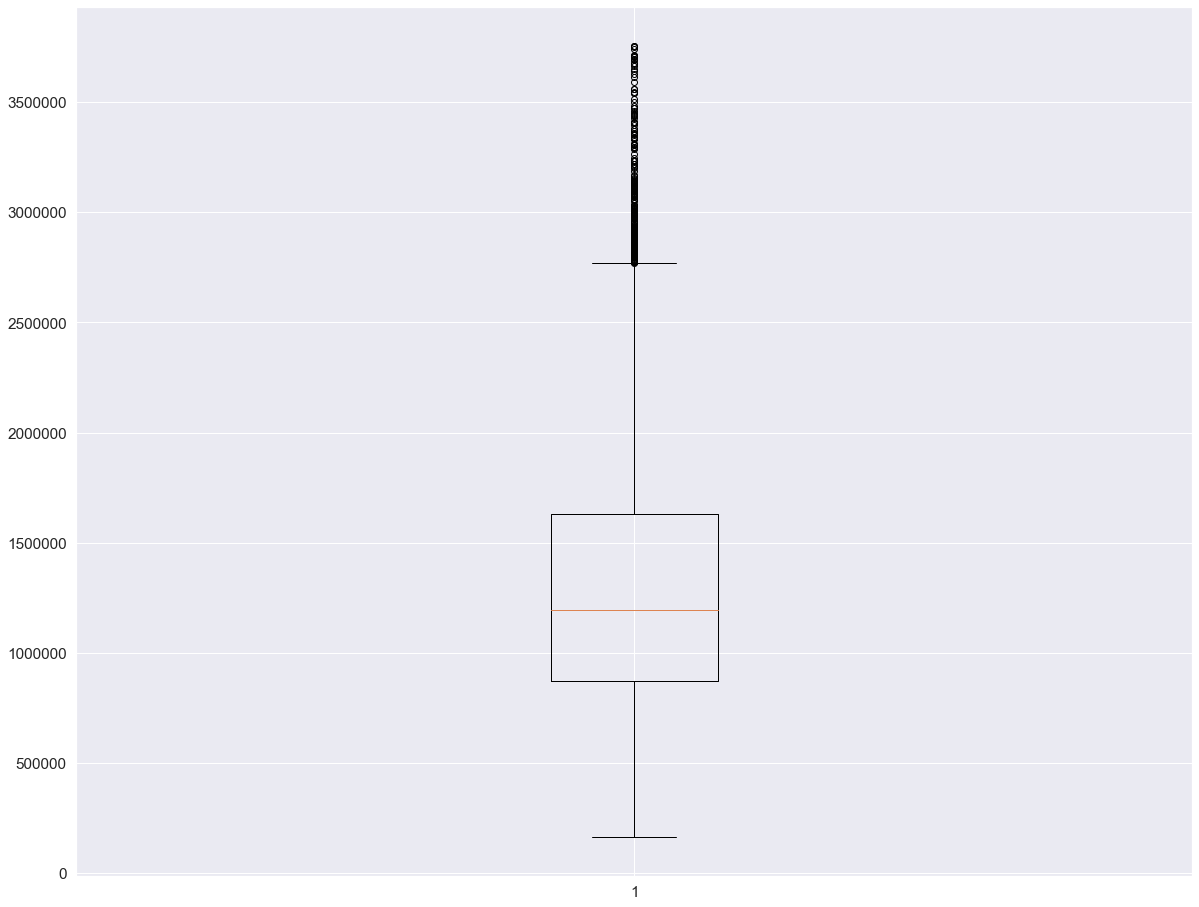

In [188]:
# посмотрим на выбросы
plt.figure(figsize=(20, 16))
plt.boxplot(df['Annual Income out'])
plt.show()

(0.9328357577323914, 0.0)
(0.994999349117279, 1.7263824249078388e-15)
164597.0


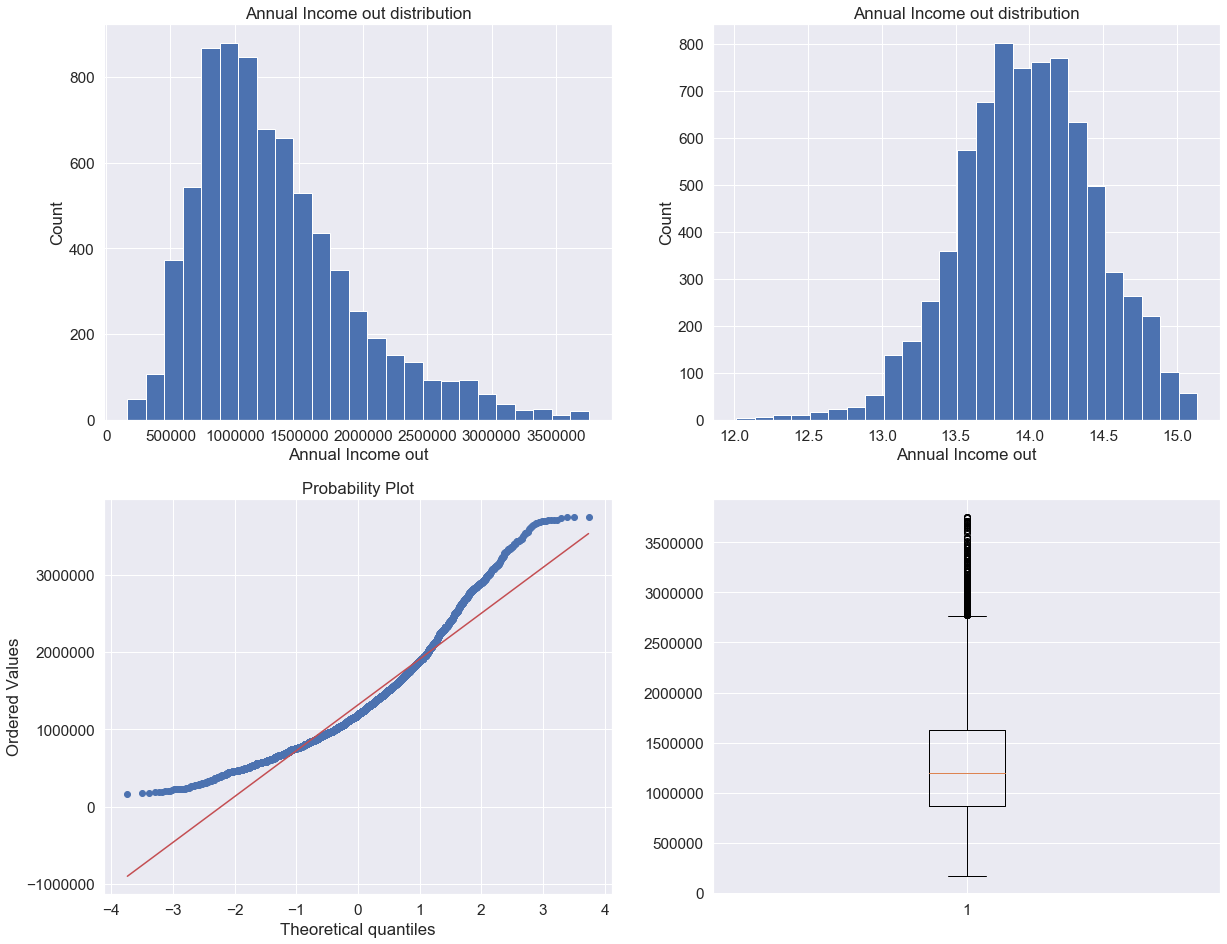

In [189]:
func_2(df,'Annual Income out')

### Дополнительные признаки

In [190]:
df['Current Loan Amount / Annual Income out'] = df['Current Loan Amount out']/df['Annual Income out']
df['Current Loan Amount / Annual Income'] = df['Current Loan Amount out']/df['Annual Income']
df['Current Loan Amount / Annual Income log'] = df['Current Loan Amount out log']/df['Annual Income out log']
df.corr().loc['Credit Default', 'Current Loan Amount / Annual Income out'],df.corr().loc['Credit Default', 'Current Loan Amount / Annual Income']

(0.14129435508102098, 0.1448809220964342)

In [191]:
df_test['Current Loan Amount / Annual Income out'] = df_test['Current Loan Amount out']/df_test['Annual Income out']
df_test['Current Loan Amount / Annual Income'] = df_test['Current Loan Amount out']/df_test['Annual Income']
df_test['Current Loan Amount / Annual Income log'] = df_test['Current Loan Amount out log']/df_test['Annual Income out log']

In [192]:
df['Annual Income out / Current Loan Amount'] = df['Annual Income out'] / df['Current Loan Amount out']*df['Current Credit Balance']
df.corr().loc['Credit Default', 'Annual Income out / Current Loan Amount']

-0.050996558796458966

In [193]:
df_test['Annual Income out / Current Loan Amount'] = df_test['Annual Income out'] / df_test['Current Loan Amount out']*df_test['Current Credit Balance']


In [194]:
df['Current Loan Amount / Monthly Debt * Annual Income out'] = df['Current Loan Amount out']/df['Monthly Debt out']*df['Annual Income out']
df['Current Loan Amount / Monthly Debt * Annual Income'] = df['Current Loan Amount out']/df['Monthly Debt out']*df['Annual Income']

df.corr().loc['Credit Default', 'Current Loan Amount / Monthly Debt * Annual Income out'],df.corr().loc['Credit Default', 'Current Loan Amount / Monthly Debt * Annual Income']

(-0.011540497070768572, -0.01289952965349051)

In [195]:
df_test['Current Loan Amount / Monthly Debt * Annual Income out'] = df_test['Current Loan Amount out']/df_test['Monthly Debt out']*df_test['Annual Income out']
df_test['Current Loan Amount / Monthly Debt * Annual Income'] = df_test['Current Loan Amount out']/df_test['Monthly Debt out']*df_test['Annual Income']


In [196]:
df['Current Credit Balance / Annual Income'] = df['Current Credit Balance out']/df['Annual Income out']
df.corr().loc['Credit Default', 'Current Credit Balance / Annual Income']

0.026146572353923495

In [197]:
df_test['Current Credit Balance / Annual Income'] = df_test['Current Credit Balance out']/df_test['Annual Income out']

In [198]:
df['Current Loan Amount / Monthly Debt'] = df['Current Loan Amount out']/df['Monthly Debt out']
df.corr().loc['Credit Default', 'Current Loan Amount / Monthly Debt']

-0.005958780061377977

In [199]:
df_test['Current Loan Amount / Monthly Debt'] = df_test['Current Loan Amount out']/df_test['Monthly Debt out']

In [200]:
# df['Number of Credit Problems gr + Months since last delinquent + Bankruptcies gr'] = df['']/df['']
df['Number of Credit Problems gr + Bankruptcies gr'] = df['Number of Credit Problems gr']+df['Bankruptcies gr']
df.corr().loc['Credit Default', 'Number of Credit Problems gr + Bankruptcies gr']

0.0027059918002966484

In [201]:
df_test['Number of Credit Problems gr + Bankruptcies gr'] = df_test['Number of Credit Problems gr']+df_test['Bankruptcies gr']

In [202]:
df['Number of Credit Problems gr | Bankruptcies gr'] = df['Number of Credit Problems gr']|df['Bankruptcies gr']
df.corr().loc['Credit Default', 'Number of Credit Problems gr | Bankruptcies gr']

0.006484167764710076

In [203]:
df_test['Number of Credit Problems gr | Bankruptcies gr'] = df_test['Number of Credit Problems gr']|df_test['Bankruptcies gr']

In [204]:
df['Current Loan Amount / Current Credit Balance'] = df['Current Loan Amount']/df['Current Credit Balance']
df.corr().loc['Credit Default', 'Current Loan Amount / Current Credit Balance']

-0.014664974695542095

In [205]:
df_test['Current Loan Amount / Current Credit Balance'] = df_test['Current Loan Amount']/df_test['Current Credit Balance']

In [206]:
df['Monthly Debt * 12 / Annual Income'] = (df['Monthly Debt out']*12)/df['Annual Income out']
df.corr().loc['Credit Default', 'Monthly Debt * 12 / Annual Income']

0.0989433754900795

In [207]:
df_test['Monthly Debt * 12 / Annual Income'] = (df_test['Monthly Debt out']*12)/df_test['Annual Income out']

### Credit Score 

In [208]:
stat_ind(df,'Credit Score')

мат ожидание:  1151.0874978966851
среднее квадратичное отклонение:  1604.3164255909787
смещенная оценка дисперсии:  2573831.1934210146
несмещенная оценка дисперсии:  2574264.352490927
медиана:  731.0
мода: 
 0    740.0
dtype: float64


(nan, 1.0)
(nan, 1.0)
585.0


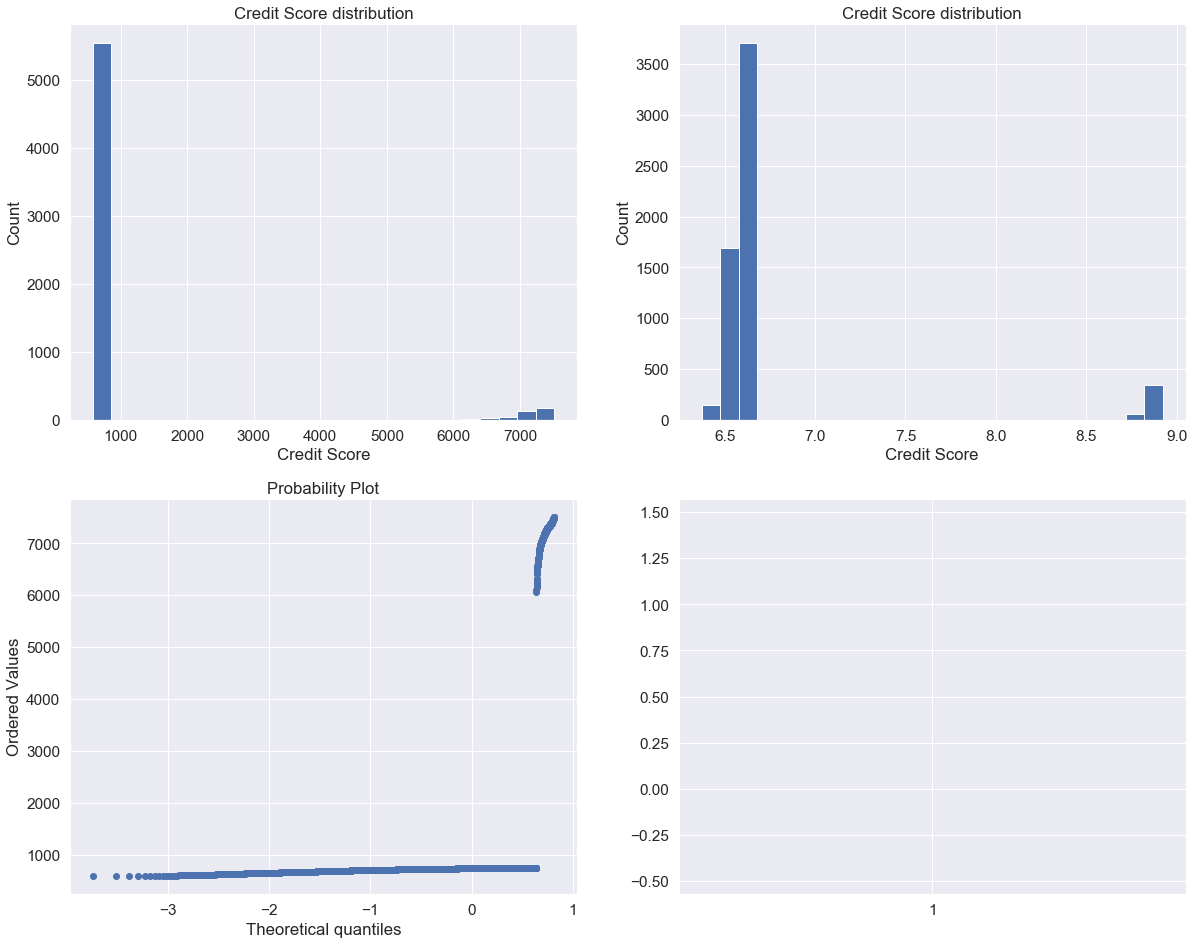

In [209]:
func_2(df,'Credit Score')

MannwhitneyuResult(statistic=3288656.0, pvalue=0.0025624699105573153)


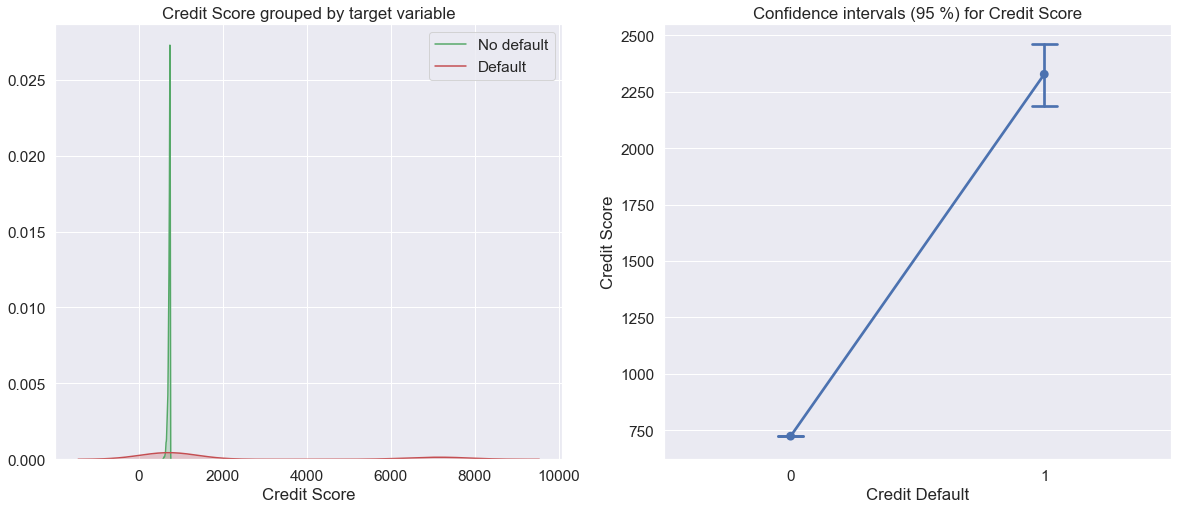

In [210]:
func_3(df,'Credit Score')

(nan, 1.0)
(nan, 1.0)
585.0


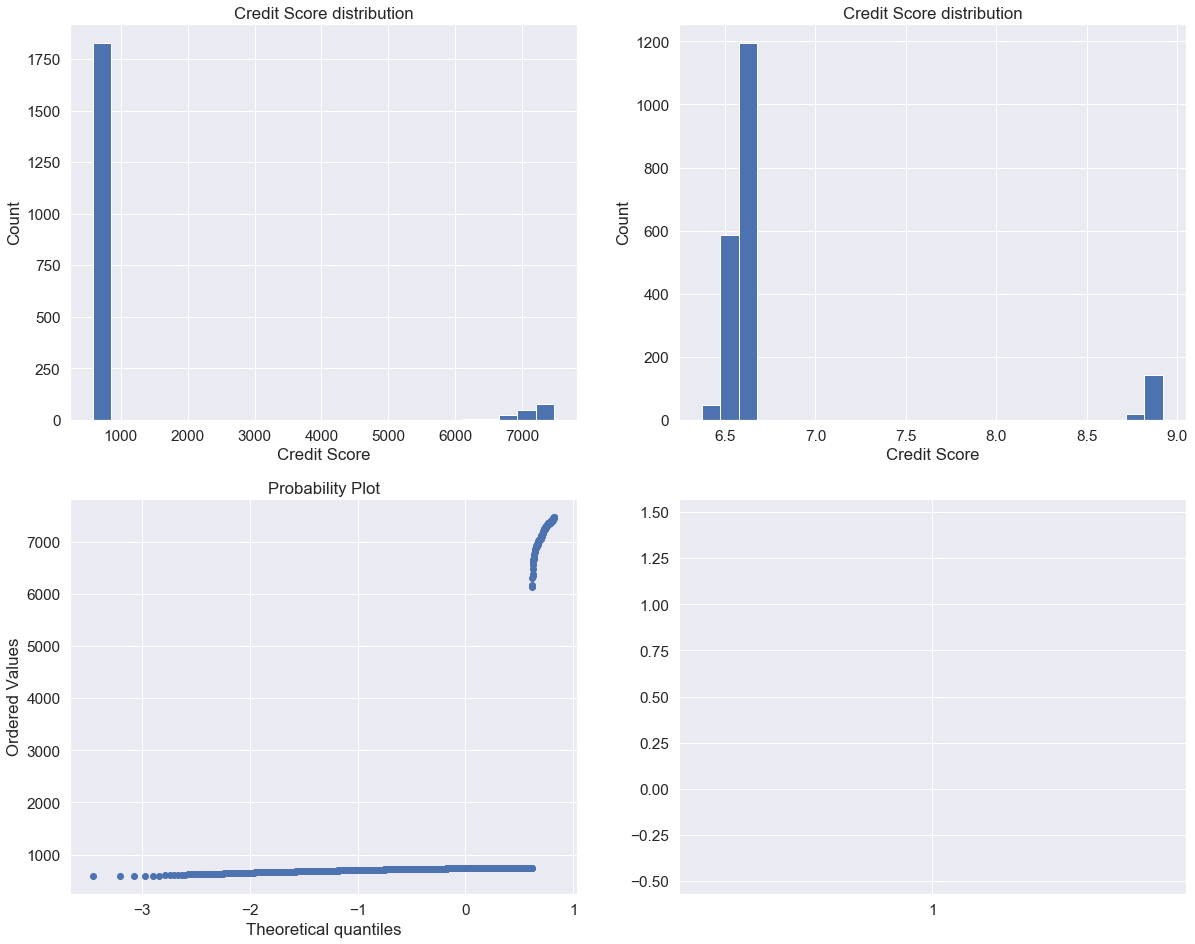

In [211]:
func_2(df_test,'Credit Score')

In [212]:
df.loc[df['Credit Score']>1000, 'Credit Score'].unique()

array([6470., 7440., 7010., 7320., 7390., 7140., 7470., 7370., 7040.,
       7430., 6940., 7170., 7300., 7500., 6790., 7310., 7450., 7100.,
       7250., 7350., 7220., 7460., 7060., 6110., 7050., 7380., 7120.,
       6840., 6950., 7180., 7080., 6900., 6320., 6990., 6760., 7130.,
       7270., 7030., 6980., 7340., 7190., 7240., 6280., 7490., 7400.,
       7480., 6210., 6580., 7110., 7330., 6710., 6910., 6890., 6860.,
       6520., 6810., 7260., 6620., 7230., 7360., 7070., 7510., 6230.,
       6490., 7280., 6780., 7420., 7160., 6160., 6740., 7410., 6220.,
       7020., 7200., 6590., 6960., 7290., 7150., 6690., 6480., 6630.,
       6830., 6680., 7090., 6930., 6600., 6820., 6570., 6560., 7210.,
       6500., 7000., 6650., 6180., 6450., 6920., 6610., 6150., 6850.,
       6800., 6970., 6270., 6670., 6640., 6170., 6750., 6880., 6770.,
       6410., 6060.])

In [213]:
df.loc[df['Credit Score']<1000, 'Credit Score'].unique()

array([749., 737., 742., 694., 719., 745., 705., 706., 728., 748., 727.,
       644., 695., 712., 697., 738., 720., 734., 740., 708., 726., 722.,
       750., 670., 721., 729., 723., 716., 744., 707., 739., 714., 701.,
       735., 741., 747., 743., 725., 718., 674., 746., 704., 673., 653.,
       751., 711., 617., 730., 724., 624., 736., 667., 679., 732., 693.,
       668., 731., 661., 709., 717., 678., 675., 700., 645., 683., 733.,
       703., 660., 715., 654., 662., 687., 710., 664., 688., 698., 702.,
       643., 659., 666., 681., 692., 713., 627., 689., 696., 699., 672.,
       671., 651., 685., 639., 669., 634., 658., 665., 642., 585., 691.,
       682., 593., 686., 648., 657., 631., 680., 611., 649., 625., 676.,
       640., 635., 619., 636., 608., 690., 684., 650., 663., 588., 633.,
       677., 601., 656., 647., 614., 613., 655., 628., 626., 632., 646.,
       597., 621., 609., 652., 637., 589., 590., 606., 638., 594., 599.,
       616., 615., 629., 610., 598., 630., 604., 59

In [214]:
df.loc[df['Credit Score']>1000, 'Credit Score'].unique()

array([6470., 7440., 7010., 7320., 7390., 7140., 7470., 7370., 7040.,
       7430., 6940., 7170., 7300., 7500., 6790., 7310., 7450., 7100.,
       7250., 7350., 7220., 7460., 7060., 6110., 7050., 7380., 7120.,
       6840., 6950., 7180., 7080., 6900., 6320., 6990., 6760., 7130.,
       7270., 7030., 6980., 7340., 7190., 7240., 6280., 7490., 7400.,
       7480., 6210., 6580., 7110., 7330., 6710., 6910., 6890., 6860.,
       6520., 6810., 7260., 6620., 7230., 7360., 7070., 7510., 6230.,
       6490., 7280., 6780., 7420., 7160., 6160., 6740., 7410., 6220.,
       7020., 7200., 6590., 6960., 7290., 7150., 6690., 6480., 6630.,
       6830., 6680., 7090., 6930., 6600., 6820., 6570., 6560., 7210.,
       6500., 7000., 6650., 6180., 6450., 6920., 6610., 6150., 6850.,
       6800., 6970., 6270., 6670., 6640., 6170., 6750., 6880., 6770.,
       6410., 6060.])

In [215]:
df_test.loc[df_test['Credit Score']<1000, 'Credit Score'].unique()

array([699., 739., 706., 679., 685., 701., 745., 737., 696., 720., 700.,
       711., 729., 749., 738., 728., 733., 751., 724., 734., 735., 743.,
       746., 727., 715., 747., 676., 691., 707., 730., 725., 731., 741.,
       717., 632., 721., 744., 750., 667., 740., 716., 689., 732., 714.,
       692., 698., 672., 660., 688., 705., 702., 723., 697., 664., 742.,
       718., 722., 693., 748., 675., 686., 712., 708., 684., 662., 719.,
       695., 710., 663., 704., 630., 694., 626., 677., 674., 736., 621.,
       634., 683., 653., 673., 655., 726., 637., 657., 645., 703., 680.,
       633., 670., 614., 603., 587., 659., 713., 652., 617., 681., 690.,
       687., 709., 622., 609., 678., 682., 671., 635., 647., 669., 644.,
       654., 665., 648., 668., 586., 646., 619., 658., 613., 641., 666.,
       640., 650., 642., 661., 598., 616., 656., 585., 588., 629., 625.,
       649., 639., 631.])

In [216]:
df['Credit Score out 100'] = df['Credit Score']
df.loc[df['Credit Score out 100']>1000, 'Credit Score out 100'] = df['Credit Score out 100']/10

df['Credit Score out 10'] = np.fix(df['Credit Score out 100']/100)

df['Credit Score out 1000'] = df['Credit Score']
df.loc[df['Credit Score out 1000']<1000, 'Credit Score out 1000'] = df['Credit Score out 1000']*10

In [217]:
df_test['Credit Score out 100'] = df_test['Credit Score']
df_test.loc[df_test['Credit Score out 100']>1000, 'Credit Score out 100'] = df_test['Credit Score out 100']/10

df_test['Credit Score out 10'] = np.fix(df_test['Credit Score out 100']/100)

df_test['Credit Score out 1000'] = df_test['Credit Score']
df_test.loc[df_test['Credit Score out 1000']<1000, 'Credit Score out 1000'] = df_test['Credit Score out 1000']*10

In [218]:
input_val(df, 'Credit Score out 100', ' ')
input_val(df_test, 'Credit Score out 100', ' ')

In [219]:
input_val(df, 'Credit Score out 10', ' ')
input_val(df_test, 'Credit Score out 10', ' ')

In [220]:
input_val(df, 'Credit Score out 1000', ' ')
input_val(df_test, 'Credit Score out 1000', ' ')

In [221]:
# np.abs(df.corr()['Credit Score out 10 cat']).sort_values().tail(60)
df['Credit Score out 100 cat'] = df['Credit Score']
df.loc[df['Credit Score out 100 cat']>1000, 'Credit Score out 100 cat'] = df['Credit Score out 100 cat']/10

df['Credit Score out 10 cat'] = np.fix(df['Credit Score out 100 cat']/100)

In [222]:
COLUMNS = [
            'Current Loan Amount out',
            'Term int',
            'Monthly Debt out',
            'Monthly Debt gr',
            'Monthly Debt * 12 / Annual Income'
]

sample = df.loc[df['Credit Score out 10 cat'].notnull()]
features=sample[COLUMNS]
target=sample['Credit Score out 10 cat']

X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=5)

model_catb = catb.CatBoostClassifier(l2_leaf_reg=5, n_estimators=500, max_depth=3, silent=True, random_state=21)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

df.loc[df['Credit Score out 10 cat'].isnull(),'Credit Score out 10 cat'] = model_catb.predict(df.loc[df['Credit Score out 10 cat'].isnull(),COLUMNS])

In [223]:
# COLUMNS = [
#             'Current Loan Amount out',
#             'Term int',
#             'Monthly Debt out',
#             'Monthly Debt gr',
#             'Monthly Debt * 12 / Annual Income'
# ]

# sample = df.loc[df['Credit Score out 100 cat'].notnull()]
# features=sample[COLUMNS]
# target=sample['Credit Score out 100 cat']

# # model3=RF(n_estimators=150,max_depth=100,min_samples_leaf=5)
# X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.3,random_state=5)

# model_catb = catb.CatBoostClassifier(l2_leaf_reg=5, n_estimators=500, max_depth=3, silent=True, random_state=21)
# model_catb.fit(X_train, y_train)

# y_train_pred = model_catb.predict(X_train)
# y_test_pred = model_catb.predict(X_test)

# df.loc[df['Credit Score out 100 cat'].isnull(),'Credit Score out 100 cat'] = model_catb.predict(df.loc[df['Credit Score out 100 cat'].isnull(),COLUMNS])

In [224]:
columns = [
            'Current Loan Amount out',
            'Term int',
            'Monthly Debt out',
            'Monthly Debt gr',
            'Monthly Debt * 12 / Annual Income'
            
]

rec(df, 'Credit Score out 100', '', columns)

611.0811884986948 0.18127850953332025


In [225]:
rec(df_test, 'Credit Score out 100', '', columns)

593.4260186522564 0.20042624899623596


In [226]:
rec(df, 'Credit Score out 10', '', columns)

0.139192236488376 0.11634827324111219


In [227]:
rec(df_test, 'Credit Score out 10', '', columns)

0.1426343170500452 0.12628636213581812


In [228]:
rec(df, 'Credit Score out 1000', '', columns)

61063.08823091009 0.18188182601834635


In [229]:
rec(df_test, 'Credit Score out 1000', '', columns)

59503.12212611663 0.19826342190273916


In [230]:
df['Credit Score out 10 log'] = np.log(df['Credit Score out 10'])
df['Credit Score out 100 log'] = np.log(df['Credit Score out 100'])
df['Credit Score out 1000 log'] = np.log(df['Credit Score out 1000'])

df['Credit Score out 10 1 log'] = np.log(df['Credit Score out 10 1'])
df['Credit Score out 10 2 log'] = np.log(df['Credit Score out 10 2'])
df['Credit Score out 10 3 log'] = np.log(df['Credit Score out 10 3'])

df['Credit Score out 100 1 log'] = np.log(df['Credit Score out 100 1'])
df['Credit Score out 100 2 log'] = np.log(df['Credit Score out 100 2'])
df['Credit Score out 100 3 log'] = np.log(df['Credit Score out 100 3'])

df['Credit Score out 1000 1 log'] = np.log(df['Credit Score out 1000 1'])
df['Credit Score out 1000 2 log'] = np.log(df['Credit Score out 1000 2'])
df['Credit Score out 1000 3 log'] = np.log(df['Credit Score out 1000 3'])

In [231]:
df_test['Credit Score out 10 log'] = np.log(df_test['Credit Score out 10'])
df_test['Credit Score out 100 log'] = np.log(df_test['Credit Score out 100'])
df_test['Credit Score out 1000 log'] = np.log(df_test['Credit Score out 1000'])

df_test['Credit Score out 10 1 log'] = np.log(df_test['Credit Score out 10 1'])
df_test['Credit Score out 10 2 log'] = np.log(df_test['Credit Score out 10 2'])
df_test['Credit Score out 10 3 log'] = np.log(df_test['Credit Score out 10 3'])

df_test['Credit Score out 100 1 log'] = np.log(df_test['Credit Score out 100 1'])
df_test['Credit Score out 100 2 log'] = np.log(df_test['Credit Score out 100 2'])
df_test['Credit Score out 100 3 log'] = np.log(df_test['Credit Score out 100 3'])

df_test['Credit Score out 1000 1 log'] = np.log(df_test['Credit Score out 1000 1'])
df_test['Credit Score out 1000 2 log'] = np.log(df_test['Credit Score out 1000 2'])
df_test['Credit Score out 1000 3 log'] = np.log(df_test['Credit Score out 1000 3'])

In [232]:
# df['Credit Score out 10 cat log'] = np.log(df['Credit Score out 10 cat'])
# df['Credit Score out 100 cat log'] = np.log(df['Credit Score out 100 cat'])

### Произвольные признаки

In [233]:
NUM_FEATURE_NAMES = [
    'Annual Income out', 
    'Monthly Debt out',       
    'Annual Income',
    'Maximum Open Credit out',       
    'Current Credit Balance',
    'Current Loan Amount out',     
    'Current Loan Amount / Annual Income',
    'Current Loan Amount / Annual Income out'
    
]


In [234]:
poly_features = df[NUM_FEATURE_NAMES]
poly_target = df['Credit Default']

from sklearn.preprocessing import PolynomialFeatures
                                  
poly_transformer = PolynomialFeatures(degree = 3)

poly_transformer.fit(poly_features)

poly_features = poly_transformer.transform(poly_features)
print('Формат полиномиальных признаков: ', poly_features.shape)

Формат полиномиальных признаков:  (7500, 165)


In [235]:
poly_transformer.get_feature_names(input_features = NUM_FEATURE_NAMES)[:10]

['1',
 'Annual Income out',
 'Monthly Debt out',
 'Annual Income',
 'Maximum Open Credit out',
 'Current Credit Balance',
 'Current Loan Amount out',
 'Current Loan Amount / Annual Income',
 'Current Loan Amount / Annual Income out',
 'Annual Income out^2']

In [236]:
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(NUM_FEATURE_NAMES))
poly_features['Credit Default'] = poly_target

In [237]:
poly_corrs = np.abs(poly_features.corr()['Credit Default']).sort_values()

#print(poly_corrs.head(10))
print(poly_corrs.tail(60))

Monthly Debt out Current Loan Amount out^2                                                             0.052400
Annual Income out Annual Income^2                                                                      0.054573
Annual Income out Annual Income Maximum Open Credit out                                                0.055035
Annual Income^2                                                                                        0.056659
Annual Income out Monthly Debt out Current Loan Amount / Annual Income                                 0.056873
Monthly Debt out^2 Current Loan Amount / Annual Income out                                             0.057325
Annual Income out^2 Maximum Open Credit out                                                            0.059103
Annual Income out^3                                                                                    0.059326
Annual Income Maximum Open Credit out                                                                  0

# Модель 

In [238]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))
    
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [239]:
def get_classification_report_beta(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN')
    clf_rep = precision_recall_fscore_support(y_train_true, y_train_pred, beta=1.35)
    out_dict = {
                 "precision" :clf_rep[0].round(2),
                 "recall" : clf_rep[1].round(2),
                 "f1-score" : clf_rep[2].round(2),
                 "support" : clf_rep[3]
                }
    out_df = pd.DataFrame(out_dict, index = [0,1])
    avg_tot = (out_df.apply(lambda x: round(x.mean(), 2) if x.name!="support" else  round(x.sum(), 2)).to_frame().T)
    avg_tot.index = ["avg/total"]
    out_df = out_df.append(avg_tot)
    print(out_df)
    
    print('\n\nTEST')
    clf_rep = precision_recall_fscore_support(y_test_true, y_test_pred, beta=1.35)
    out_dict = {
                 "precision" :clf_rep[0].round(2),
                 "recall" : clf_rep[1].round(2),
                 "f1-score" : clf_rep[2].round(2),
                 "support" : clf_rep[3]
                }
    out_df = pd.DataFrame(out_dict, index = [0,1])
    avg_tot = (out_df.apply(lambda x: round(x.mean(), 2) if x.name!="support" else  round(x.sum(), 2)).to_frame().T)
    avg_tot.index = ["avg/total"]
    out_df = out_df.append(avg_tot)
    print(out_df)

In [240]:
get_corr(df,'Credit Default')

Annual Income gr                                          0.000270
Current Credit Balance out log                            0.001020
Bankruptcies gr                                           0.001621
Bankruptcies                                              0.001640
Current Credit Balance out 1 log                          0.002529
Current Credit Balance out 2 log                          0.002529
Current Credit Balance out 3 log                          0.002529
Months since last delinquent                              0.002598
Number of Credit Problems gr + Bankruptcies gr            0.002706
Months since last delinquent gr 2                         0.004839
Months since last delinquent gr 3                         0.004962
Current Loan Amount / Monthly Debt                        0.005959
Number of Credit Problems gr                              0.006484
Number of Credit Problems gr | Bankruptcies gr            0.006484
Years in current job int gr 1                             0.00

In [241]:
df_base = df.copy()
df_base_test = df_test.copy()

TARGET_NAME = 'Credit Default'
BASE_FEATURE_NAMES = df_base.columns.drop(TARGET_NAME).tolist()

In [242]:
NUM_FEATURE_NAMES = [

    'Annual Income out',      
    'Annual Income out log',  
    'Annual Income nan 2',       
    'Annual Income nan 1',       
    'Annual Income nan 3', 
    'Annual Income log' , 

    'Current Loan Amount out 3 log',

    'Monthly Debt out',
    

    'Maximum Open Credit out log',
    
    'Current Loan Amount / Annual Income',
    
    'Annual Income',
    'Current Loan Amount / Monthly Debt'
]

#     'Monthly Debt out 1',  
#     'Monthly Debt out 2',  
#     'Monthly Debt out 3',
    
#     'Annual Income out 3', 
#     'Annual Income out 3 log', 
#     'Annual Income out 1', 
#     'Annual Income out 1 log',     
#     'Annual Income out 2',   
#     'Annual Income out 2 log',
# 'Monthly Debt * 12 / Annual Income',

#     'Maximum Open Credit out 3 log', 
#     'Maximum Open Credit out 2 log',  
#     'Maximum Open Credit out 1 log', 
#     'Credit Score out 10 2 log',      
#     'Credit Score out 100 3 log',      
#     'Credit Score out 1000 3 log',  
#     'Credit Score out 100 1 log',   
#     'Credit Score out 1000 1 log',  
#     'Credit Score out 1000 2 log',
#     'Credit Score out 100 2 log',
#     'Credit Score out 10 1 log',      
#     'Credit Score out 10 3 log', 
    
CAT_FEATURE_NAMES = [
    'Number of Credit Problems gr | Bankruptcies gr',

    'Term',
    'Home Ownership gr 4',
    'Home Ownership int',

    'Maximum Open Credit out',       
  
    'Current Loan Amount out',     
    
    'Credit Score out 10 log',      
    'Credit Score out 100 log',
    'Credit Score out 1000 log',  
    
    'Credit Score out 10',      
    'Credit Score out 100',
    'Credit Score out 1000']

#     'Term int',
#     'Current Loan Amount out 1',       
#     'Current Loan Amount out 3' ,
#     'Current Loan Amount out 2',  

#     'Maximum Open Credit out 3', 
#     'Maximum Open Credit out 1',    
#     'Maximum Open Credit out 2',  
#     'Credit Score out 10 1',      
#     'Credit Score out 10 3', 
#     'Credit Score out 10 2',  
#     'Credit Score out 100 3',    
#     'Credit Score out 1000 3',    
#     'Credit Score out 1000 1', 
#     'Credit Score out 100 1',
#     'Credit Score out 100 2',
#     'Credit Score out 1000 2',
    
SELECTED_FEATURE_NAMES = NUM_FEATURE_NAMES + CAT_FEATURE_NAMES


In [243]:
for i in CAT_FEATURE_NAMES:
    if df_base[i].dtype != np.object:
        df_base[i] = df_base[i].astype(int)
        
for i in CAT_FEATURE_NAMES:
    if df_base_test[i].dtype != np.object:
        df_base_test[i] = df_base_test[i].astype(int)

In [244]:
scaler = StandardScaler()
df_norm = df_base.copy()
df_norm[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm[NUM_FEATURE_NAMES])

df_norm_test = df_base_test.copy()
df_norm_test[NUM_FEATURE_NAMES] = scaler.fit_transform(df_norm_test[NUM_FEATURE_NAMES])

In [245]:
X = df_norm[SELECTED_FEATURE_NAMES]
y = df_norm[TARGET_NAME]

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.30, random_state=21)

X_res = df_norm_test[SELECTED_FEATURE_NAMES]

In [246]:
model_catb = catb.CatBoostClassifier(cat_features = CAT_FEATURE_NAMES, l2_leaf_reg=5, class_weights=[1, 3], n_estimators=500, max_depth=3, silent=True, random_state=21)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

# get_classification_report(y_train, y_train_pred, y_test, y_test_pred)
get_classification_report_beta(y_train, y_train_pred, y_test, y_test_pred)

TRAIN
           precision  recall  f1-score  support
0               0.89    0.52      0.61   3771.0
1               0.41    0.84      0.61   1479.0
avg/total       0.65    0.68      0.61   5250.0


TEST
           precision  recall  f1-score  support
0               0.86    0.50      0.58   1616.0
1               0.38    0.79      0.57    634.0
avg/total       0.62    0.65      0.57   2250.0


In [247]:
df_test[TARGET_NAME]=model_catb.predict(X_res)

In [248]:
df_test.to_csv('IMarchenko_predictions.csv',index=None)

In [249]:
df_test[TARGET_NAME].value_counts()

1    1548
0     952
Name: Credit Default, dtype: int64

In [250]:
params = {'n_estimators':[50, 100, 200, 500, 700, 1000, 1200, 1500],
          'max_depth':[3, 5, 7], 
          'class_weights':[[1, 2.5],[1, 2.7],[1, 2.75],[1, 2.8],[1, 2.9],[1, 3]],
          'l2_leaf_reg':[1,2,3,4,5]
         }

In [251]:
cv=KFold(n_splits=3, random_state=21, shuffle=True)

In [252]:
%%time

rs = RandomizedSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(X, y)

Wall time: 9min 33s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000024E8325F6D8>,
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'class_weights': [[1, 2.5], [1, 2.7],
                                                          [1, 2.75], [1, 2.8],
                                                          [1, 2.9], [1, 3]],
                                        'l2_leaf_reg': [1, 2, 3, 4, 5],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200, 500, 700,
                                                         1000, 1200, 1500]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='f1', verbose=0)

In [253]:
rs.best_params_

{'n_estimators': 700,
 'max_depth': 3,
 'l2_leaf_reg': 5,
 'class_weights': [1, 3]}

In [254]:
rs.best_score_

0.5104706864612679

In [255]:
# model = model_catb
# X = df_norm[SELECTED_FEATURE_NAMES]
# y = df_norm[TARGET_NAME]
# rfe = RFE(model, 3)
# rfe = rfe.fit(X, y)
# print(rfe.support_)
# print(rfe.ranking_)